Title: 07 Apr 2024 Analysis

Author ~ Tabish Ali Ansari

In [2]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [3]:
#reading the csv file and porting it into a pandas dataframe
data = pd.read_csv(r"D:\Project - Forecasting Power Consumption\04-04-2024 to 18-04-2024\Data(.csv)\elog20240407.csv",
                  sep = ";",
                  na_values=["NA", "NaN", "Missing", "Null", "NULL"])
#column names contain IOITSecure447> which is not useful at all and hence is dropped
#Changing column names as per our preferences
new_column_names = [col.split(">", 1)[-1].strip() for col in data.columns]
data.columns = new_column_names
data.head()

TIME  R Ph Voltage  Y Ph Voltage  B Ph Voltage  \
0  07/04/2024 00:00:01        235.20        236.40        238.05   
1  07/04/2024 00:00:11        234.92        236.20        237.85   
2  07/04/2024 00:00:21        234.92        236.20        237.85   
3  07/04/2024 00:00:31        234.80        235.99        237.71   
4  07/04/2024 00:00:41        234.80        235.99        237.71   

   Average Phase Voltage  RY Line Voltage  YB Line Voltage  BR Line Voltage  \
0                 236.51           409.69           408.17           411.05   
1                 236.35           409.46           407.89           410.84   
2                 236.35           409.46           407.89           410.84   
3                 236.18           409.12           407.61           410.48   
4                 236.18           409.12           407.61           410.48   

   R Phase Line current  Y Phase Line current  ...  B- Phase Active Power  \
0                 35.09                 34.00  ...                   5.41   
1                 35.13                 33.97  ...                   5.41   
2                 35.13                 33.97  ...                   5.42   
3                 35.22                 34.18  ...                   5.43   
4                 35.22                 34.18  ...                   5.43   

   3 Phase Active Power  R- Phase Reactive Power  Y- Phase Reactive Power  \
0                 19.68                     3.94                     3.68   
1                 19.68                     3.94                     3.68   
2                 19.65                     3.94                     3.67   
3                 19.74                     3.94                     3.67   
4                 19.74                     3.94                     3.67   

   B- Phase Reactive Power  3 Phase Reactive Power  R- Phase Apparent Power  \
0                    -0.18                    7.45                     8.23   
1                    -0.18                    7.45                     8.23   
2                    -0.17                    7.45                     8.26   
3                    -0.18                    7.45                     8.26   
4                    -0.18                    7.42                     8.27   

   Y- Phase Apparent Power  B- Phase Apparent Power  3 Phase Apparent  Power  
0                     8.04                     5.50                    21.23  
1                     8.04                     5.50                    21.23  
2                     8.03                     5.48                    21.21  
3                     8.03                     5.48                    21.21  
4                     8.08                     5.49                    21.27  

[5 rows x 30 columns]

In [4]:
print("The dataset contains (rows, column):", data.shape)

The dataset contains (rows, column): (8640, 30)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TIME                      8640 non-null   object 
 1   R Ph Voltage              8640 non-null   float64
 2   Y Ph Voltage              8640 non-null   float64
 3   B Ph Voltage              8640 non-null   float64
 4   Average Phase Voltage     8640 non-null   float64
 5   RY Line Voltage           8640 non-null   float64
 6   YB Line Voltage           8640 non-null   float64
 7   BR Line Voltage           8640 non-null   float64
 8   R Phase Line current      8640 non-null   float64
 9   Y Phase Line current      8640 non-null   float64
 10  B Phase Line current      8640 non-null   float64
 11  Neutral Line current      8640 non-null   float64
 12  R Phase Active Current    8640 non-null   float64
 13  Y Phase Active Current    8640 non-null   float64
 14  B Phase 

In [6]:
data.describe().T

count        mean        std     min       25%  \
R Ph Voltage              8640.0  233.803370   3.178845  222.74  231.9575   
Y Ph Voltage              8640.0  232.069130   4.434858  221.16  228.8100   
B Ph Voltage              8640.0  233.211355   3.953158  221.69  230.9900   
Average Phase Voltage     8640.0  233.028390   3.713481  222.04  230.8900   
RY Line Voltage           8640.0  404.218610   6.397829  385.89  400.4800   
YB Line Voltage           8640.0  401.888191   6.479168  383.18  398.0500   
BR Line Voltage           8640.0  404.724051   6.437221  384.70  401.1900   
R Phase Line current      8640.0   26.974626   4.758228   18.00   23.7100   
Y Phase Line current      8640.0   33.126499  11.441572   18.57   21.3000   
B Phase Line current      8640.0   26.372053   6.203605   18.06   22.2000   
Neutral Line current      8640.0   10.956307   5.673764    0.06    6.3700   
R Phase Active Current    8640.0   25.755684   3.965661   17.95   23.3100   
Y Phase Active Current    8640.0   31.950946  11.230858   18.54   21.2800   
B Phase Active Current    8640.0   26.302705   6.164824   18.07   22.1800   
R Phase Reactive Current  8640.0    6.753064   5.085304    0.51    2.8500   
Y Phase Reactive Current  8640.0    7.156251   5.477900    0.07    1.0600   
B Phase Reactive Current  8640.0   -0.220495   1.980352   -2.81   -1.1300   
R- Phase Active Power     8640.0    5.946020   0.887718    4.12    5.4600   
Y- Phase Active Power     8640.0    7.332985   2.480592    4.27    4.9700   
B- Phase Active Power     8640.0    6.060556   1.346955    4.19    5.1400   
3 Phase Active Power      8640.0   19.338353   4.082006   13.16   15.6300   
R- Phase Reactive Power   8640.0    1.579657   1.191298    0.12    0.6600   
Y- Phase Reactive Power   8640.0    1.659164   1.282620    0.05    0.2500   
B- Phase Reactive Power   8640.0   -0.053623   0.456576   -0.66   -0.2700   
3 Phase Reactive Power    8640.0    3.185850   2.468542    0.00    1.1200   
R- Phase Apparent Power   8640.0    6.302558   1.085053    4.20    5.6200   
Y- Phase Apparent Power   8640.0    7.653997   2.533460    4.32    5.0200   
B- Phase Apparent Power   8640.0    6.130370   1.350076    4.27    5.2100   
3 Phase Apparent  Power   8640.0   19.926172   4.176518   13.38   15.8400   

                              50%       75%     max  
R Ph Voltage              234.030  235.8900  242.58  
Y Ph Voltage              232.840  235.4100  241.88  
B Ph Voltage              233.580  235.6600  241.43  
Average Phase Voltage     233.325  235.6300  242.00  
RY Line Voltage           404.735  408.8700  420.00  
YB Line Voltage           402.435  406.3700  417.19  
BR Line Voltage           405.300  409.0400  420.41  
R Phase Line current       26.140   30.4000   44.62  
Y Phase Line current       32.370   44.3900   59.82  
B Phase Line current       23.060   29.9025   52.69  
Neutral Line current       10.915   15.2800   27.30  
R Phase Active Current     25.840   27.4500   43.74  
Y Phase Active Current     28.830   43.7800   58.23  
B Phase Active Current     23.030   29.8700   52.77  
R Phase Reactive Current    4.390   11.0025   18.21  
Y Phase Reactive Current    7.390   11.3800   17.41  
B Phase Reactive Current   -0.870   -0.4600   11.73  
R- Phase Active Power       5.950    6.3200    9.84  
Y- Phase Active Power       6.690    9.8000   13.08  
B- Phase Active Power       5.390    6.8600   11.67  
3 Phase Active Power       18.270   22.9500   31.84  
R- Phase Reactive Power     1.040    2.5800    4.28  
Y- Phase Reactive Power     1.660    2.5400    4.34  
B- Phase Reactive Power    -0.200   -0.1100    2.75  
3 Phase Reactive Power      2.240    5.2600    9.62  
R- Phase Apparent Power     6.070    7.1200   10.20  
Y- Phase Apparent Power     7.560    9.9700   13.47  
B- Phase Apparent Power     5.450    6.9000   11.70  
3 Phase Apparent  Power    19.630   23.2700   49.14

In [7]:
data['TIME'] = pd.to_datetime(data['TIME'])  # Convert 'TIME' column to datetime
data.set_index('TIME', inplace=True)  # Set 'TIME' column as index

# Resample the data into one-minute intervals and calculate the mean for each minute
data_minute_avg = data.resample('1Min').mean()

# Drop any NaN values that might have resulted from resampling
data_minute_avg.dropna(inplace=True)

# Display the new DataFrame
data_minute_avg.head()


R Ph Voltage  Y Ph Voltage  B Ph Voltage  \
TIME                                                            
2024-07-04 00:00:00    234.933333    236.176667    237.870000   
2024-07-04 00:01:00    235.153333    236.486667    238.176667   
2024-07-04 00:02:00    235.466667    237.121667    238.525000   
2024-07-04 00:03:00    235.101667    236.830000    238.266667   
2024-07-04 00:04:00    234.948333    236.295000    237.940000   

                     Average Phase Voltage  RY Line Voltage  YB Line Voltage  \
TIME                                                                           
2024-07-04 00:00:00             236.335000       409.380000       407.878333   
2024-07-04 00:01:00             236.596667       409.703333       408.286667   
2024-07-04 00:02:00             237.081667       410.848333       409.205000   
2024-07-04 00:03:00             236.751667       410.181667       408.826667   
2024-07-04 00:04:00             236.363333       409.643333       408.113333   

                     BR Line Voltage  R Phase Line current  \
TIME                                                         
2024-07-04 00:00:00       410.770000             35.148333   
2024-07-04 00:01:00       410.996667             35.088333   
2024-07-04 00:02:00       411.818333             35.026667   
2024-07-04 00:03:00       411.238333             35.056667   
2024-07-04 00:04:00       410.853333             35.063333   

                     Y Phase Line current  B Phase Line current  ...  \
TIME                                                             ...   
2024-07-04 00:00:00             34.091667             23.075000  ...   
2024-07-04 00:01:00             34.065000             23.151667  ...   
2024-07-04 00:02:00             33.223333             23.241667  ...   
2024-07-04 00:03:00             33.198333             23.283333  ...   
2024-07-04 00:04:00             34.170000             23.146667  ...   

                     B- Phase Active Power  3 Phase Active Power  \
TIME                                                               
2024-07-04 00:00:00               5.421667             19.710000   
2024-07-04 00:01:00               5.428333             19.720000   
2024-07-04 00:02:00               5.453333             19.473333   
2024-07-04 00:03:00               5.475000             19.540000   
2024-07-04 00:04:00               5.431667             19.748333   

                     R- Phase Reactive Power  Y- Phase Reactive Power  \
TIME                                                                    
2024-07-04 00:00:00                 3.938333                 3.675000   
2024-07-04 00:01:00                 3.941667                 3.685000   
2024-07-04 00:02:00                 3.943333                 3.693333   
2024-07-04 00:03:00                 3.938333                 3.693333   
2024-07-04 00:04:00                 3.941667                 3.685000   

                     B- Phase Reactive Power  3 Phase Reactive Power  \
TIME                                                                   
2024-07-04 00:00:00                -0.180000                7.443333   
2024-07-04 00:01:00                -0.166667                7.468333   
2024-07-04 00:02:00                -0.176667                7.456667   
2024-07-04 00:03:00                -0.213333                7.426667   
2024-07-04 00:04:00                -0.261667                7.388333   

                     R- Phase Apparent Power  Y- Phase Apparent Power  \
TIME                                                                    
2024-07-04 00:00:00                 8.251667                 8.050000   
2024-07-04 00:01:00                 8.255000                 8.048333   
2024-07-04 00:02:00                 8.250000                 7.843333   
2024-07-04 00:03:00                 8.243333                 7.881667   
2024-07-04 00:04:00                 8.248333                 8.093333   

                     B- Phase Apparent Power  3 Phase Appa

In [8]:
data_minute_avg.shape

(1440, 29)

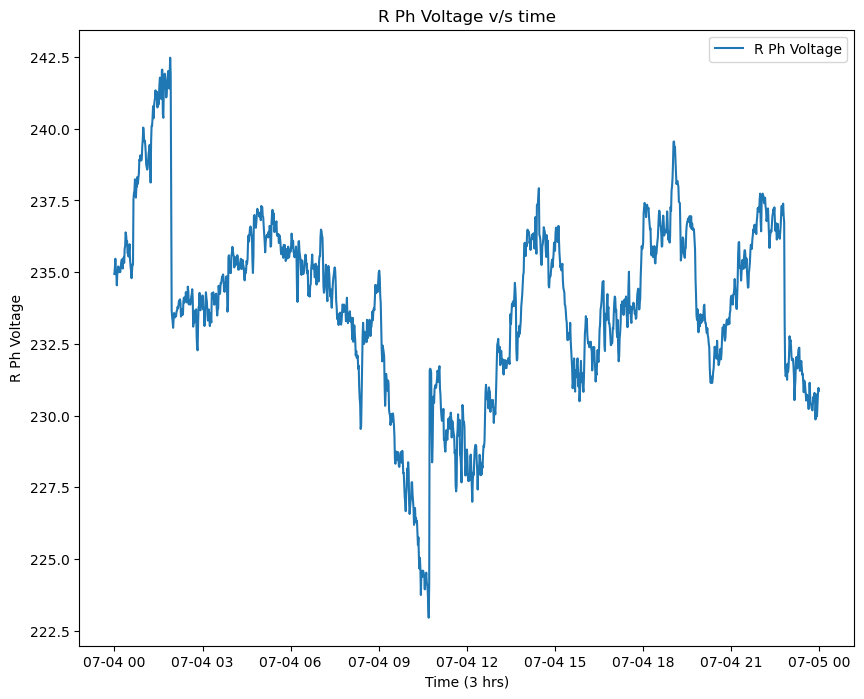

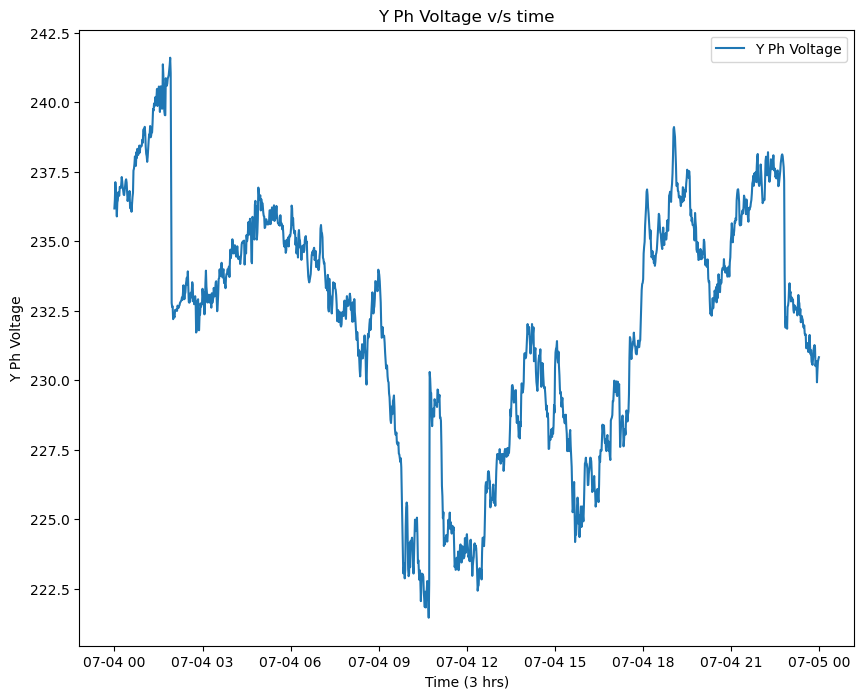

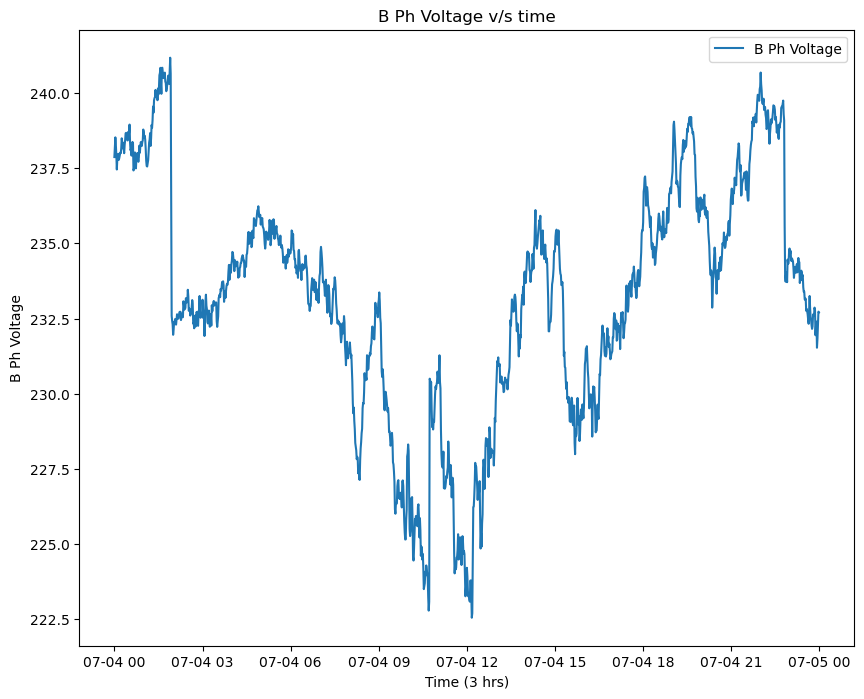

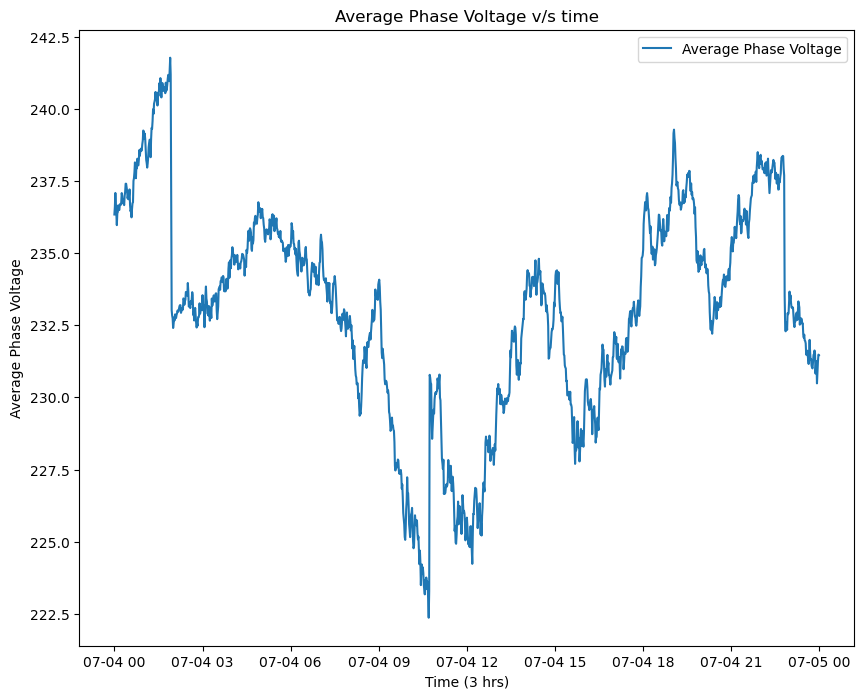

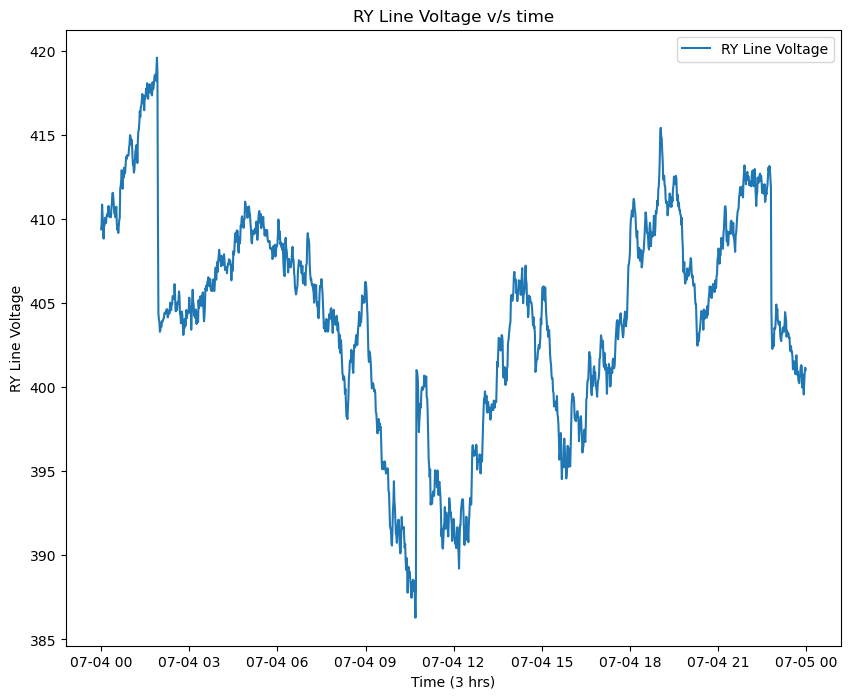

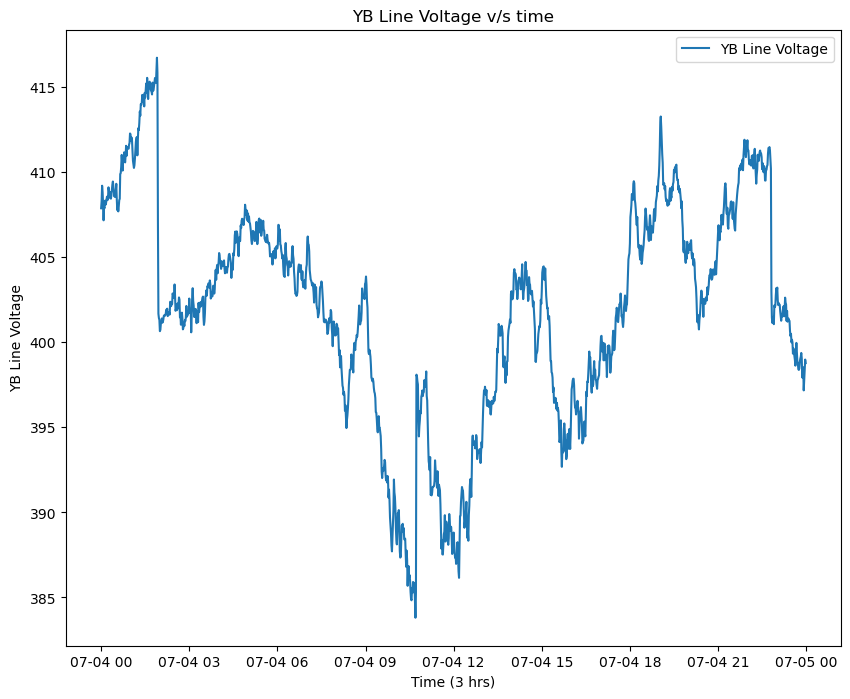

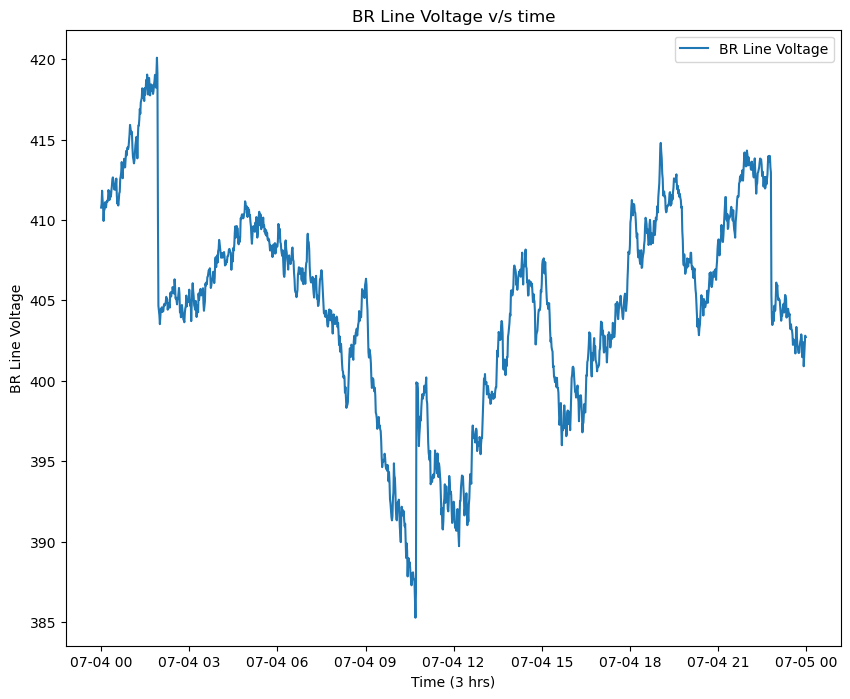

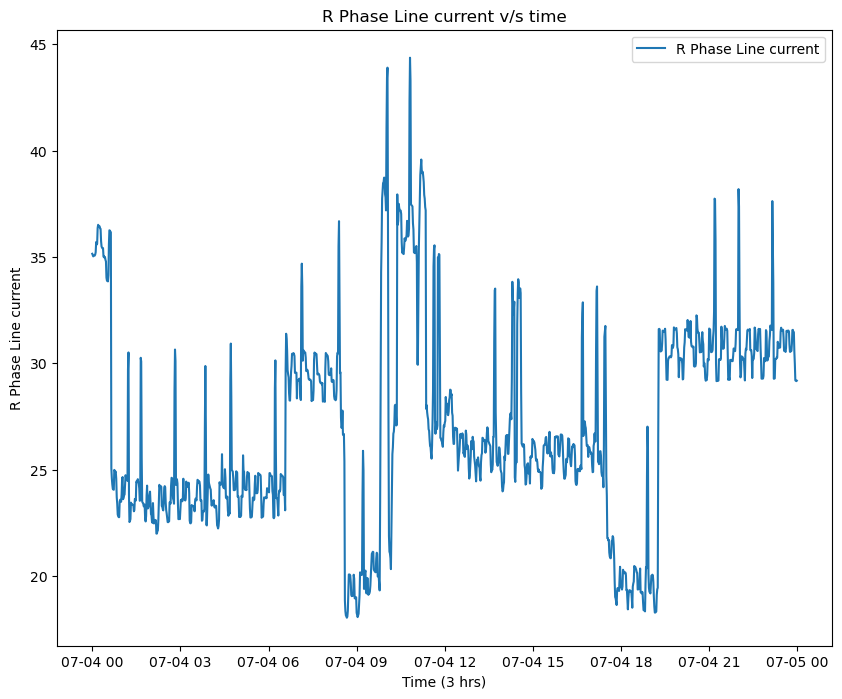

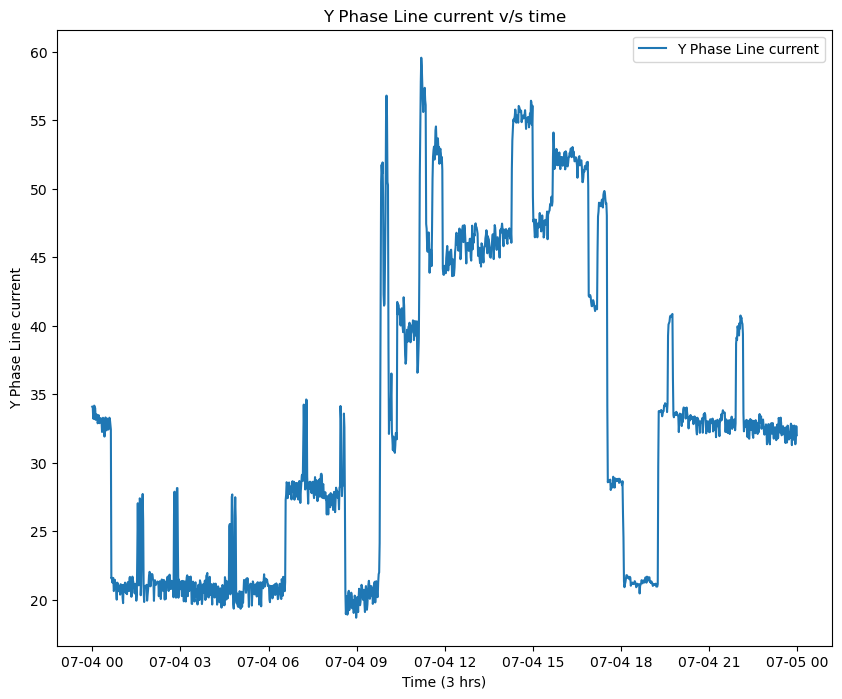

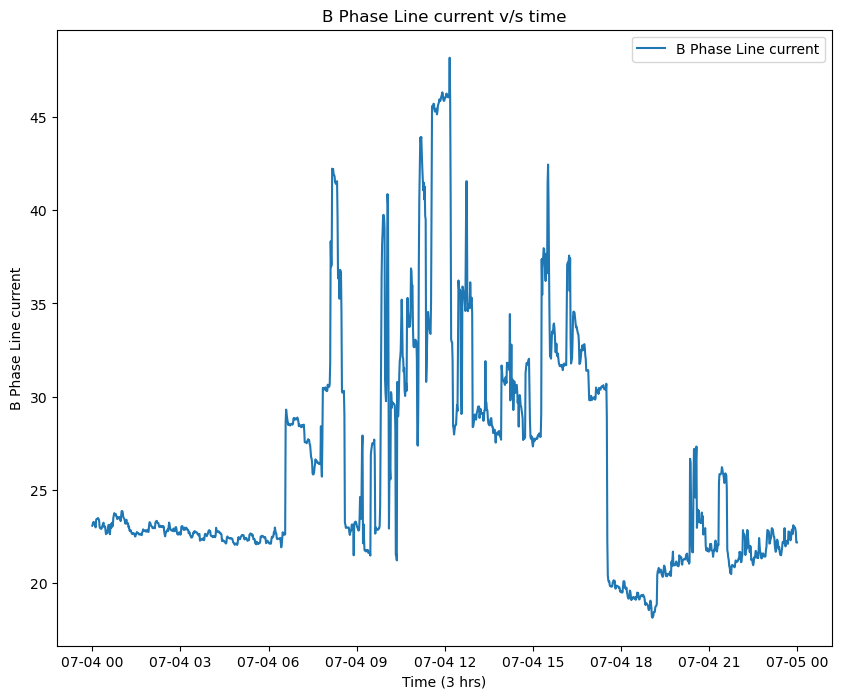

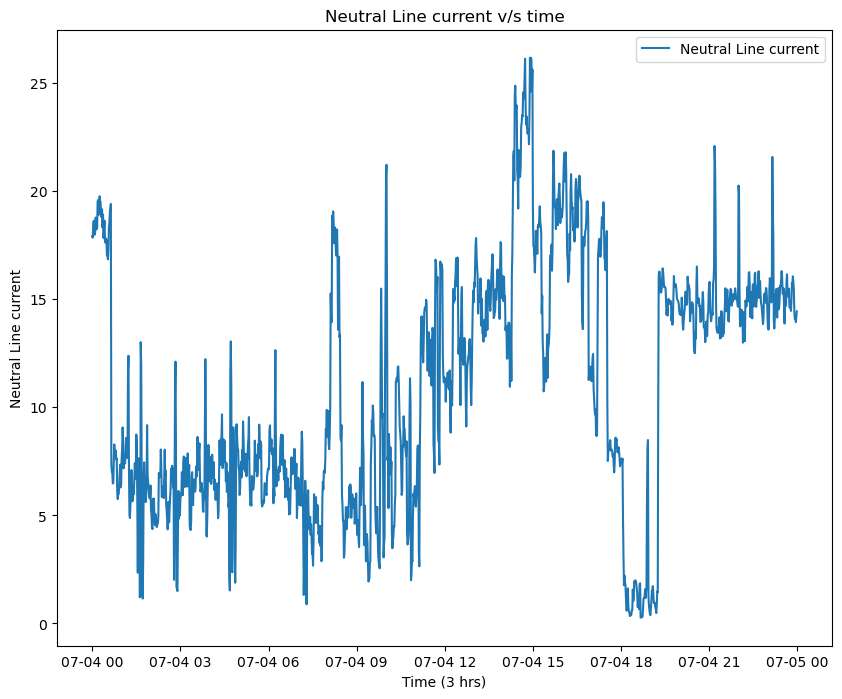

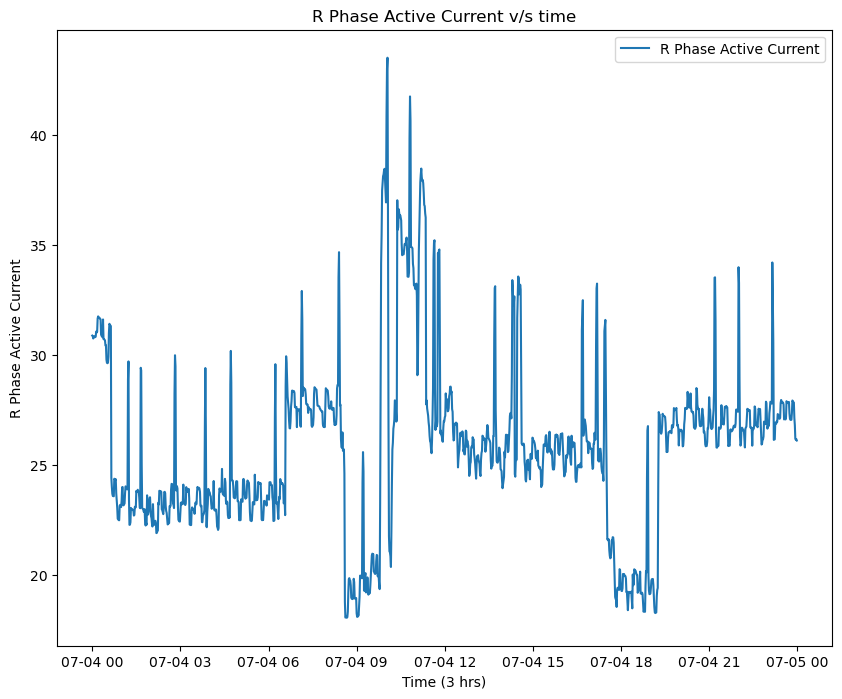

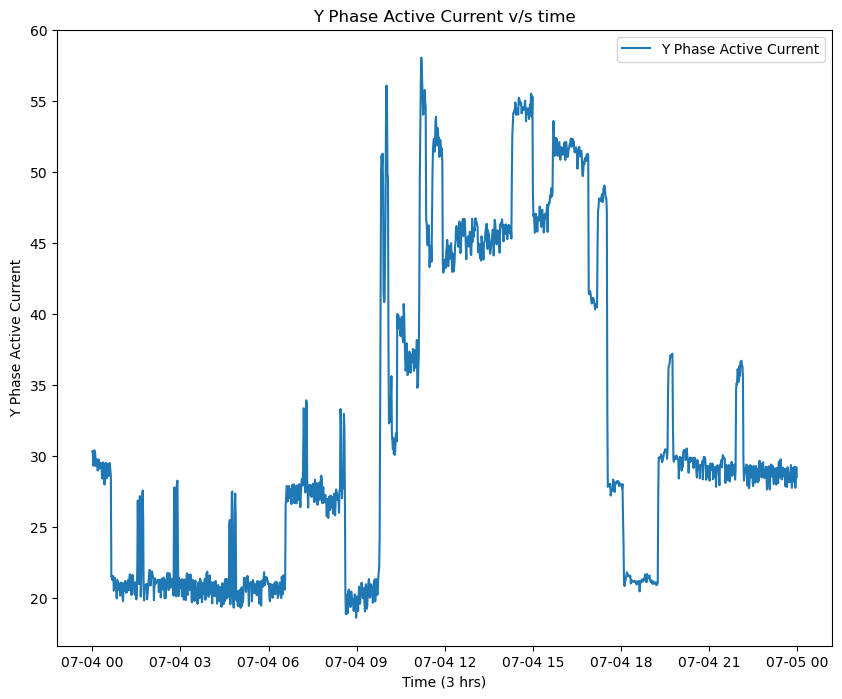

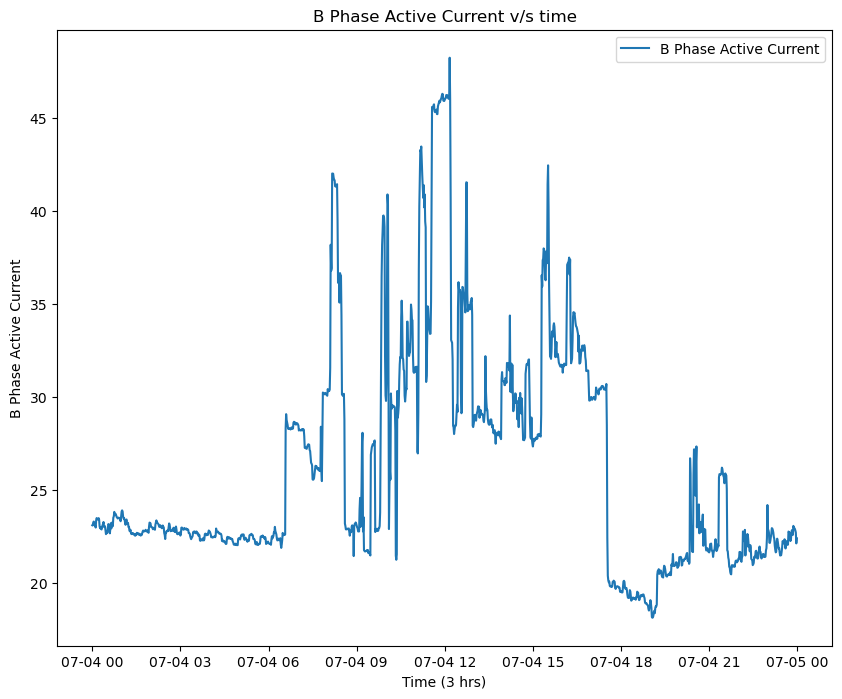

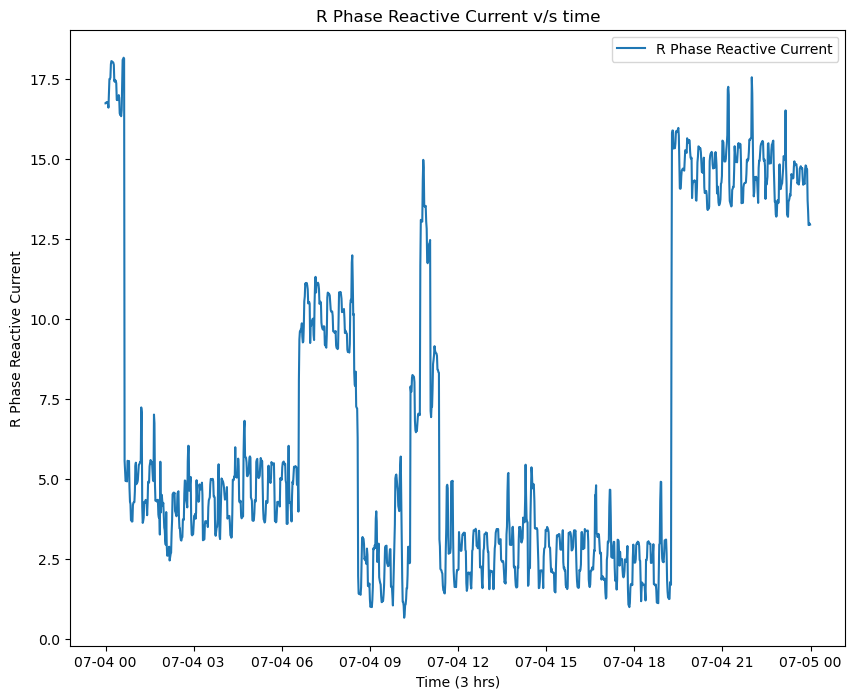

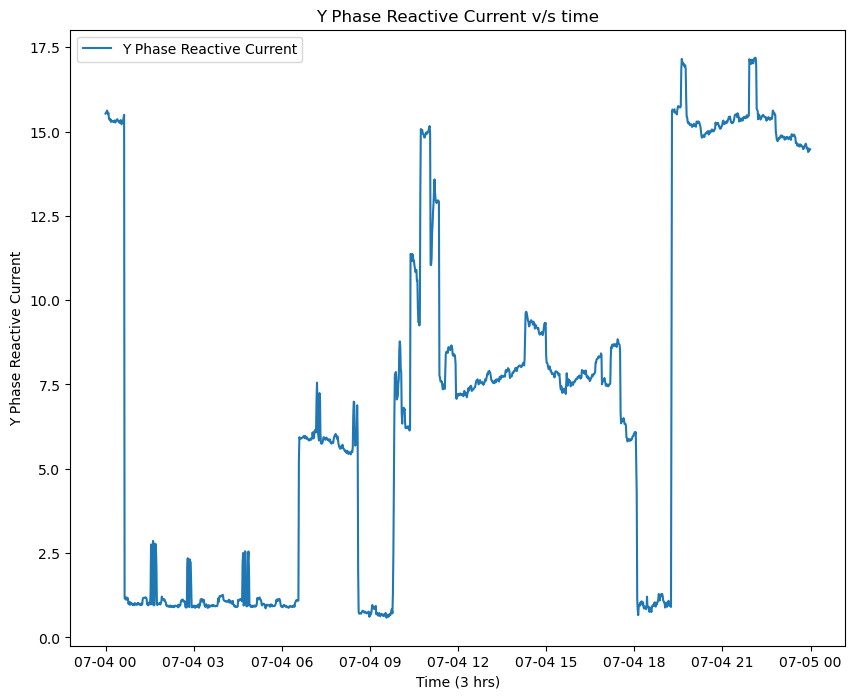

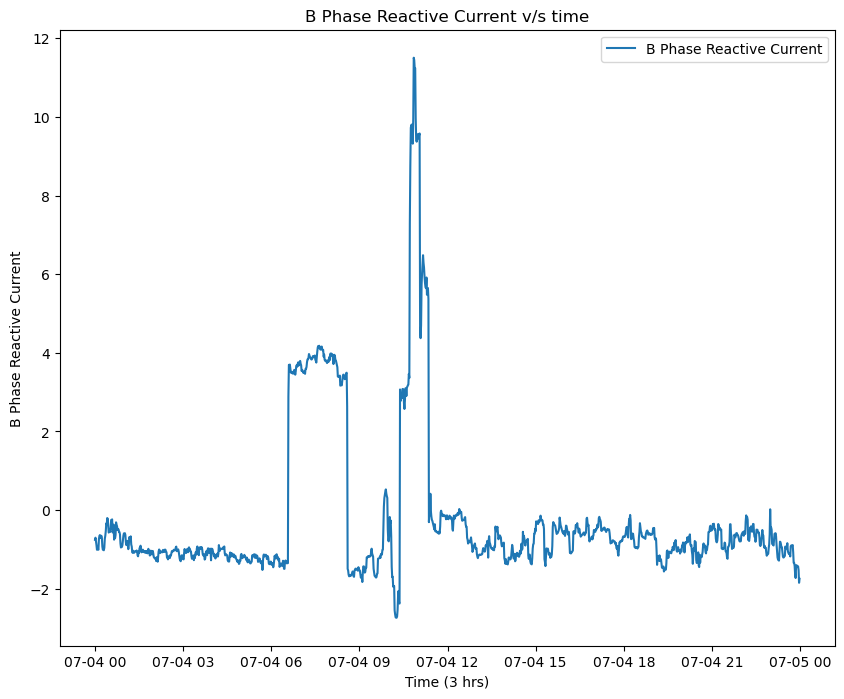

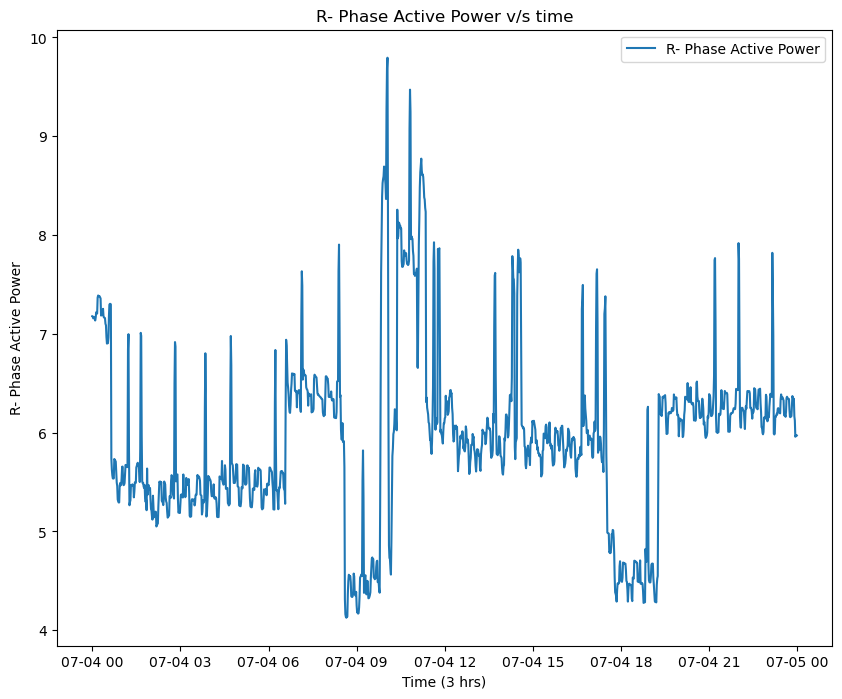

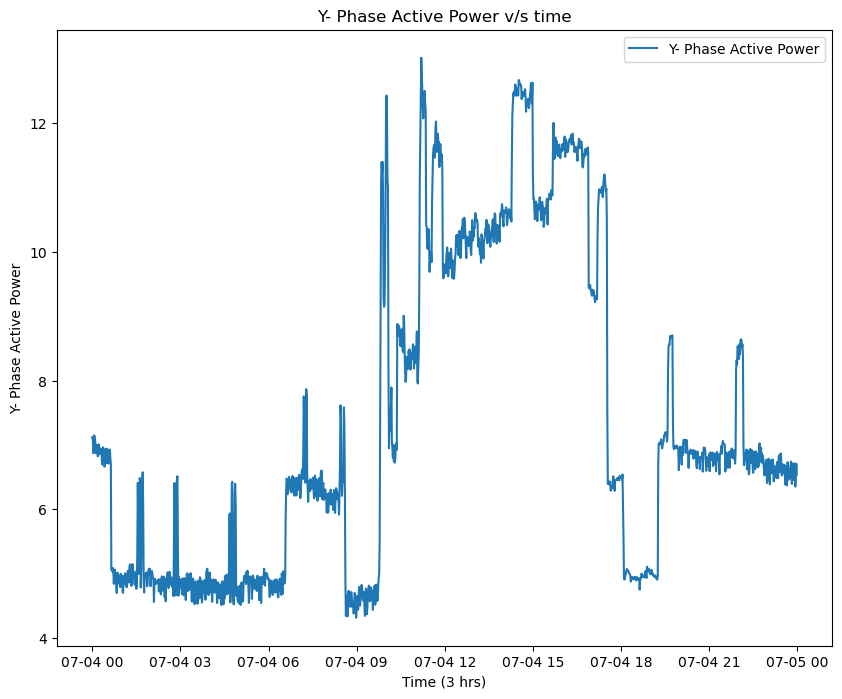

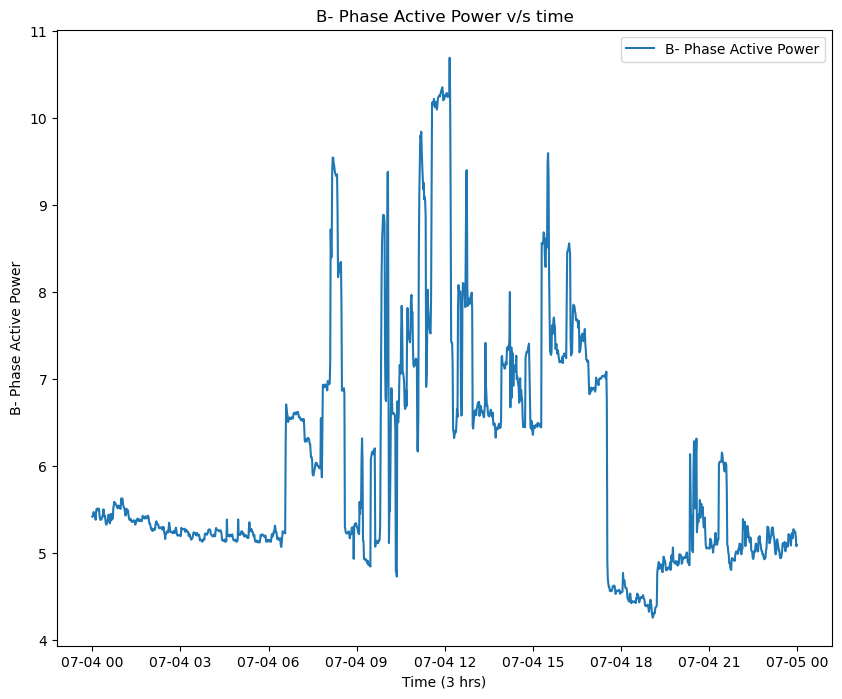

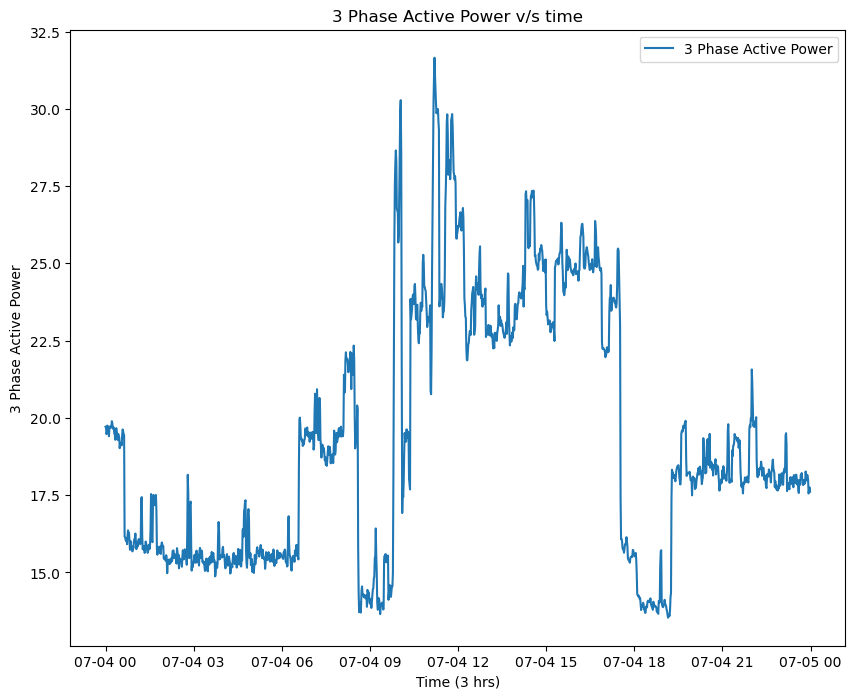

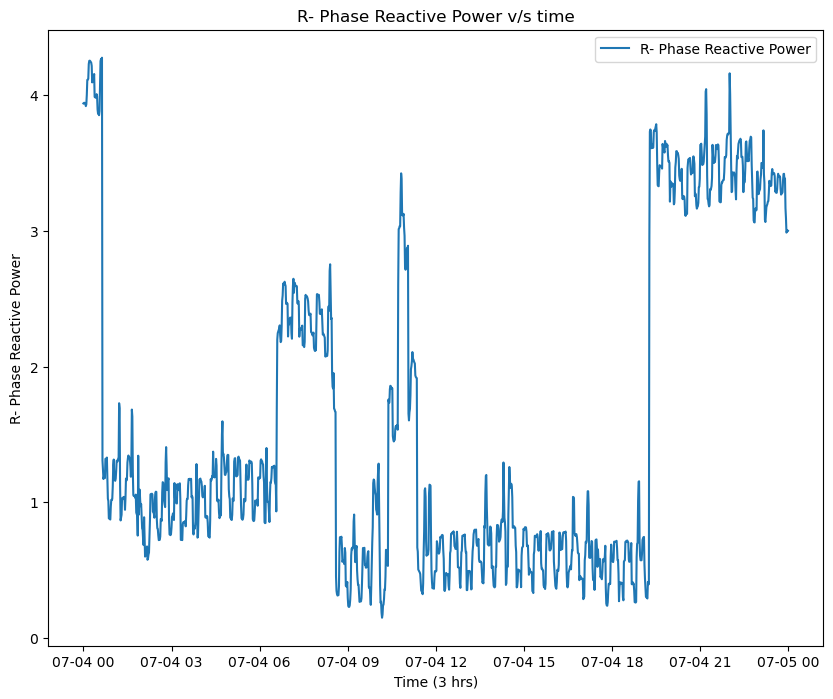

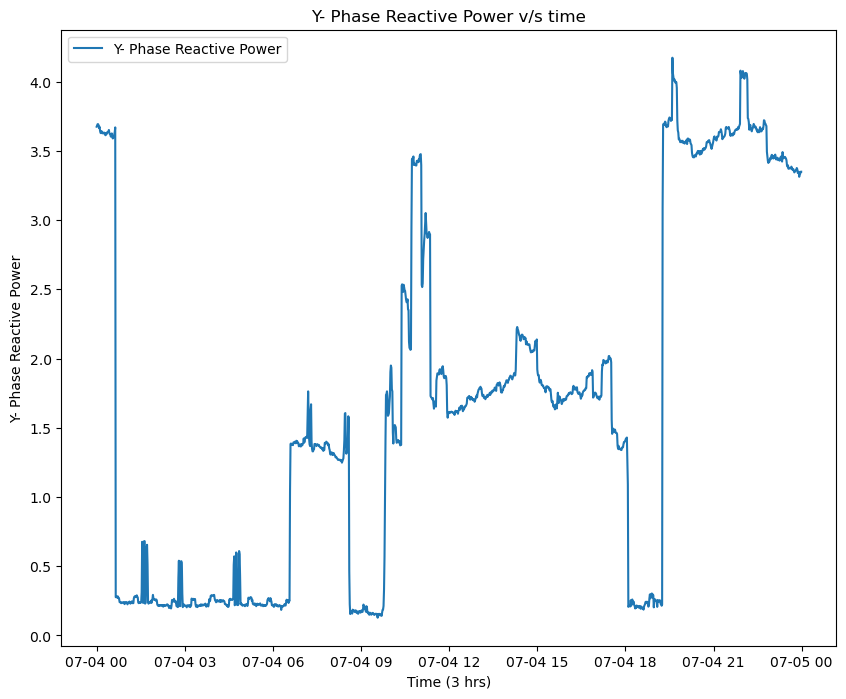

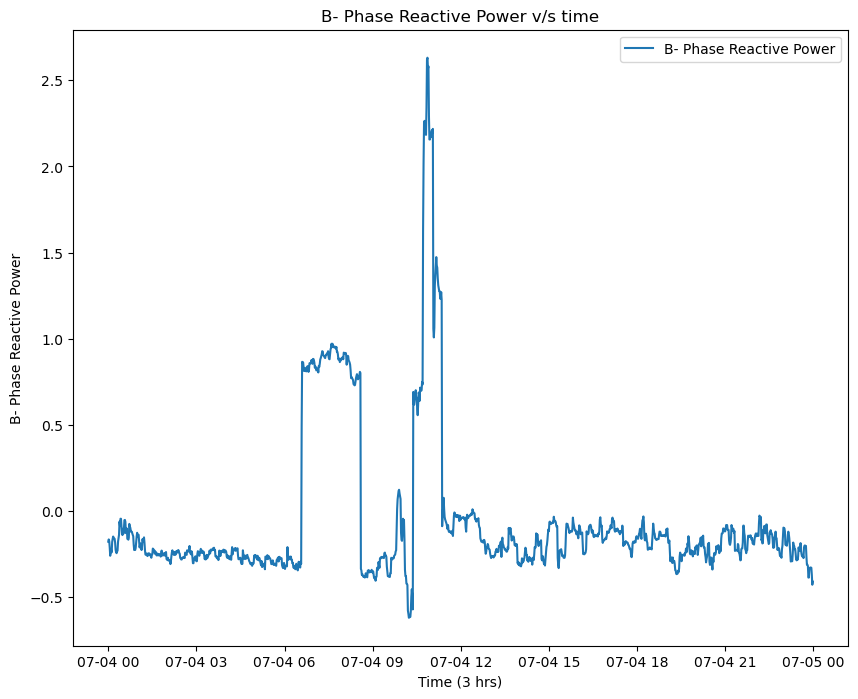

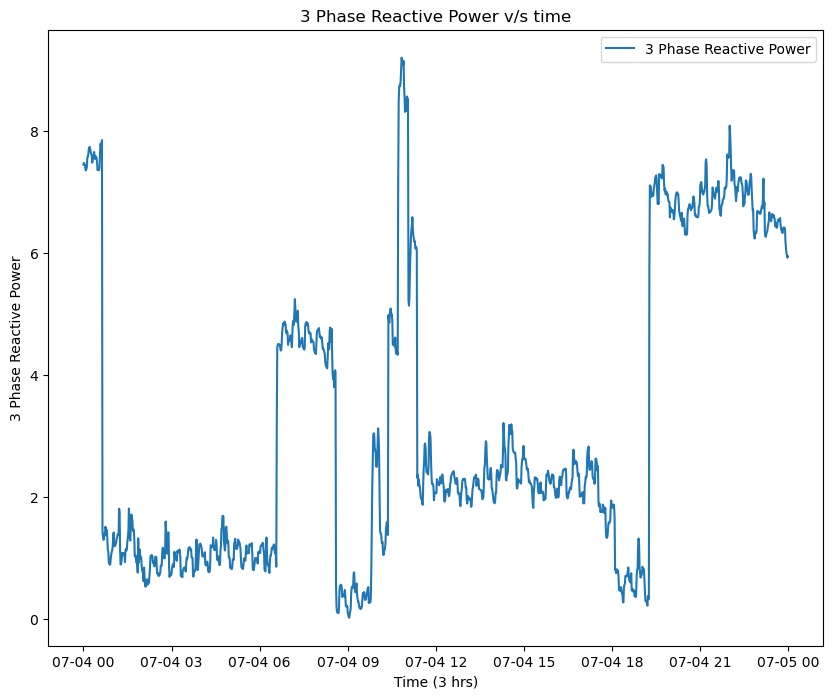

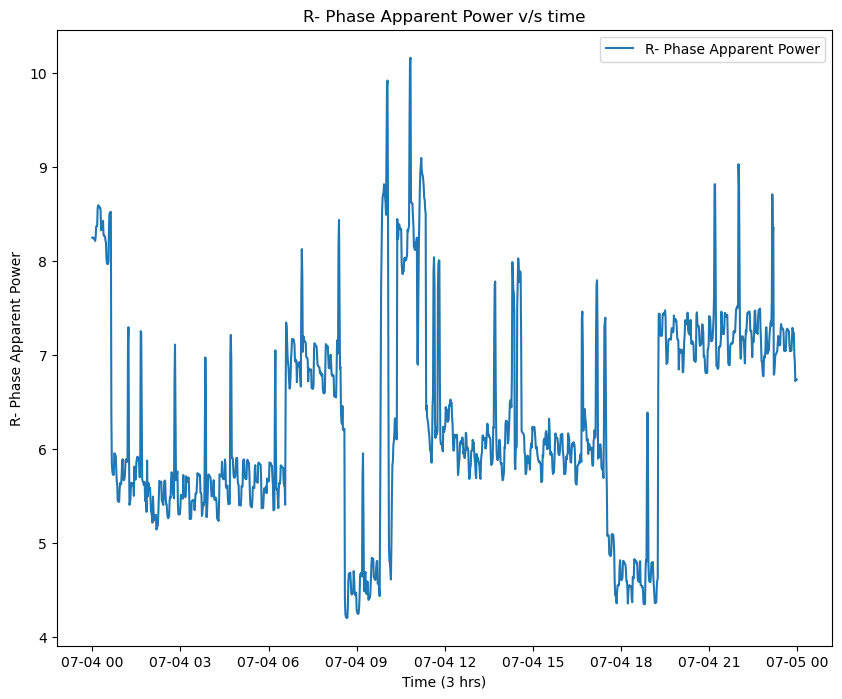

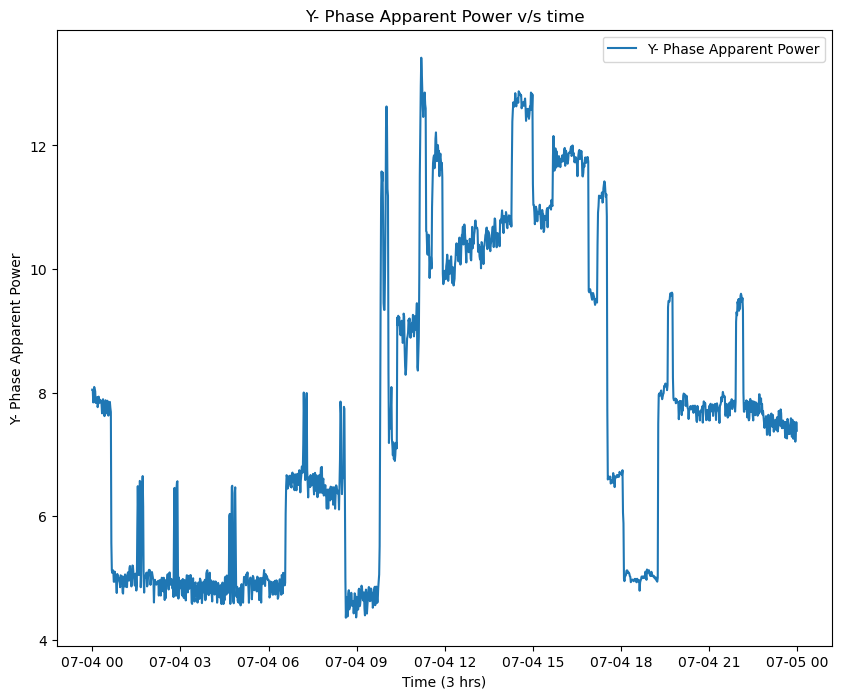

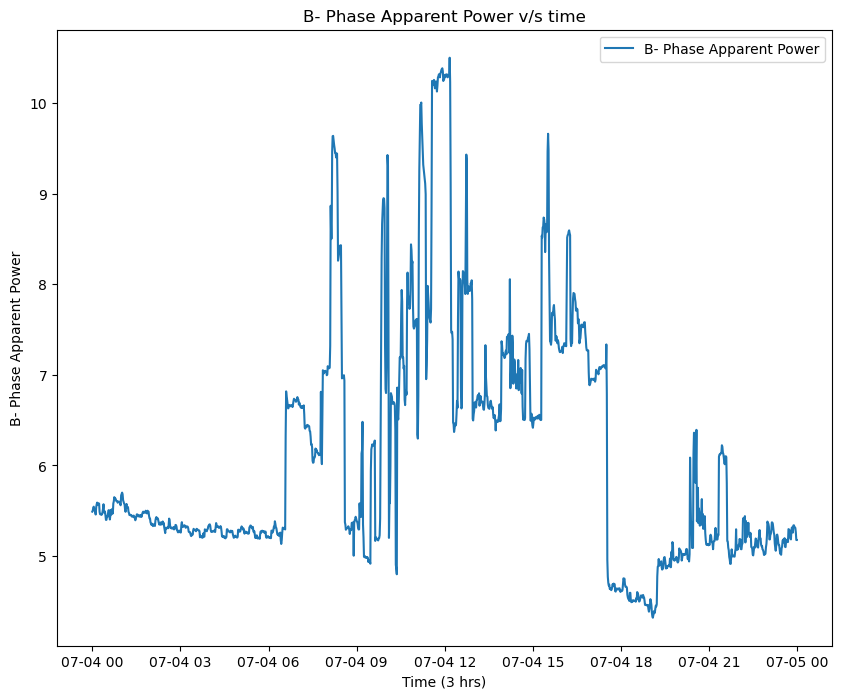

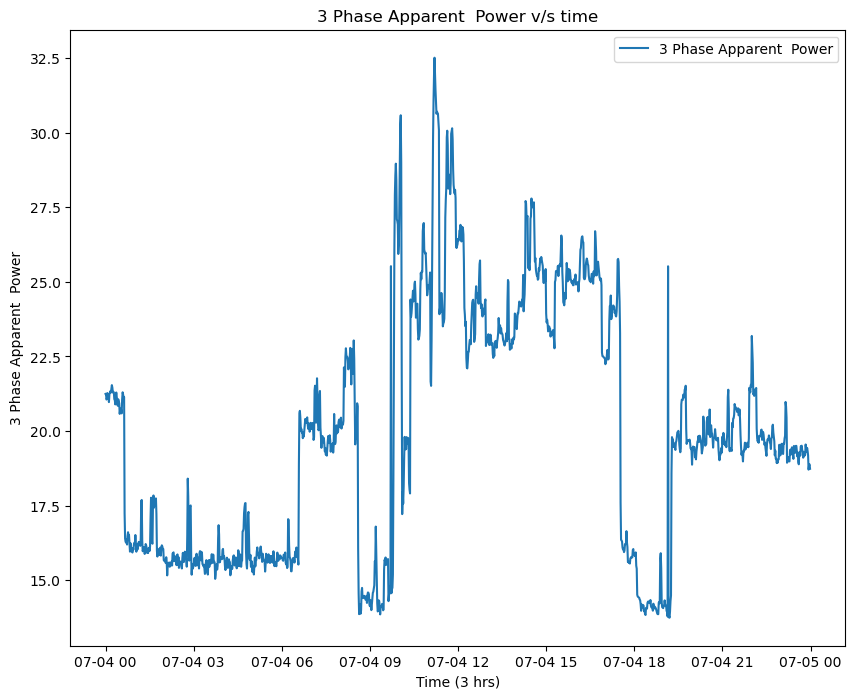

In [9]:
for col in data_minute_avg.columns:
    plt.figure(figsize=(10, 8))
    plt.plot(data_minute_avg.index, data_minute_avg[col], label=col)
    tit = col + " v/s time"
    plt.title(tit)
    plt.xlabel("Time (3 hrs)")
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [23]:
columns = data.columns.to_list()
grouped_lists = []
for i in range(0, 3, 3):
    sublist = columns[i:i + 4]
    grouped_lists.append(sublist)
for i in range(4,7,3):
    sublist = columns[i:i + 3]
    grouped_lists.append(sublist)
for i in range(7, 10, 3):
    sublist = columns[i:i + 4]
    grouped_lists.append(sublist)
for i in range(11,17,3):
    sublist = columns[i:i + 3]
    grouped_lists.append(sublist)
for i in range(17, len(columns), 4):
    sublist = columns[i:i + 4]
    grouped_lists.append(sublist)
grouped_lists

[['R Ph Voltage', 'Y Ph Voltage', 'B Ph Voltage', 'Average Phase Voltage'],
 ['RY Line Voltage', 'YB Line Voltage', 'BR Line Voltage'],
 ['R Phase Line current',
  'Y Phase Line current',
  'B Phase Line current',
  'Neutral Line current'],
 ['R Phase Active Current',
  'Y Phase Active Current',
  'B Phase Active Current'],
 ['R Phase Reactive Current',
  'Y Phase Reactive Current',
  'B Phase Reactive Current'],
 ['R- Phase Active Power',
  'Y- Phase Active Power',
  'B- Phase Active Power',
  '3 Phase Active Power'],
 ['R- Phase Reactive Power',
  'Y- Phase Reactive Power',
  'B- Phase Reactive Power',
  '3 Phase Reactive Power'],
 ['R- Phase Apparent Power',
  'Y- Phase Apparent Power',
  'B- Phase Apparent Power',
  '3 Phase Apparent  Power']]

<Figure size 1000x800 with 0 Axes>

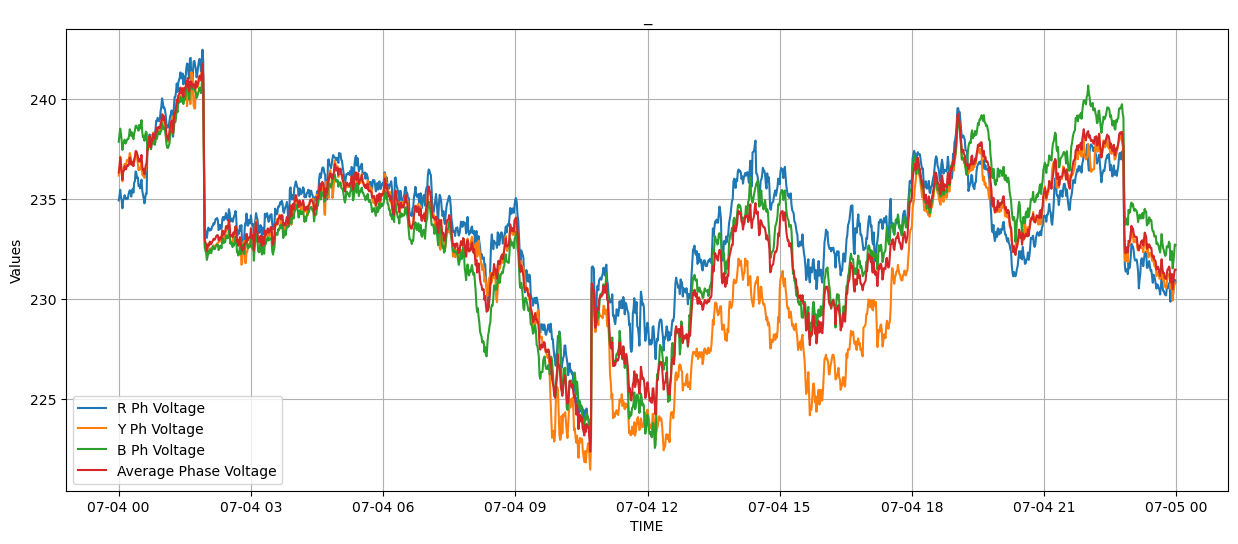

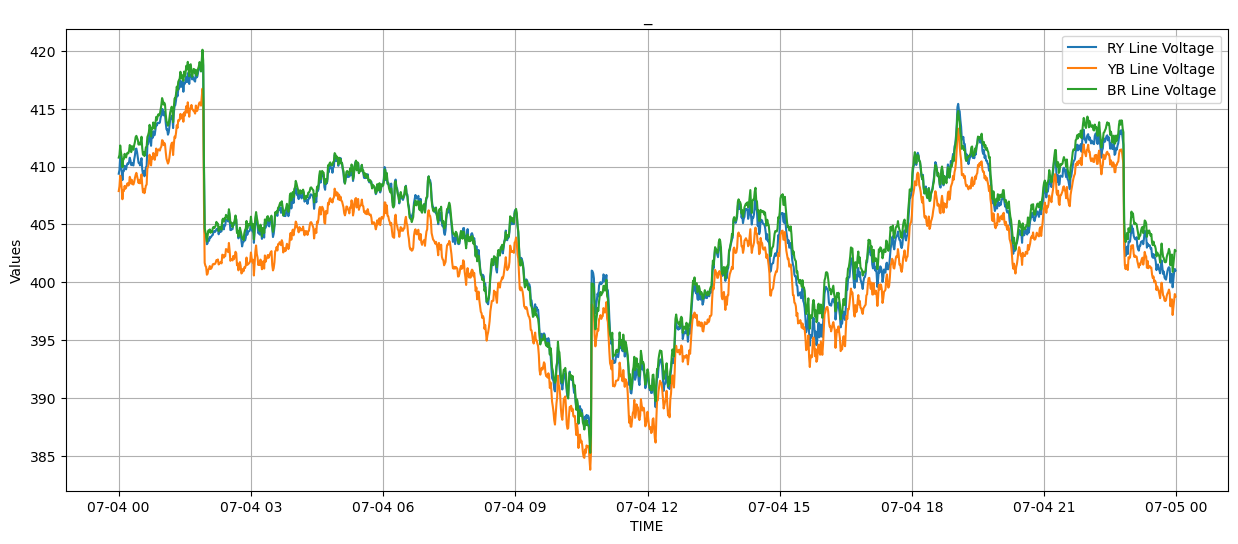

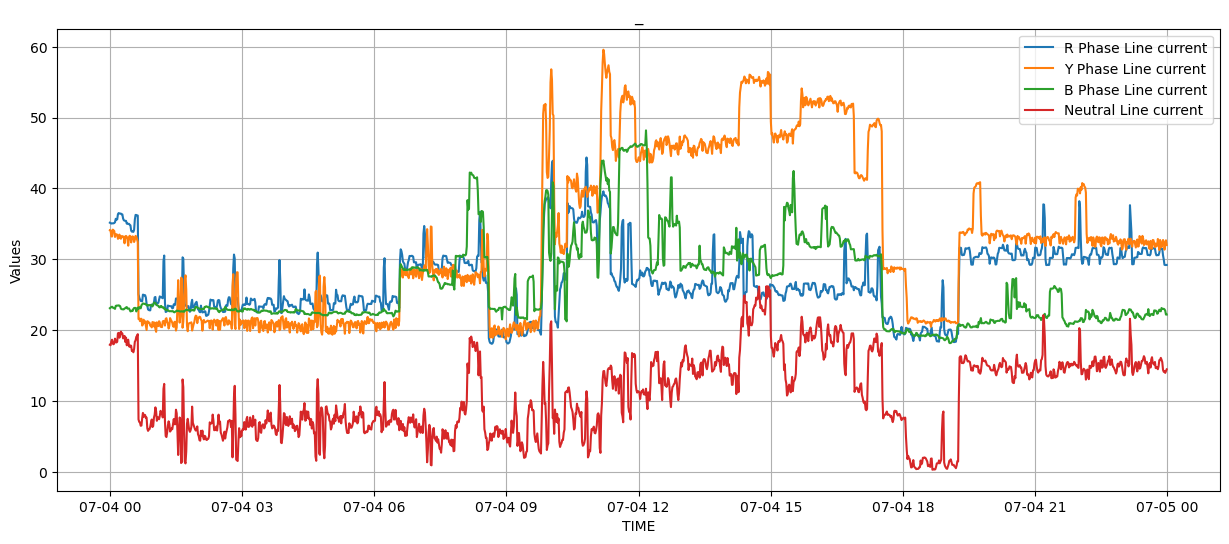

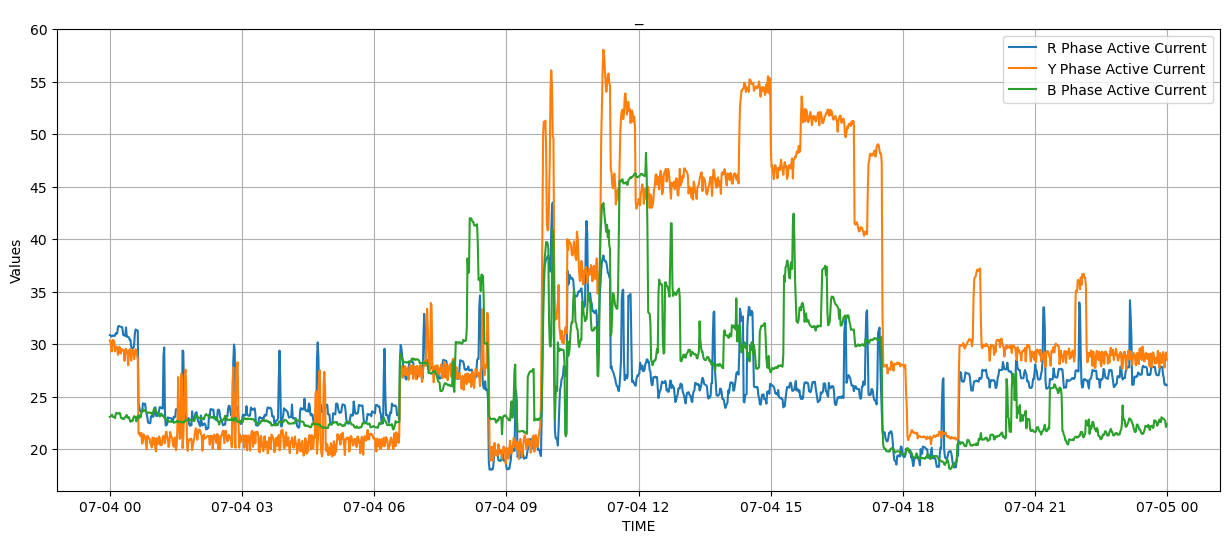

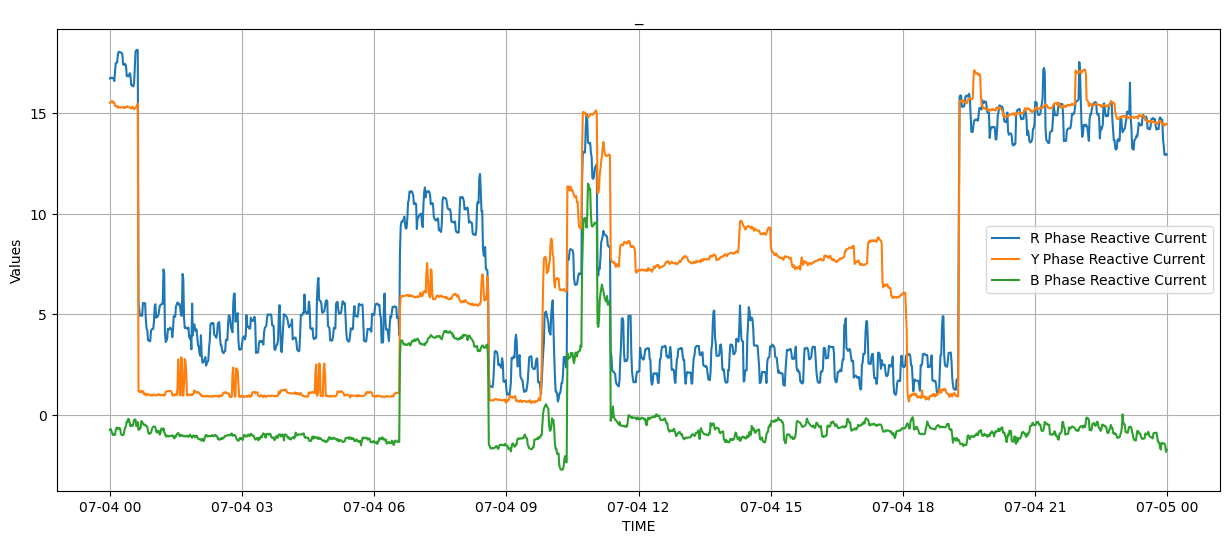

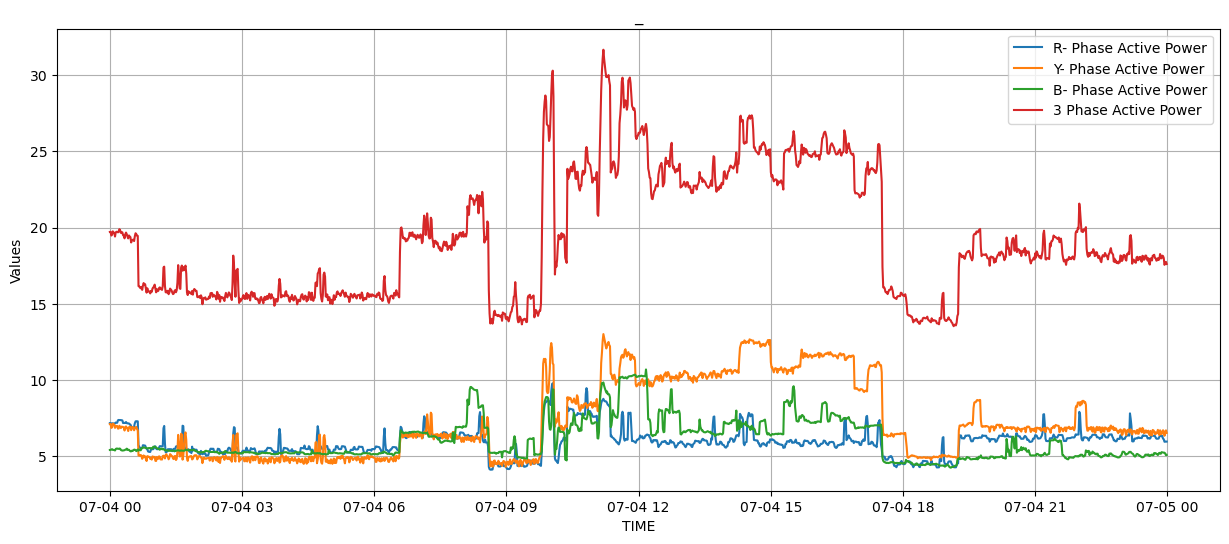

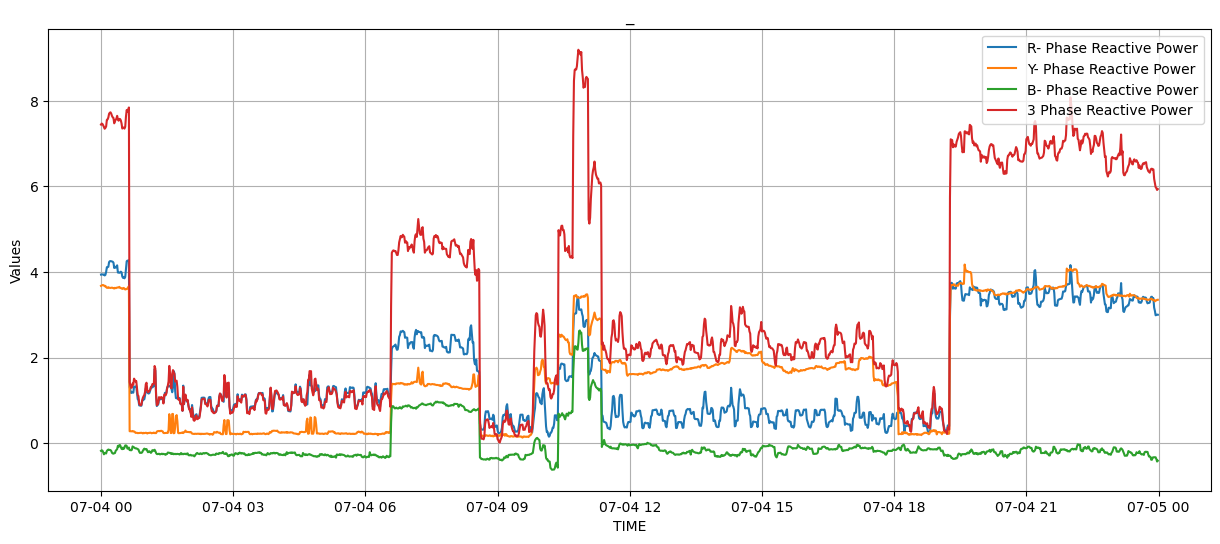

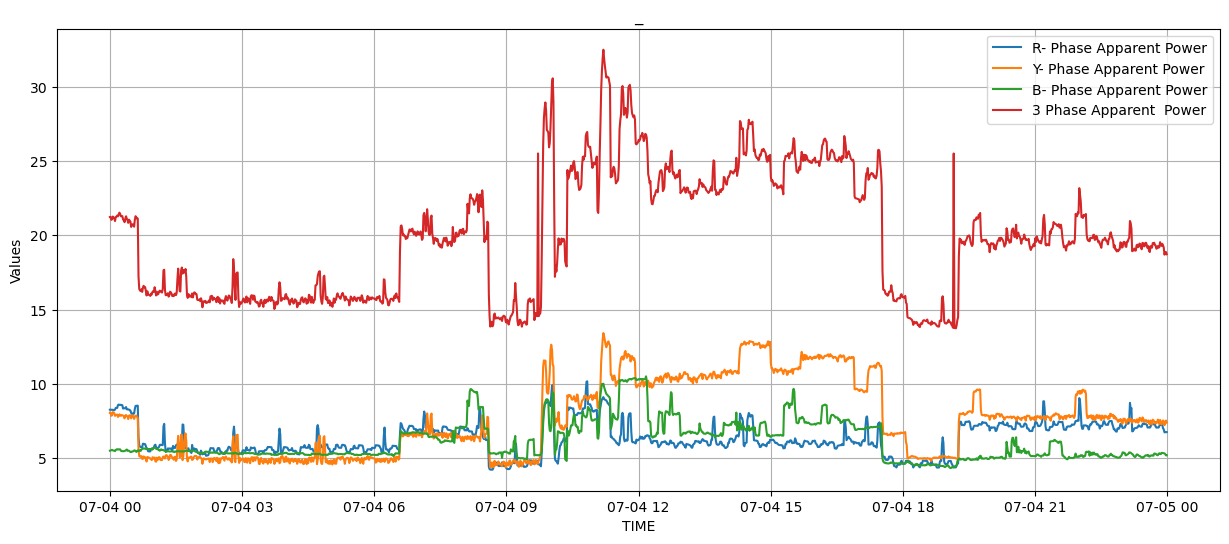

In [27]:
#Plotting multiple line charts
plt.figure(figsize=(10, 8))
for group in grouped_lists:
    plt.figure(figsize=(15,6),facecolor='white')
    plt.grid(True)
    plt.plot(data_minute_avg.index,data_minute_avg[group],label=group)
    plt.xlabel('TIME')
    plt.ylabel('Values')
    plt.title('_')
    plt.legend()
    plt.show()

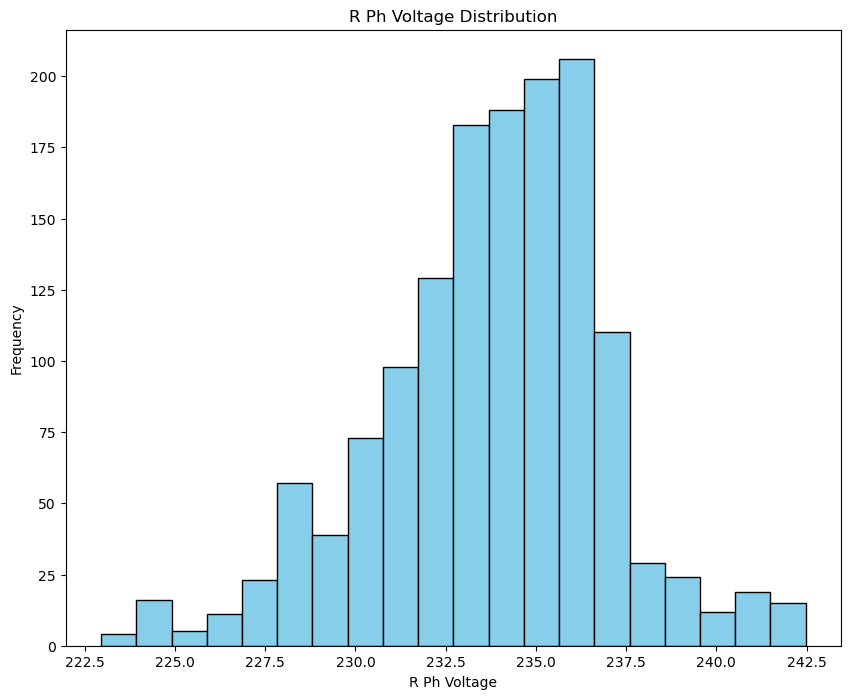

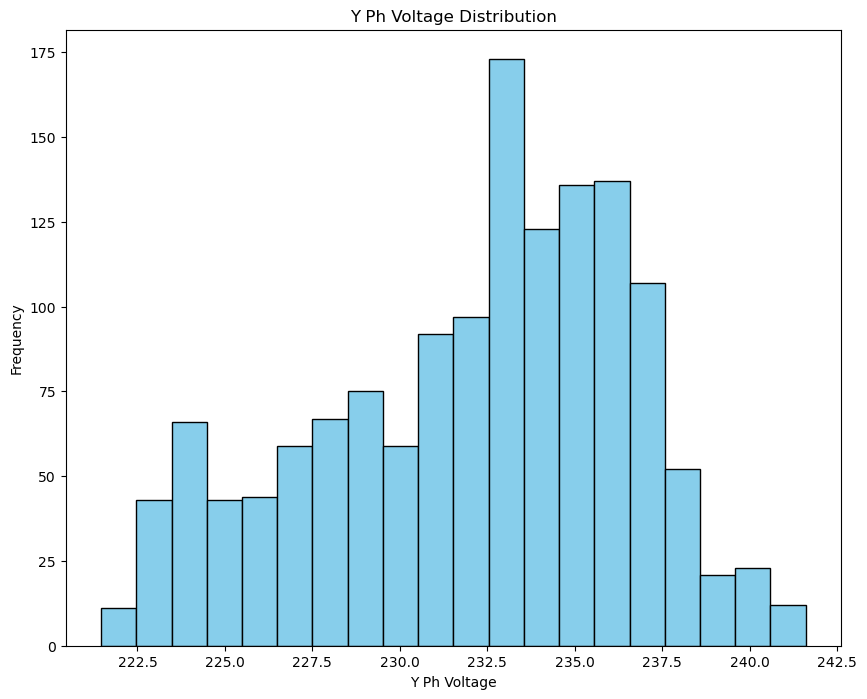

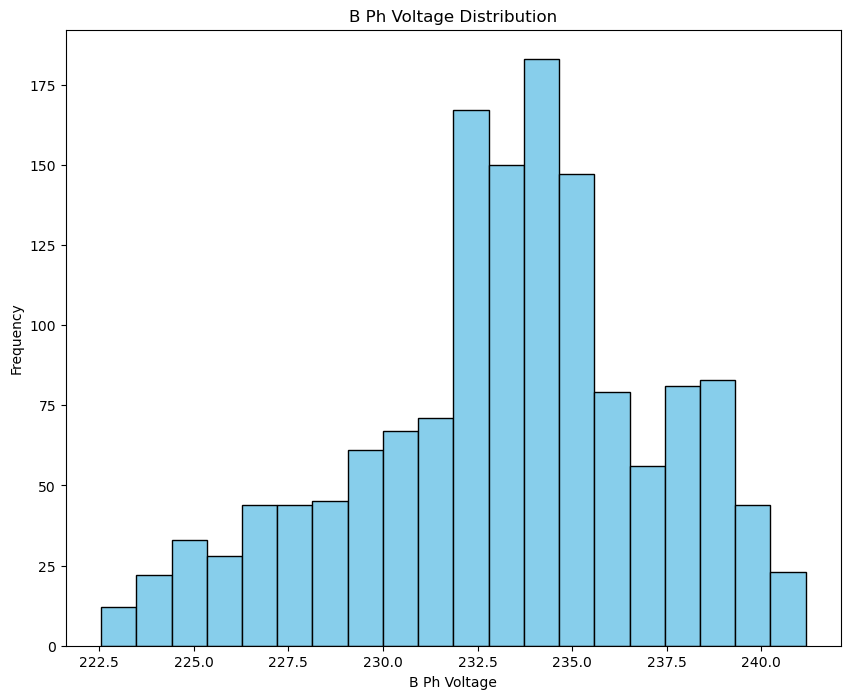

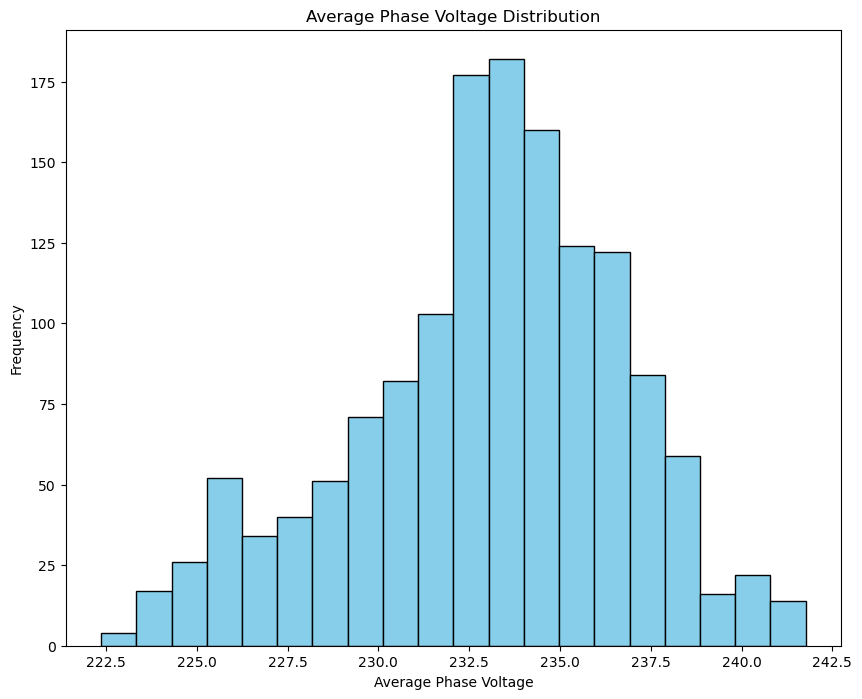

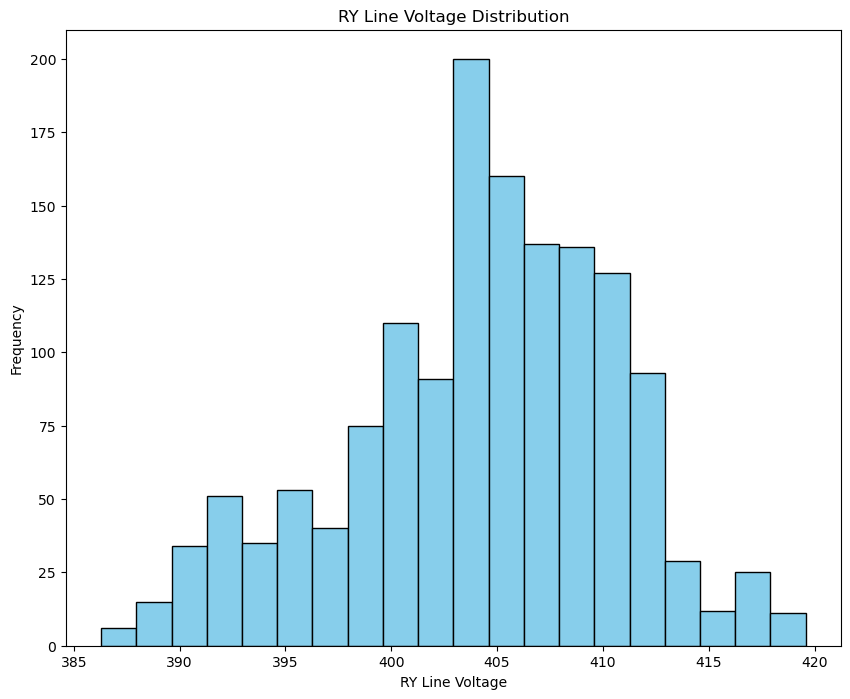

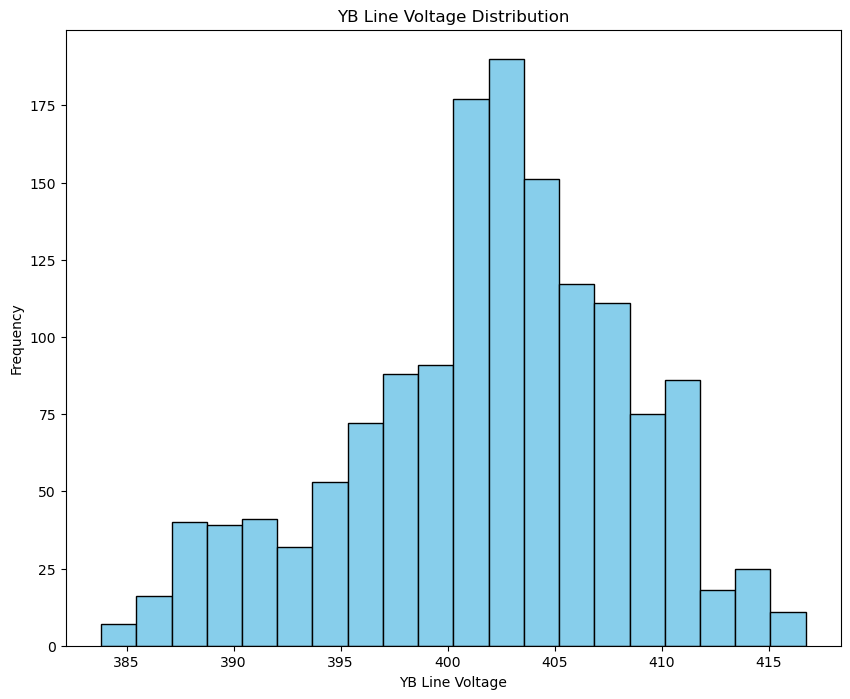

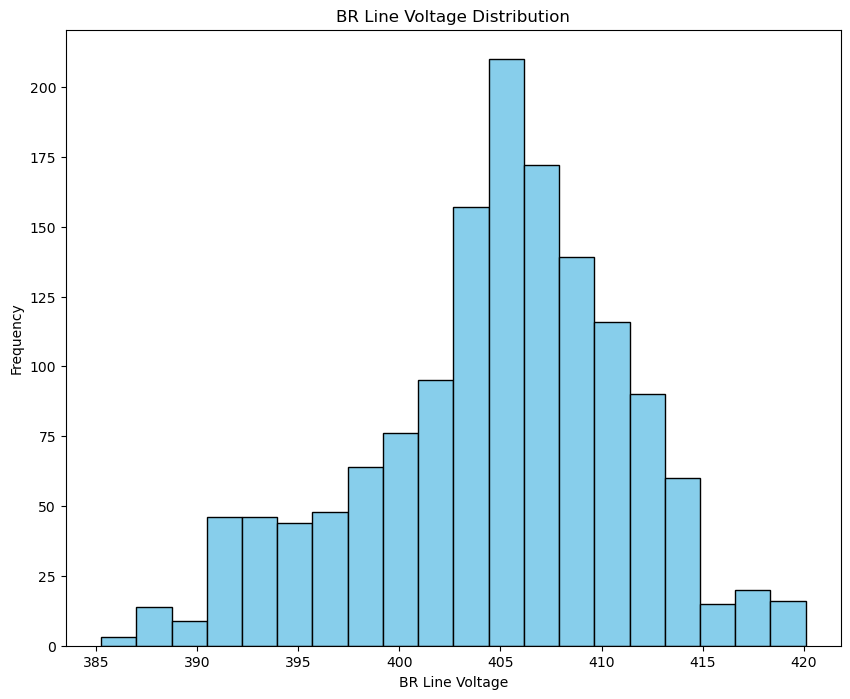

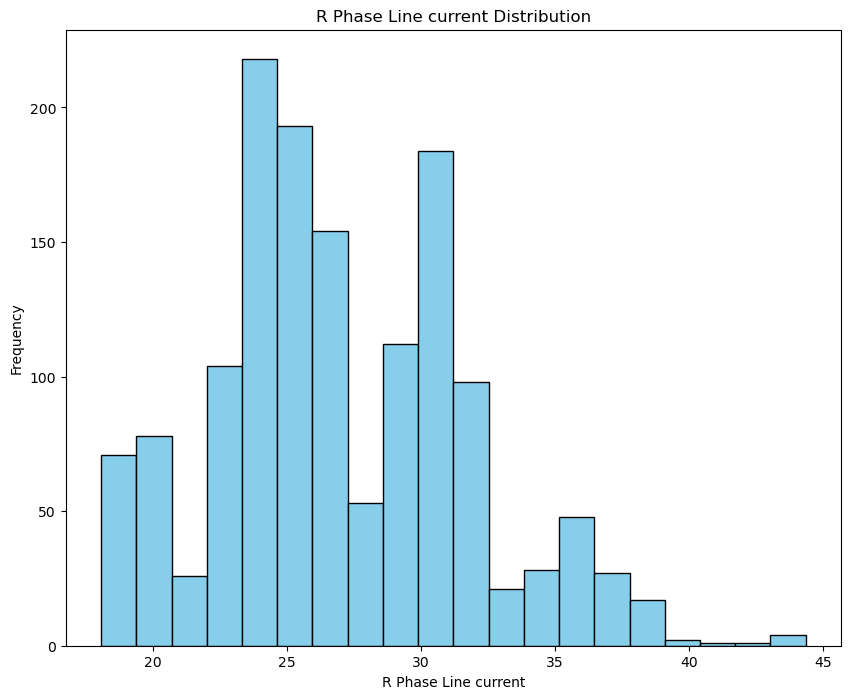

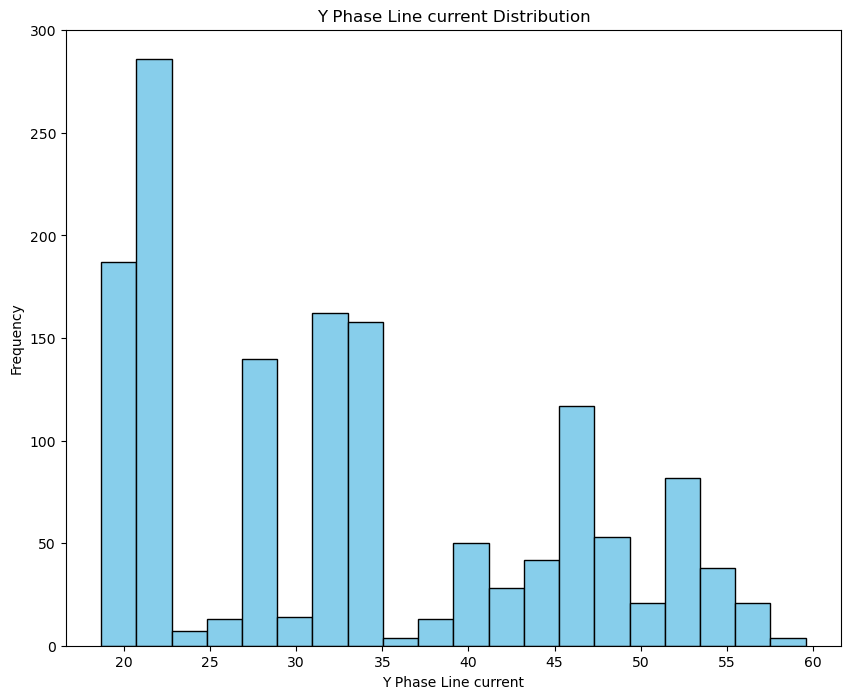

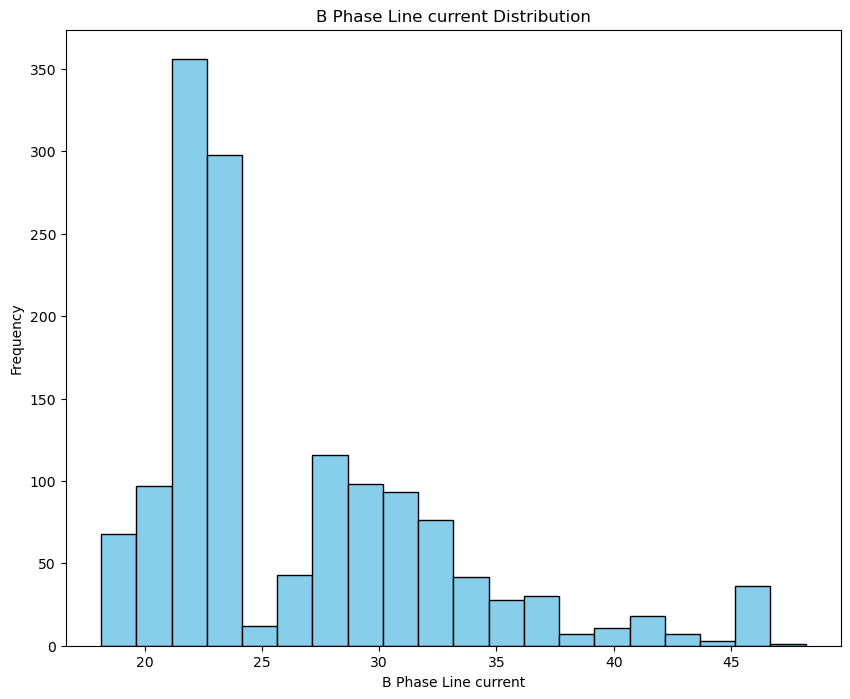

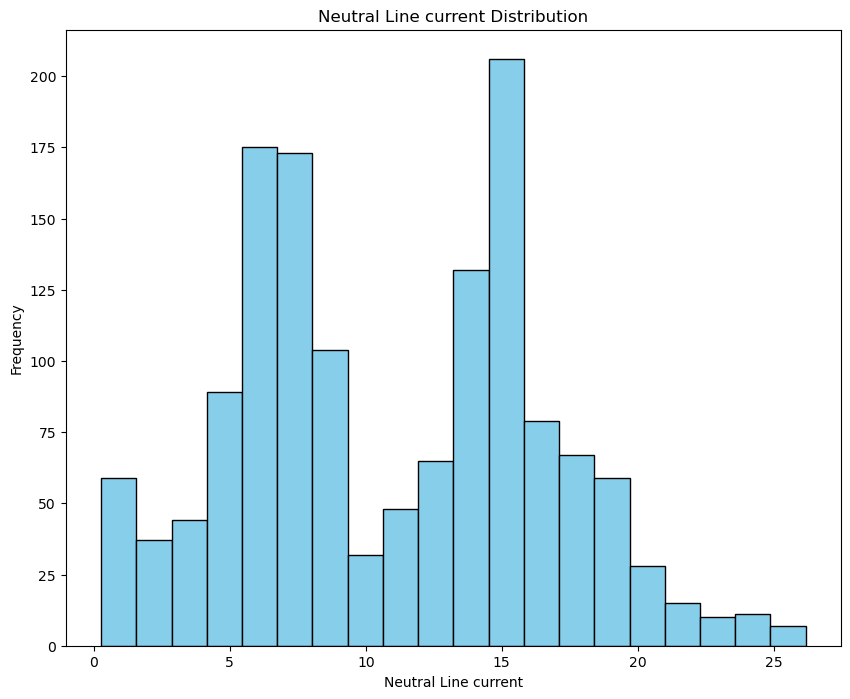

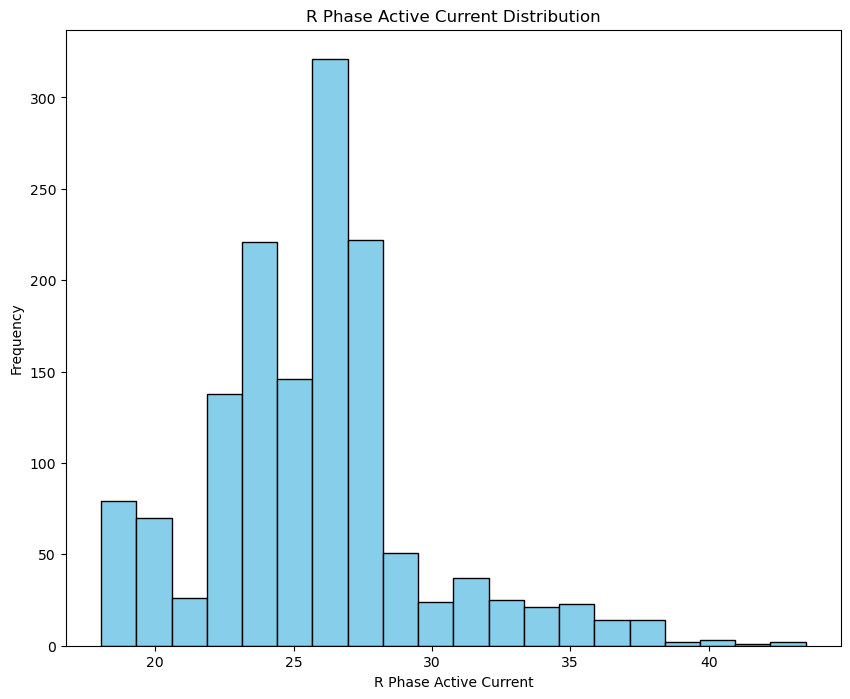

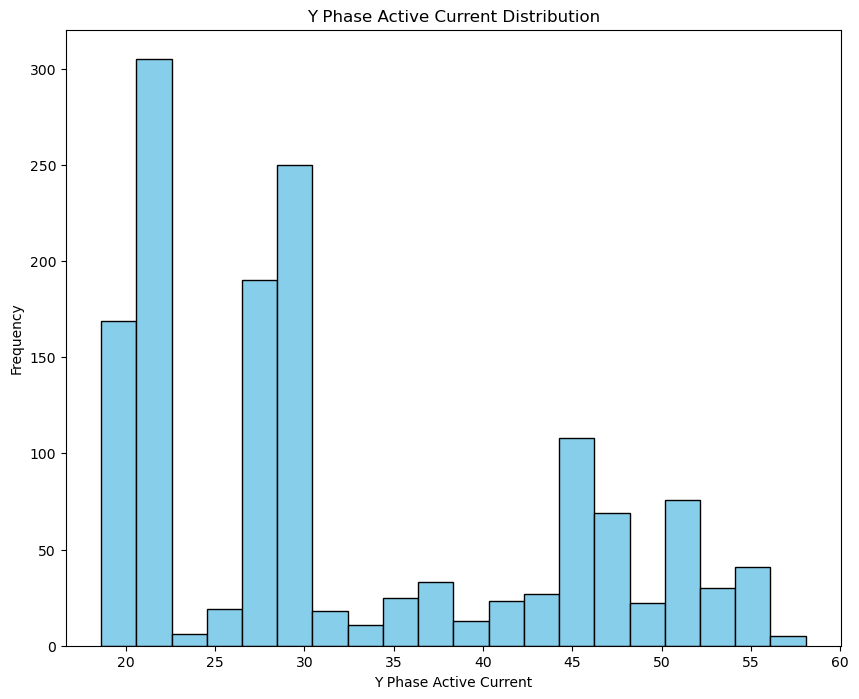

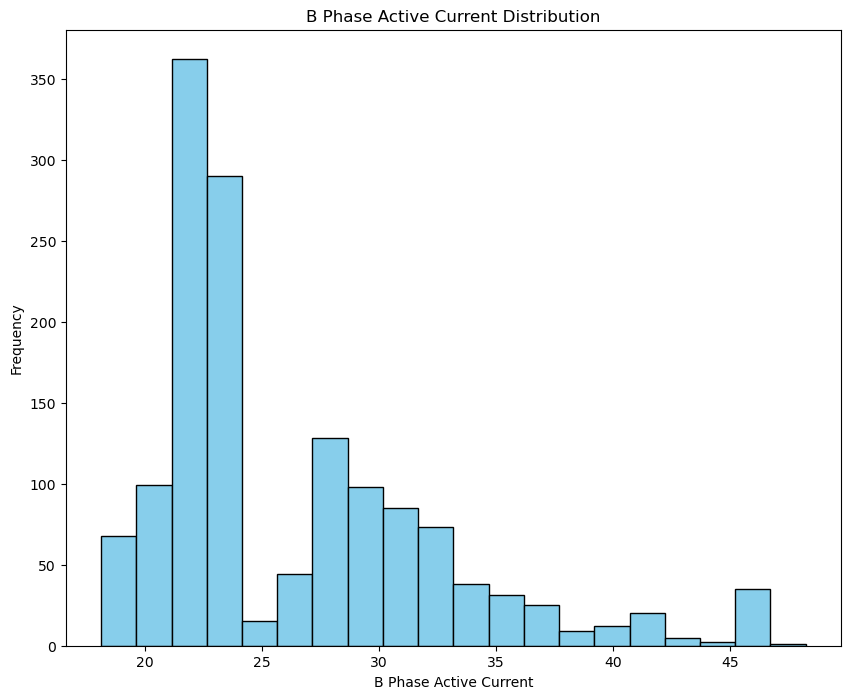

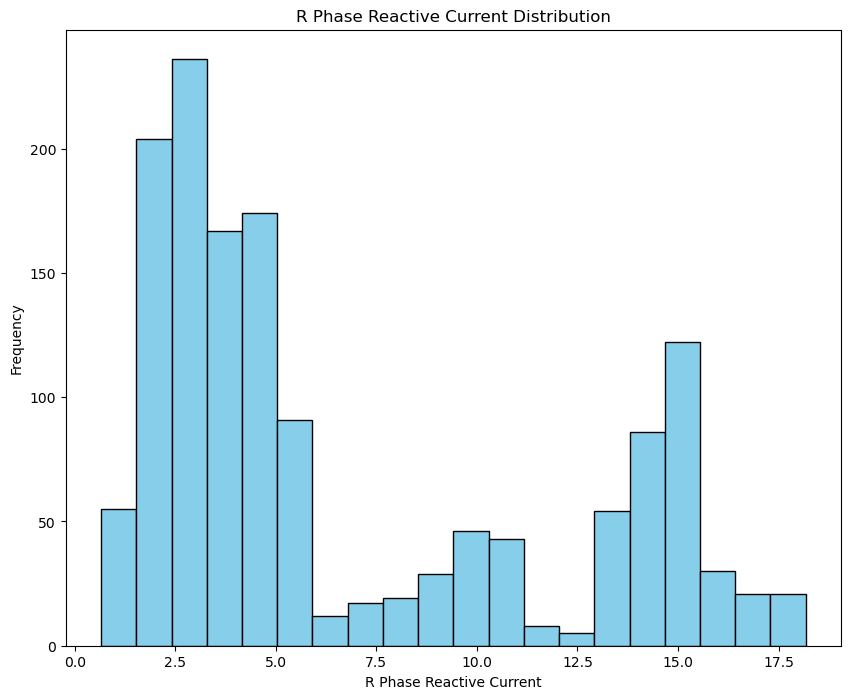

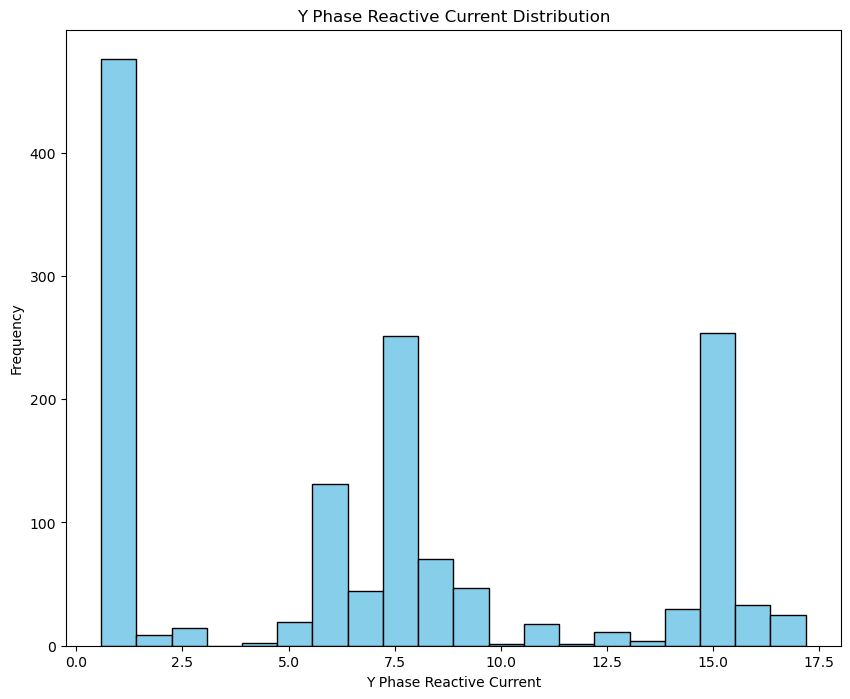

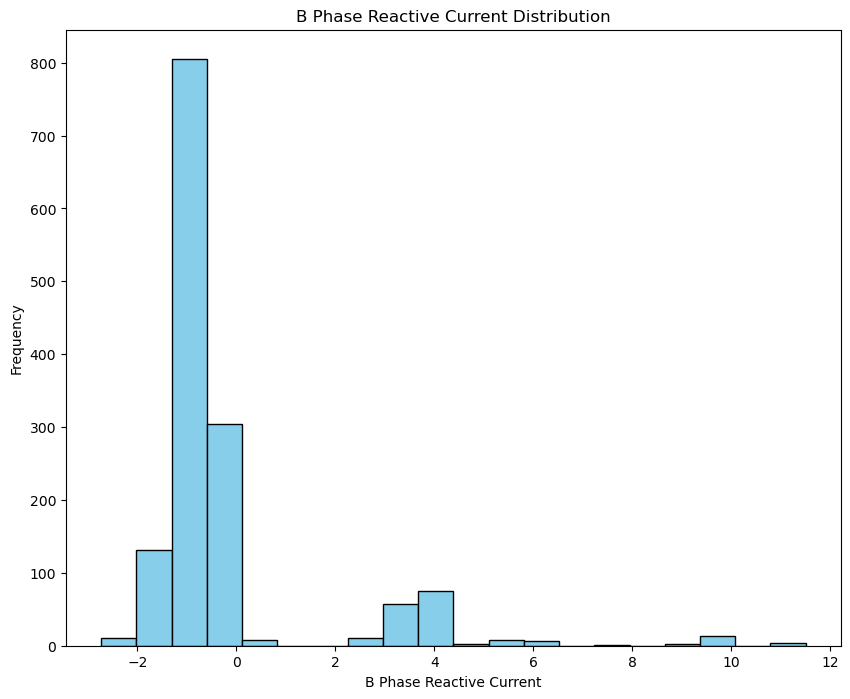

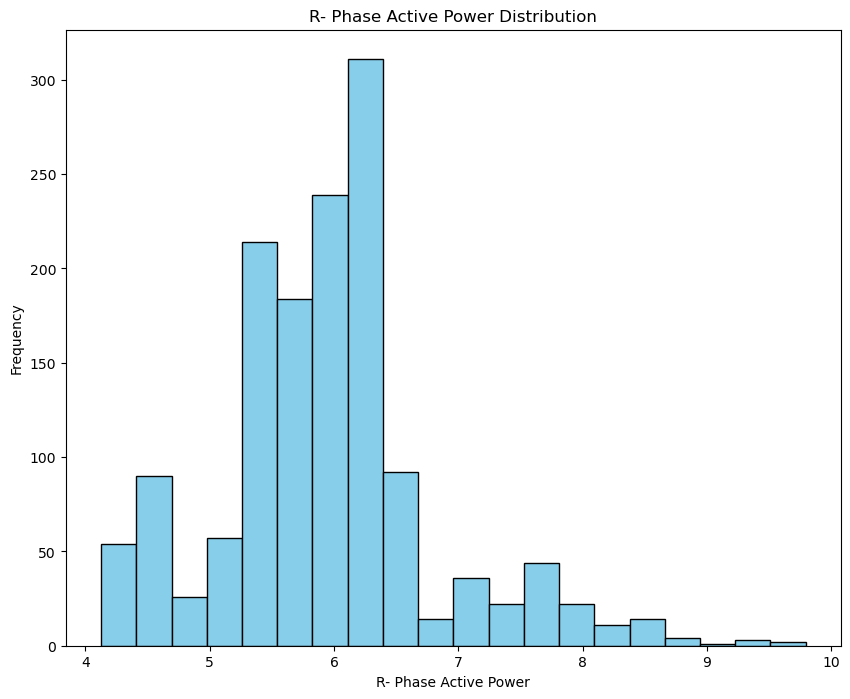

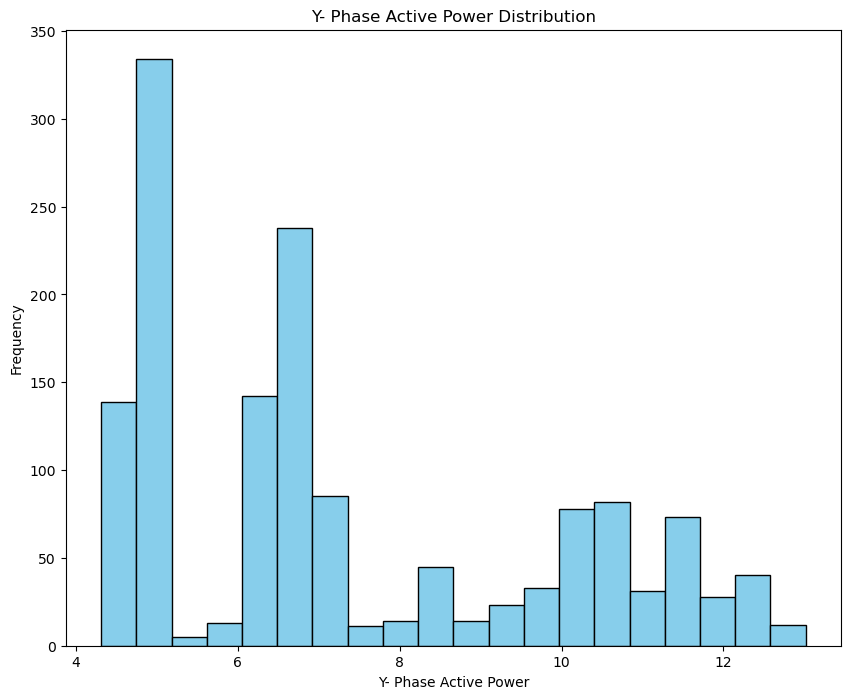

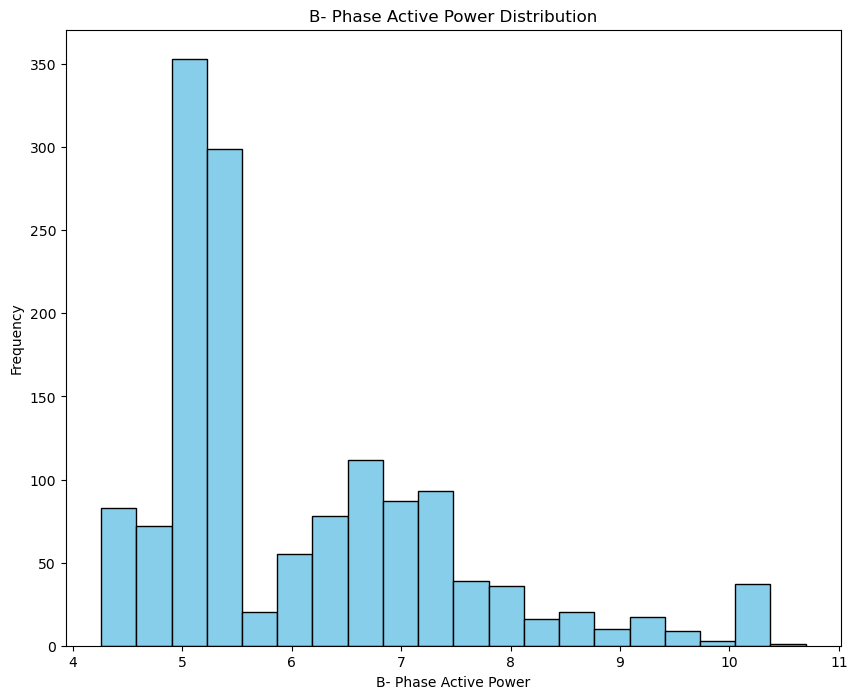

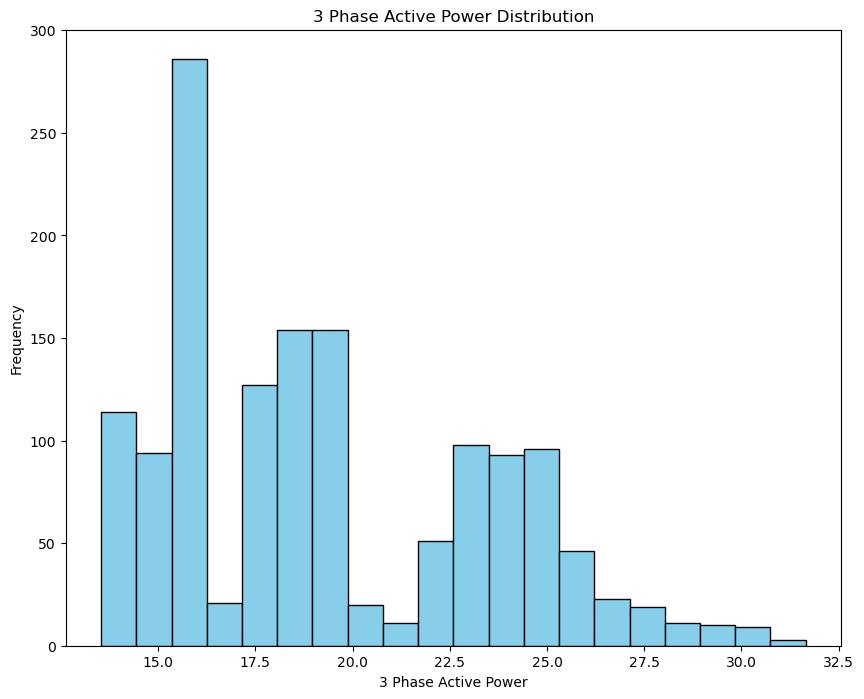

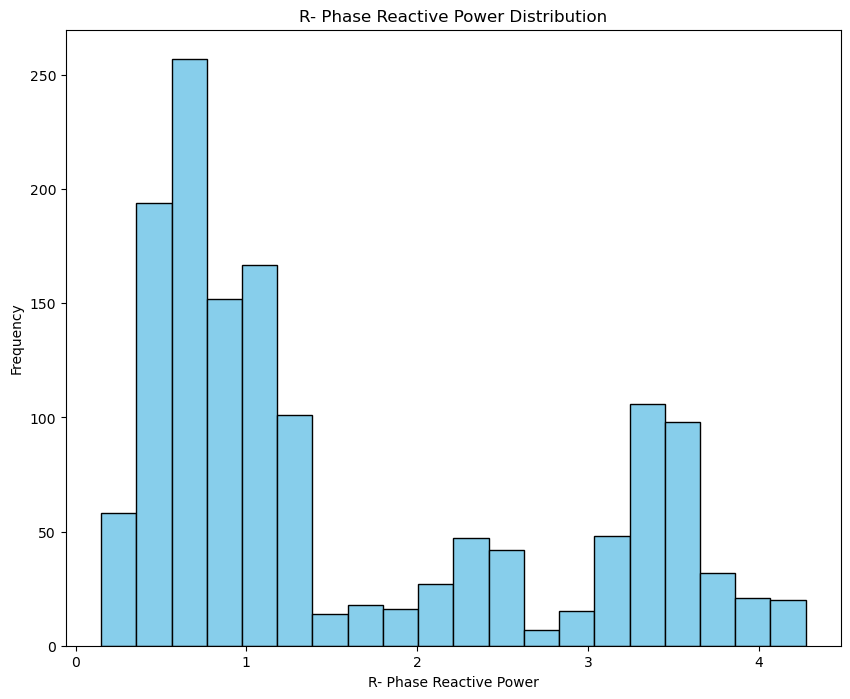

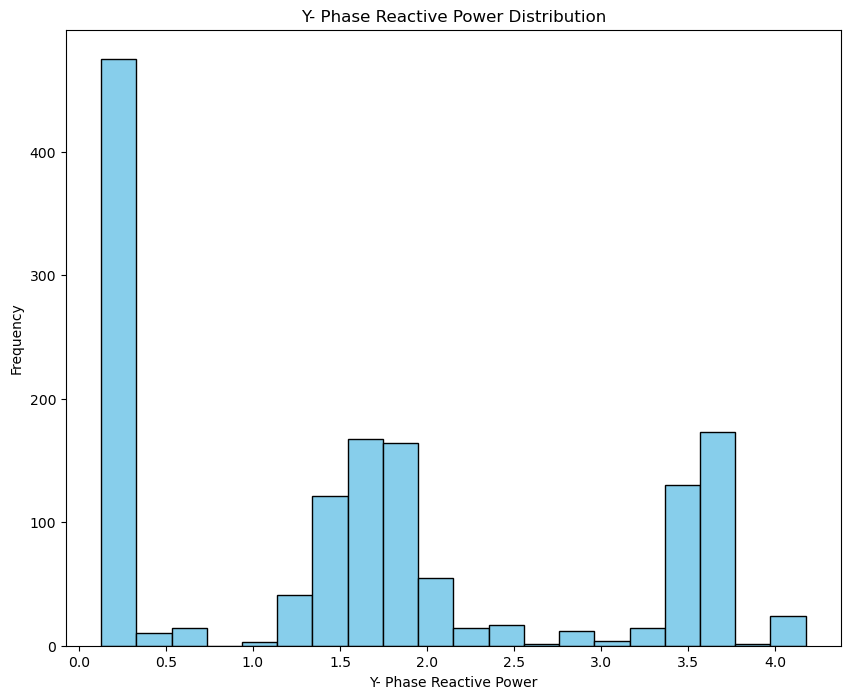

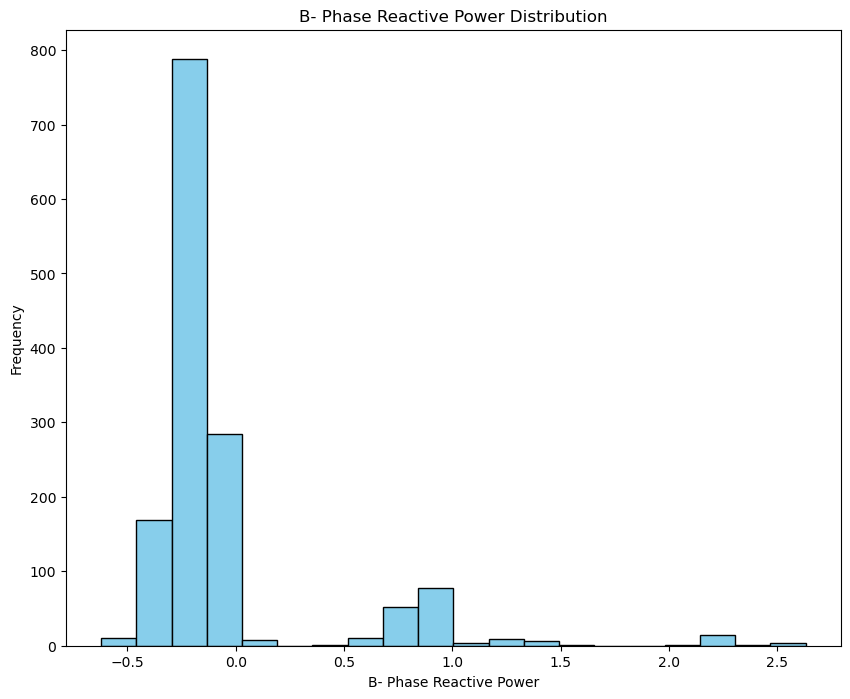

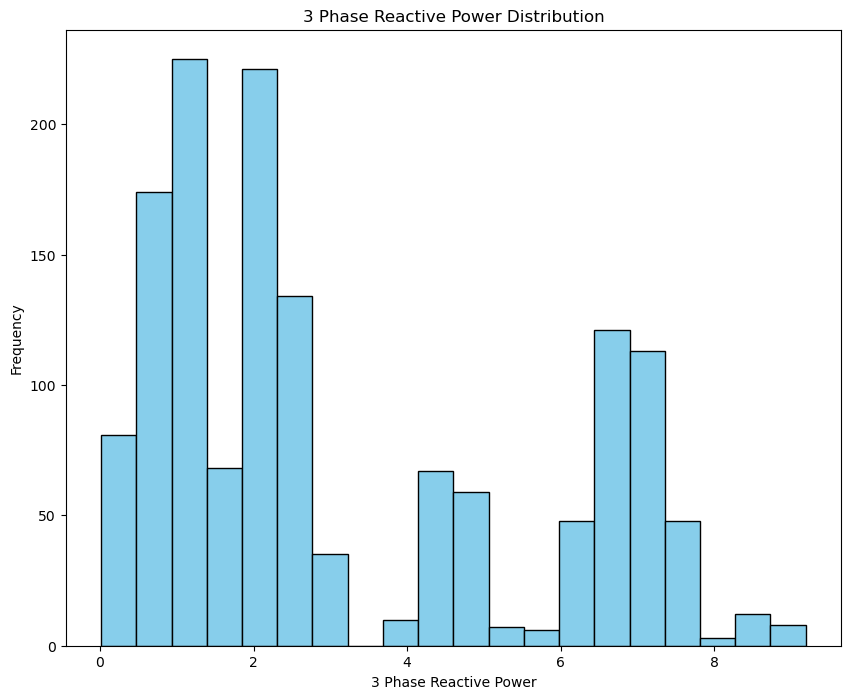

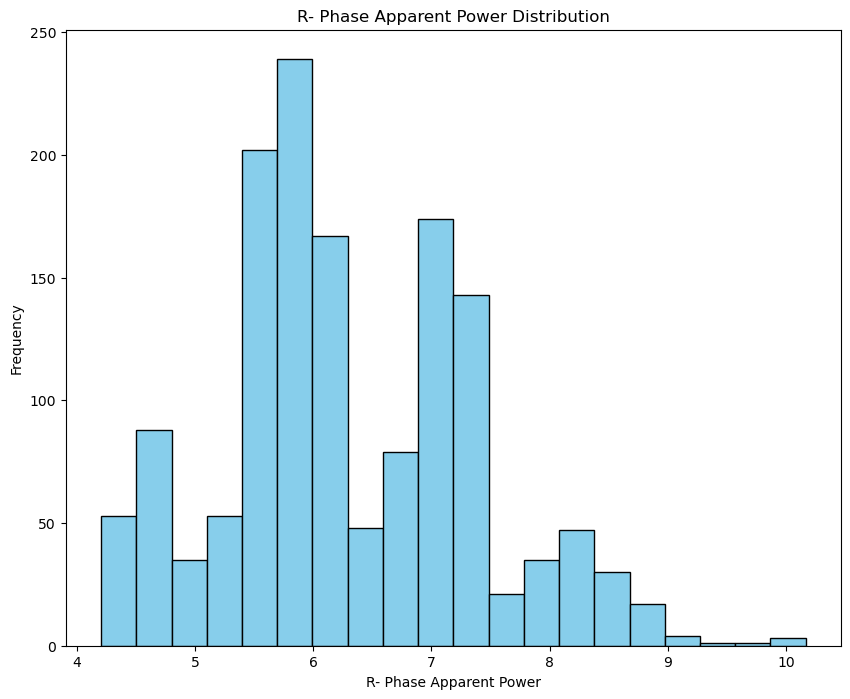

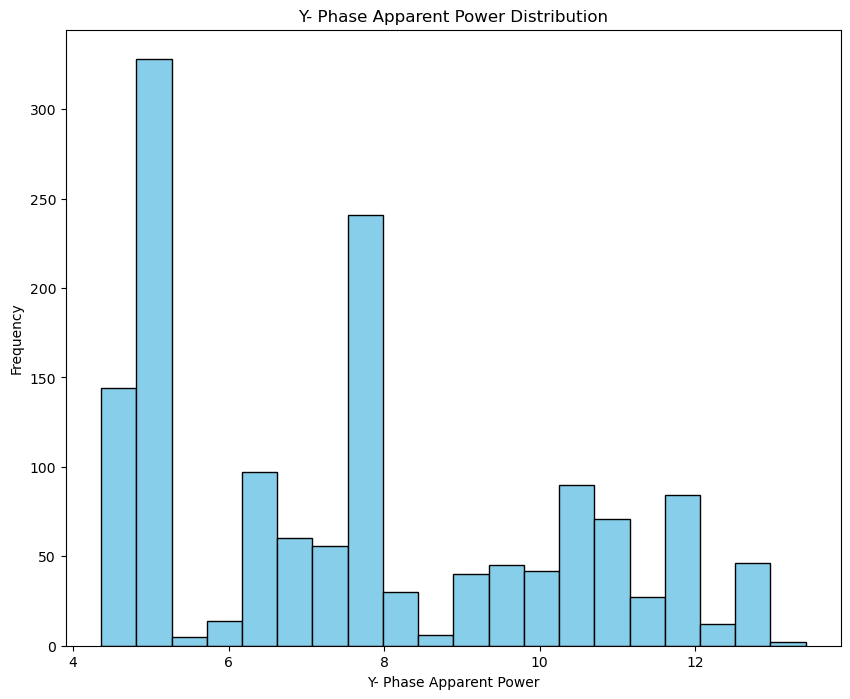

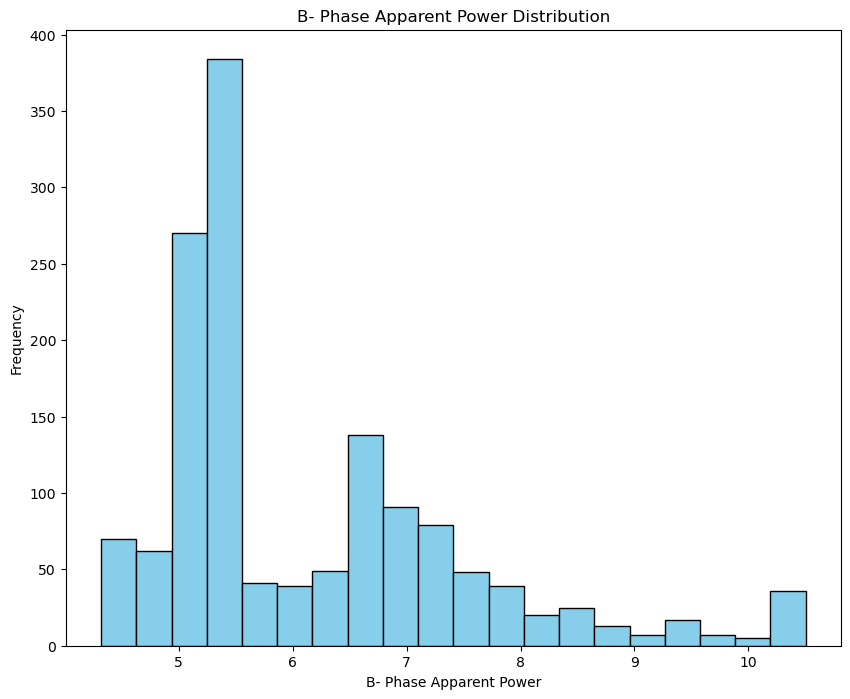

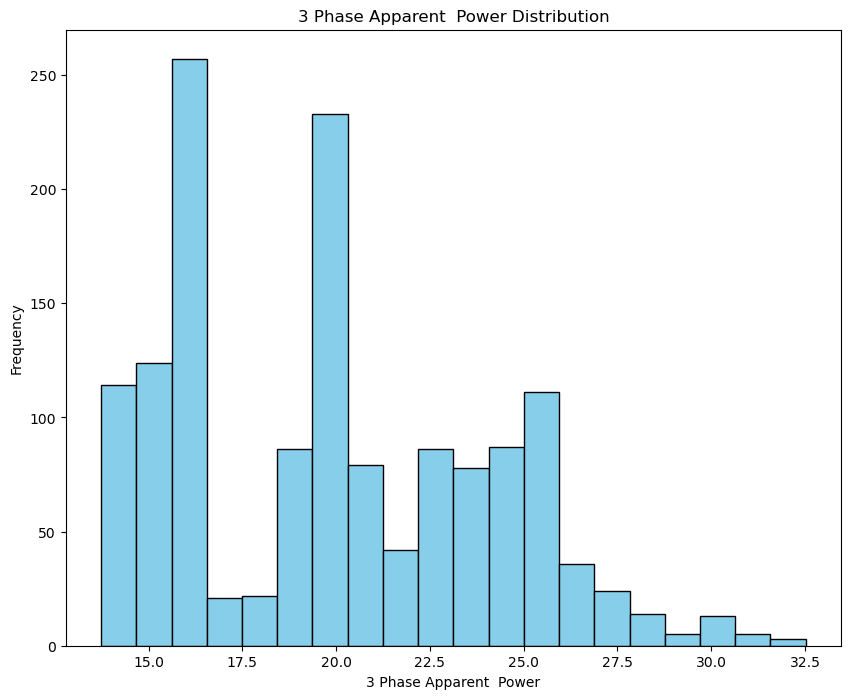

In [10]:
# Iterate over each column of the data_minute_avg DataFrame
for col in data_minute_avg.columns:
    plt.figure(figsize=(10, 8))
    plt.hist(data_minute_avg[col], bins=20, color='skyblue', edgecolor='black')
    tit = col + " Distribution"
    plt.title(tit)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


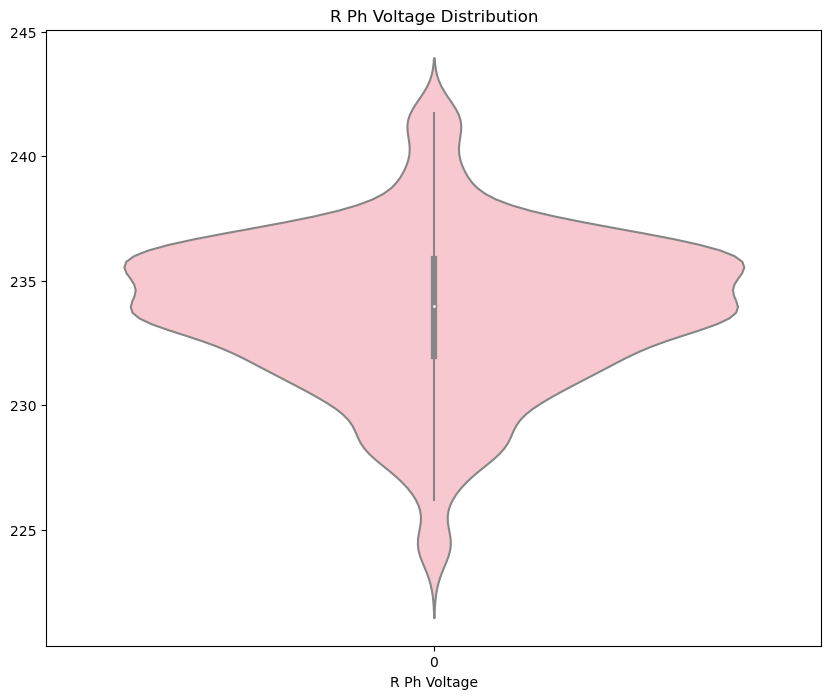

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


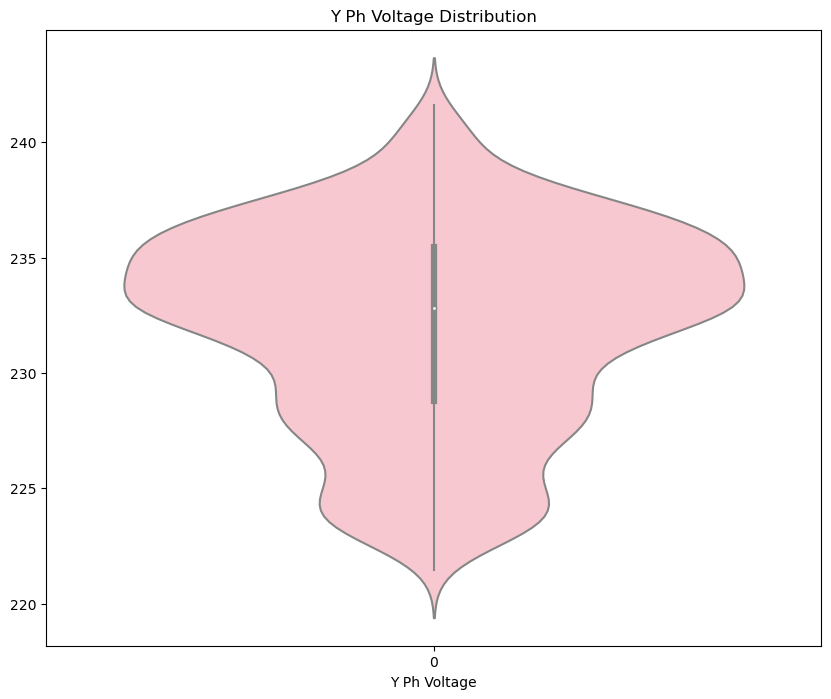

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


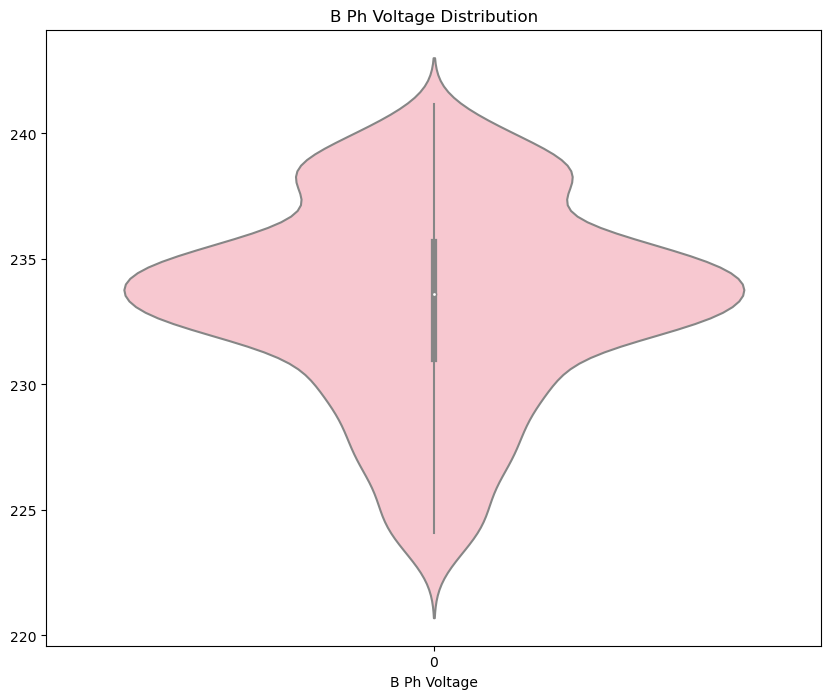

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


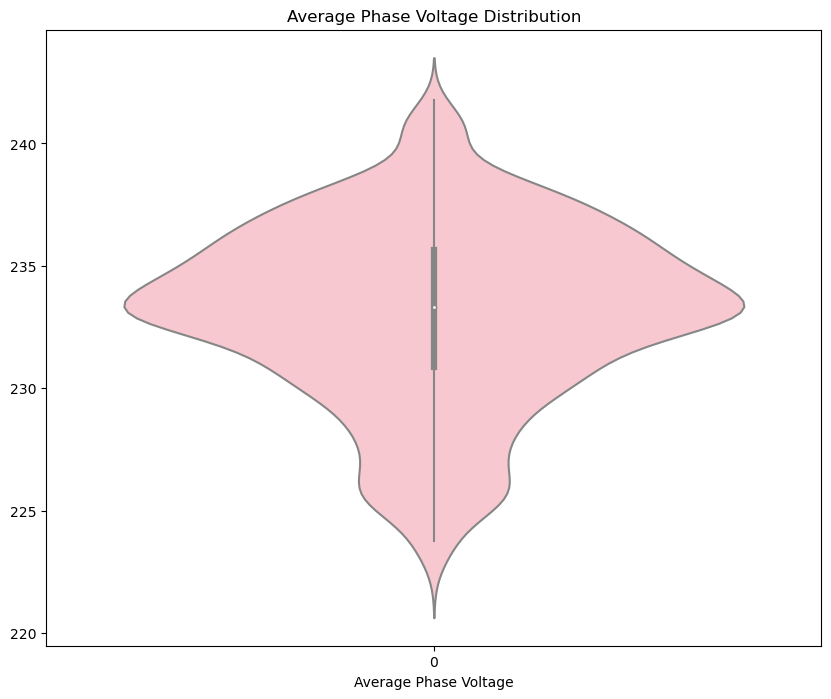

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


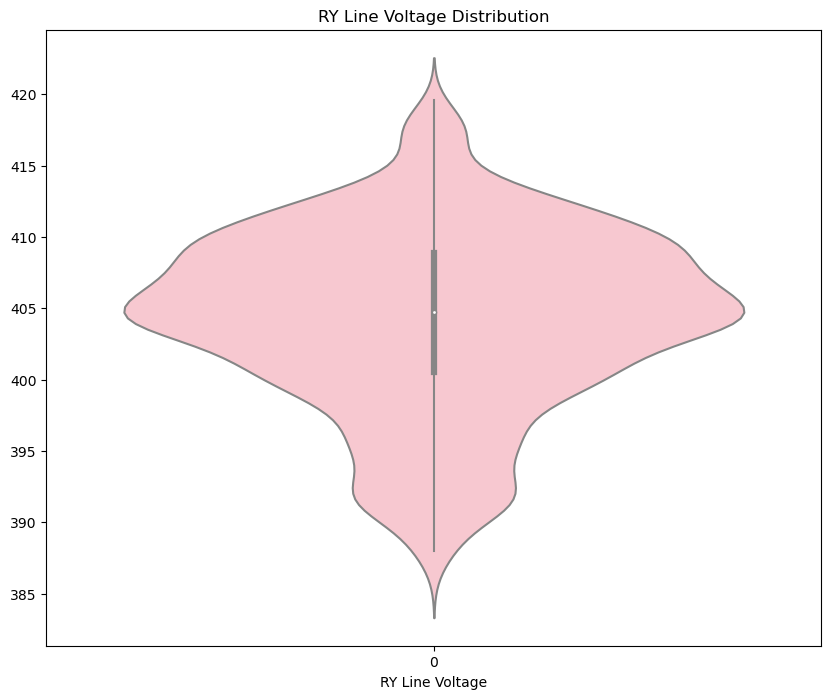

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


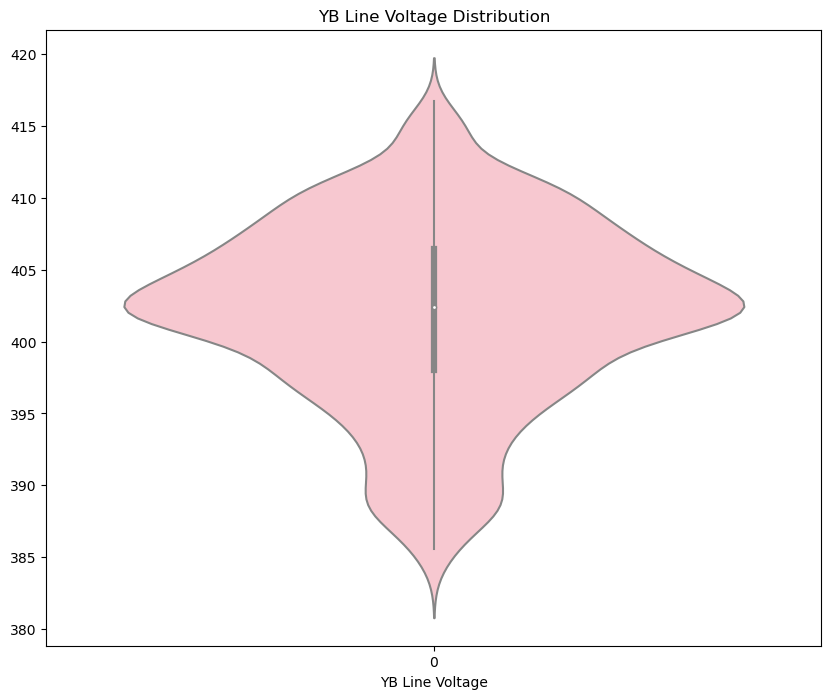

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


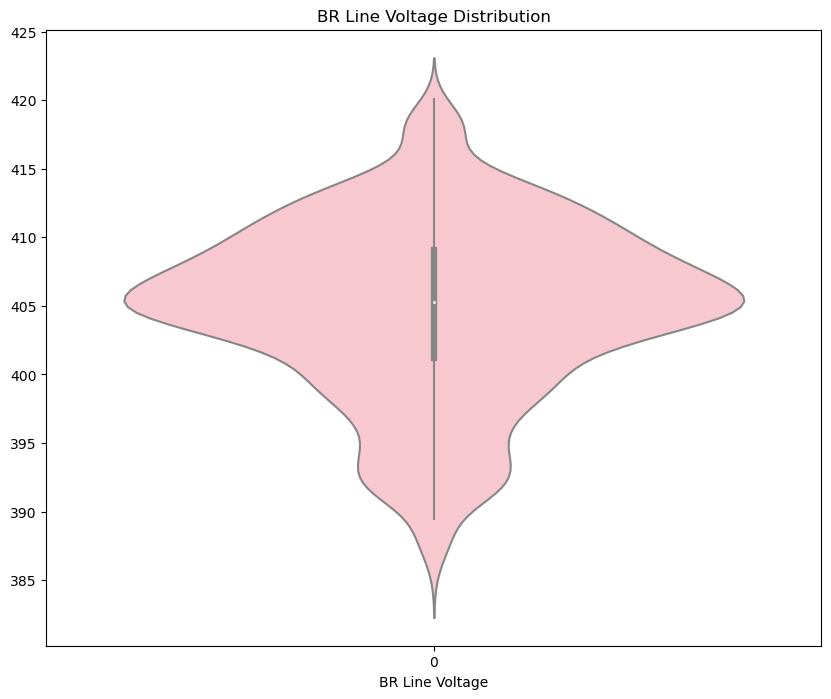

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


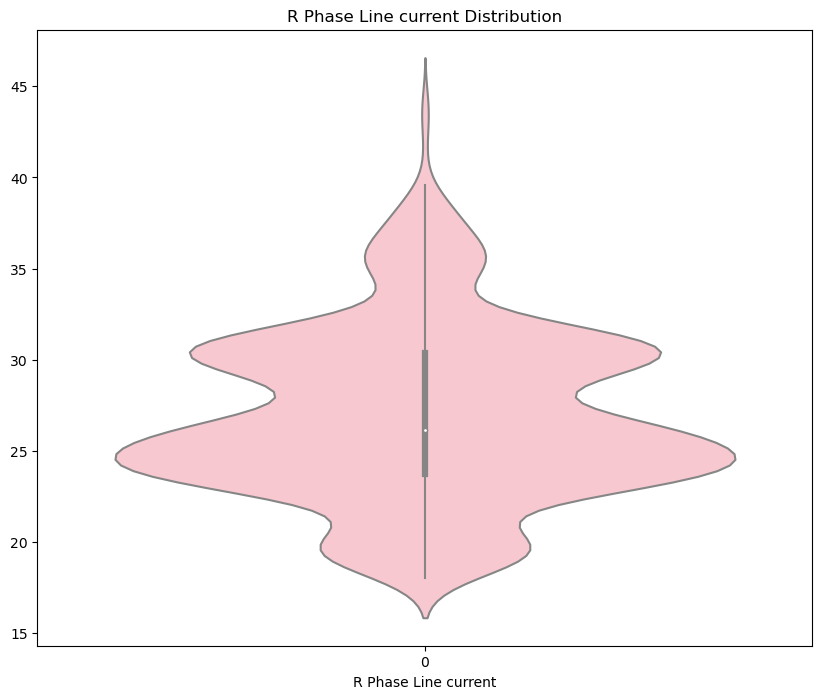

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


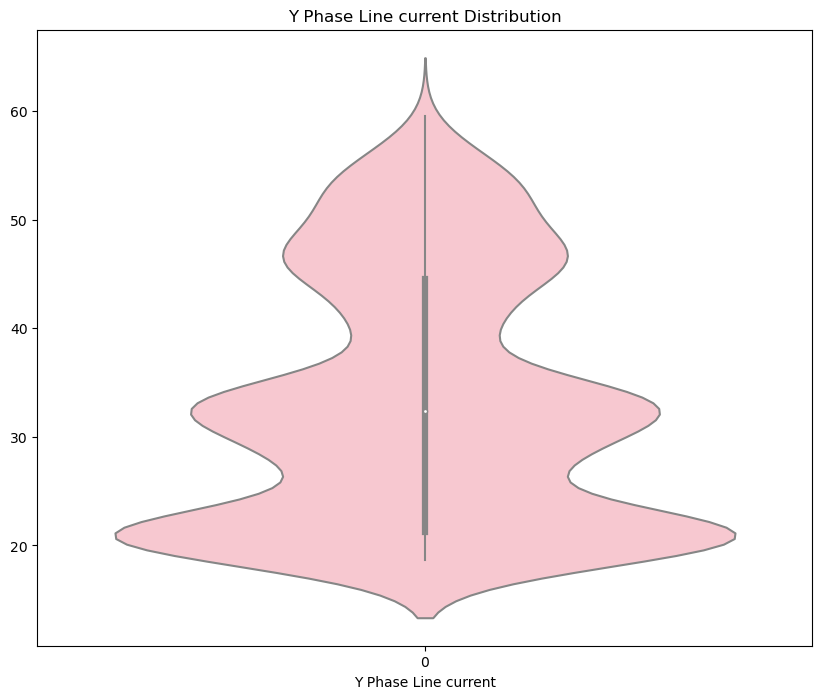

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


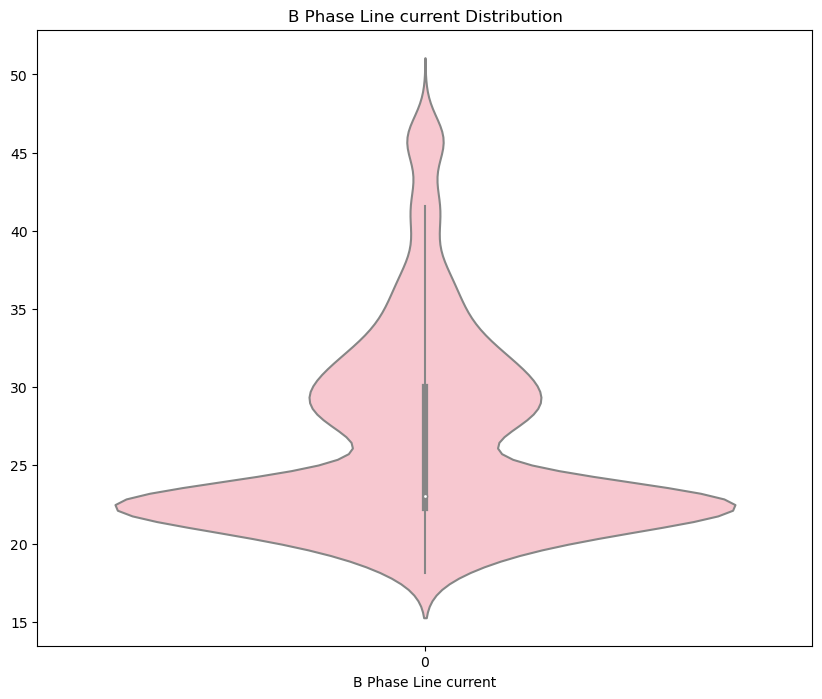

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


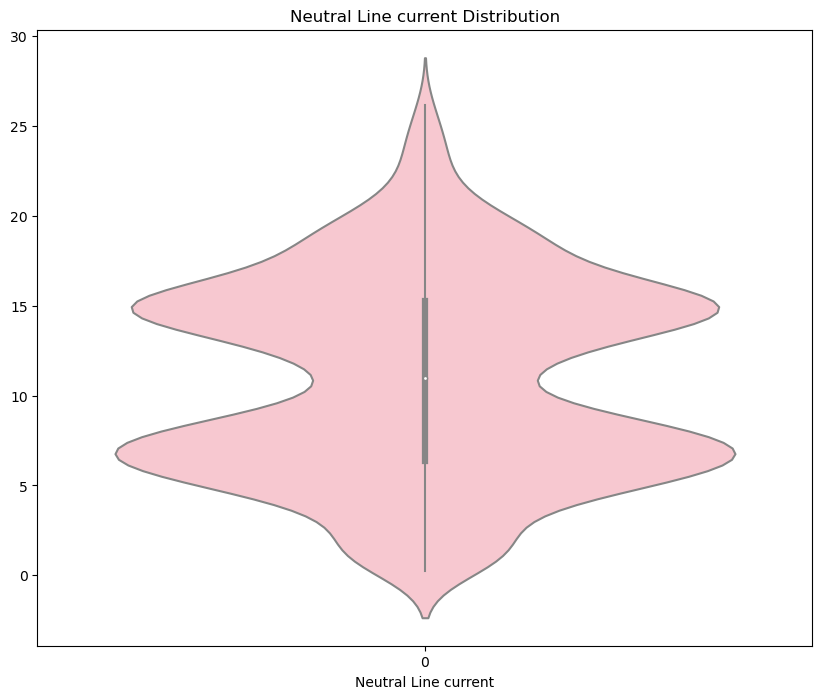

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


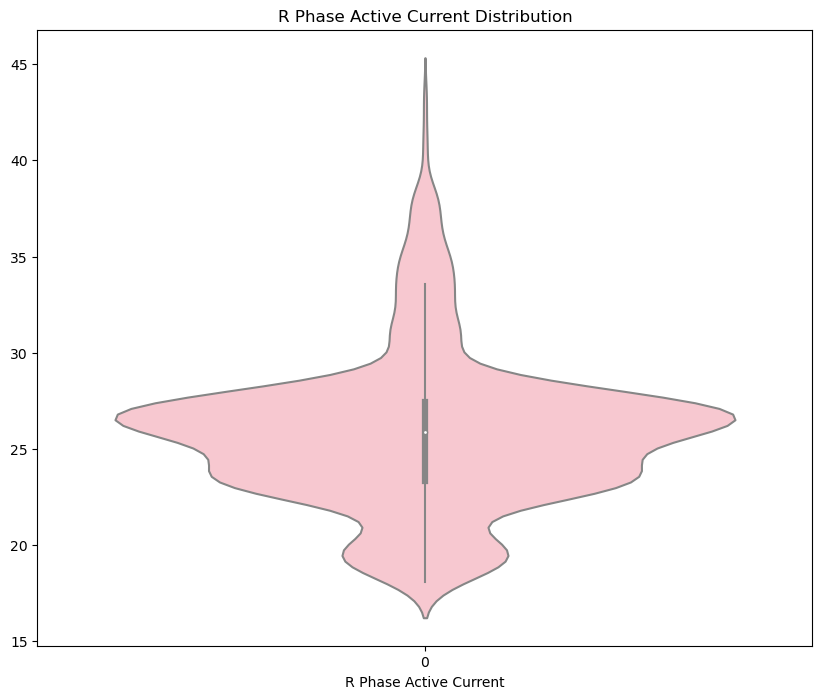

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


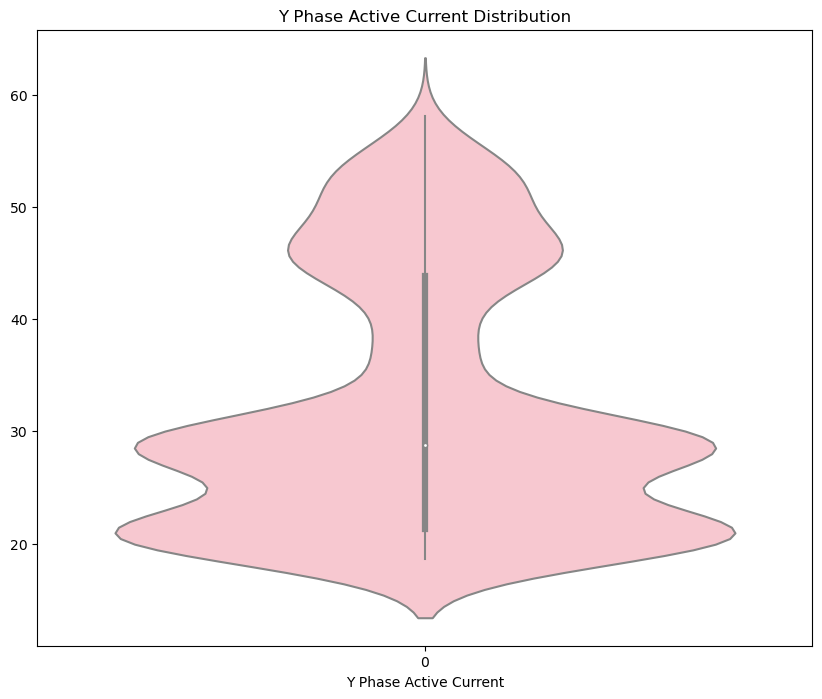

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


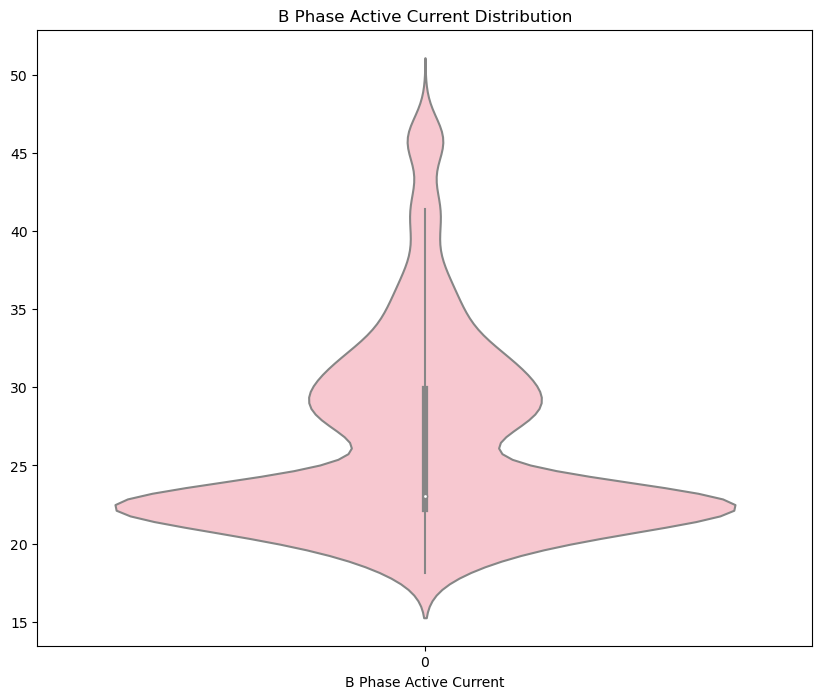

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


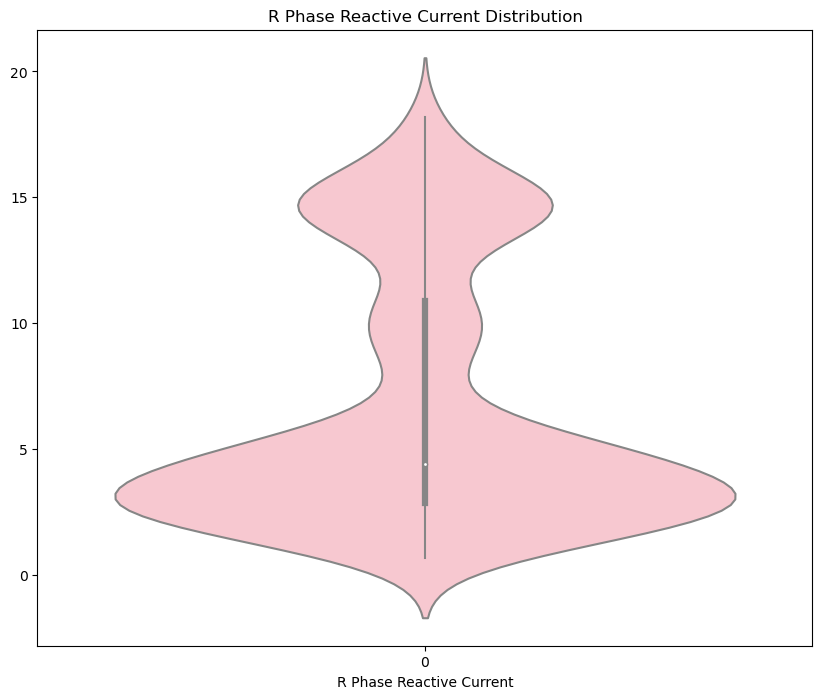

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


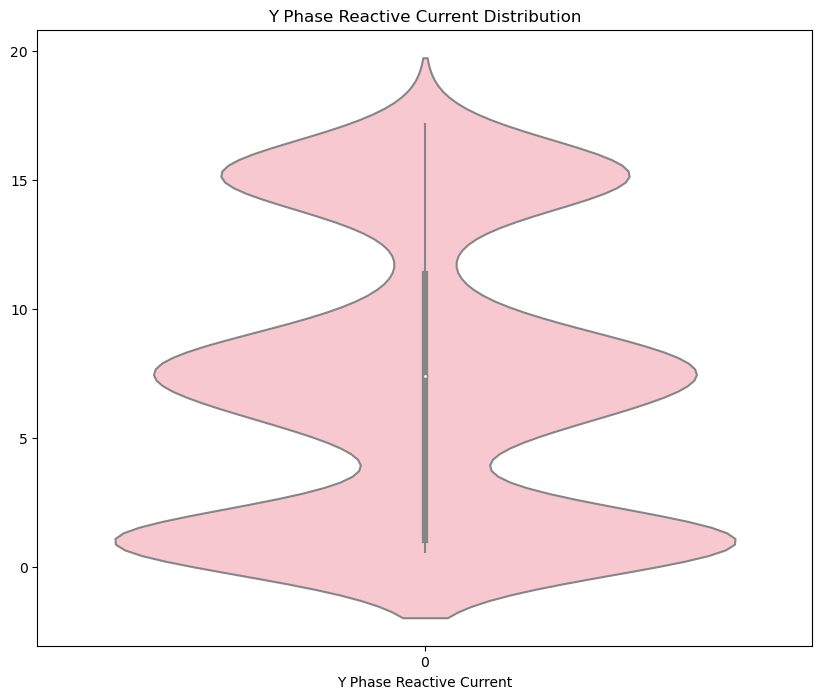

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


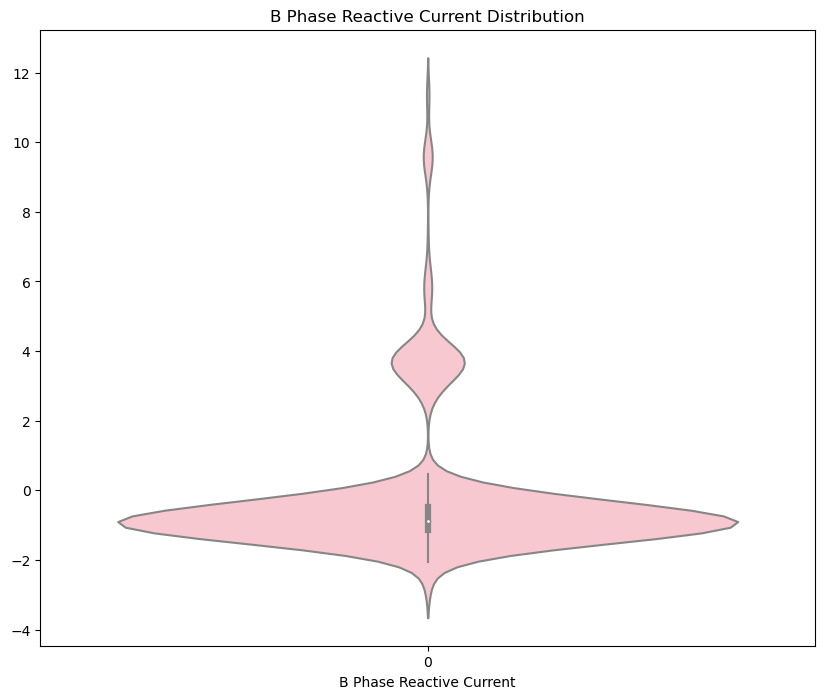

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


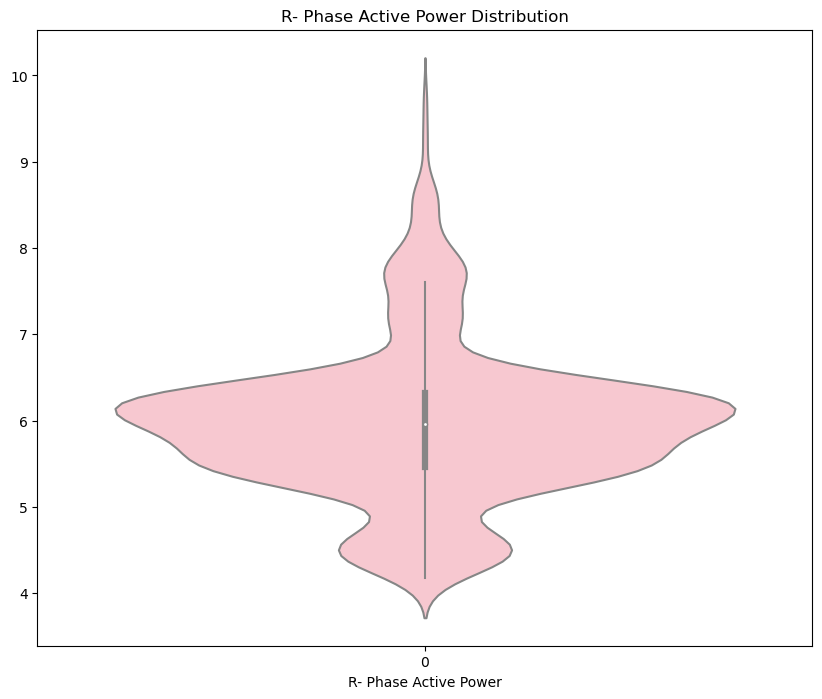

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


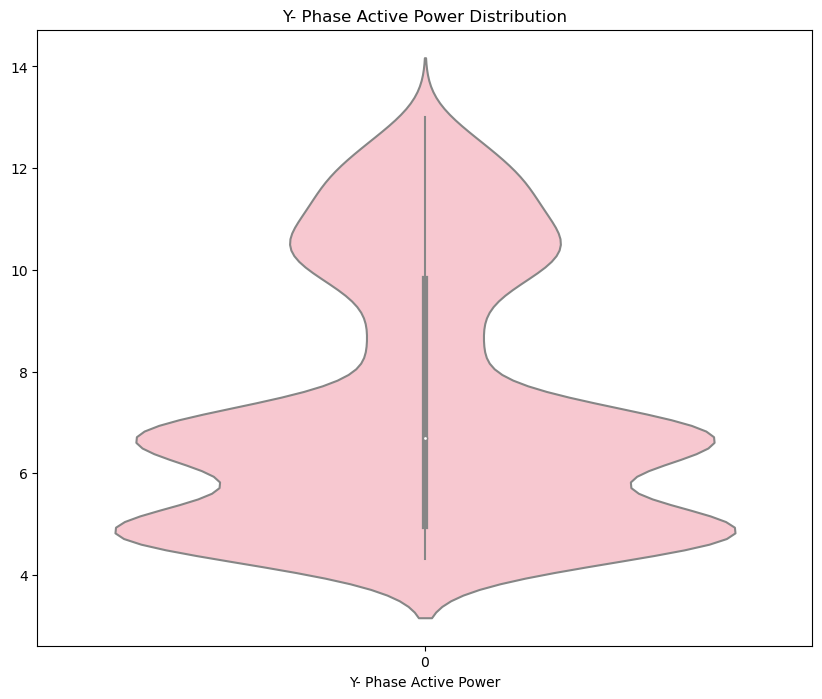

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


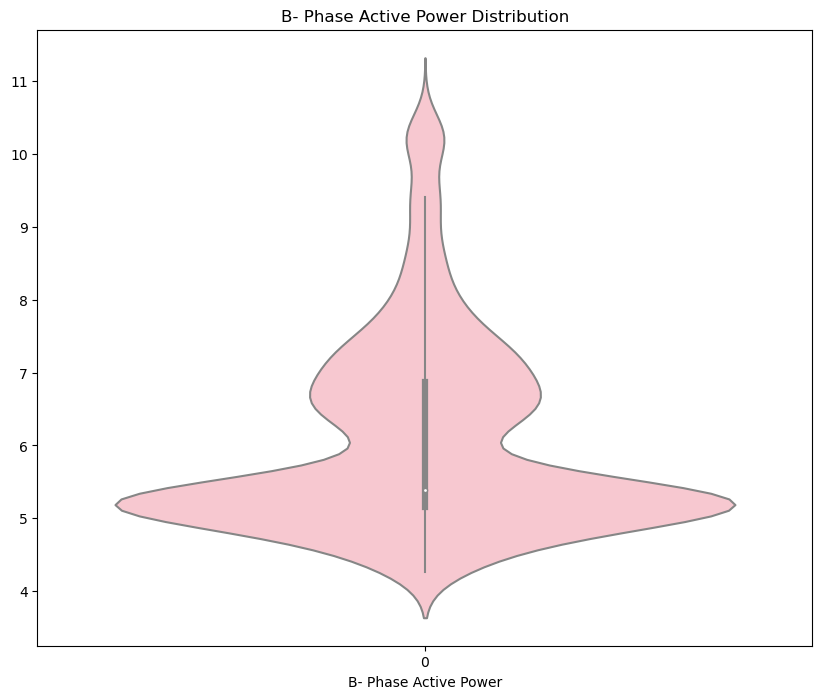

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


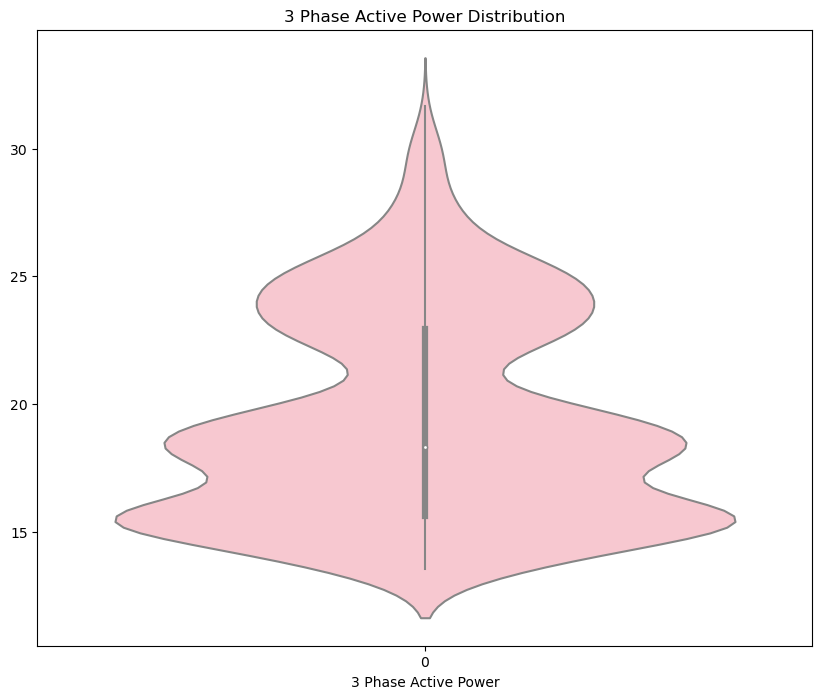

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


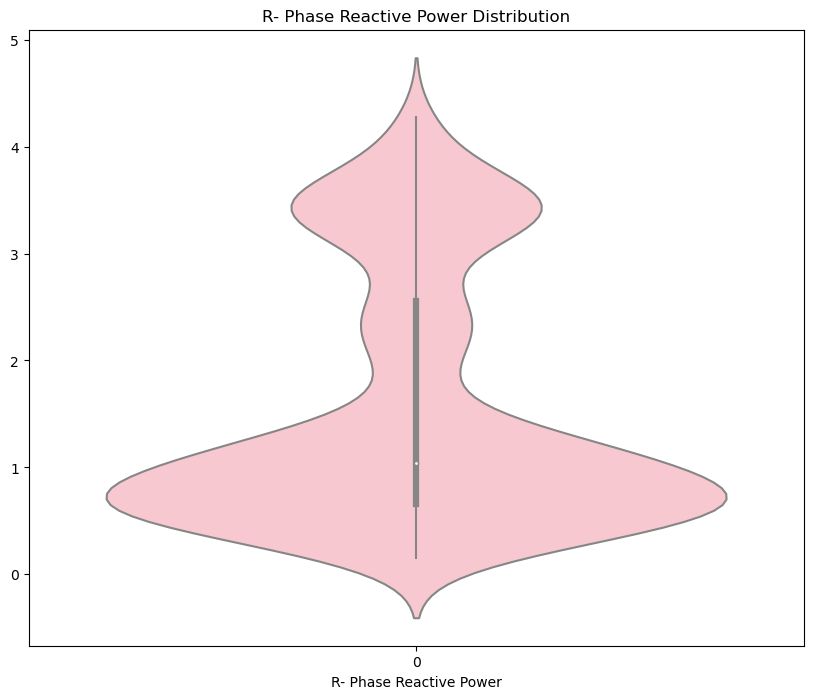

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


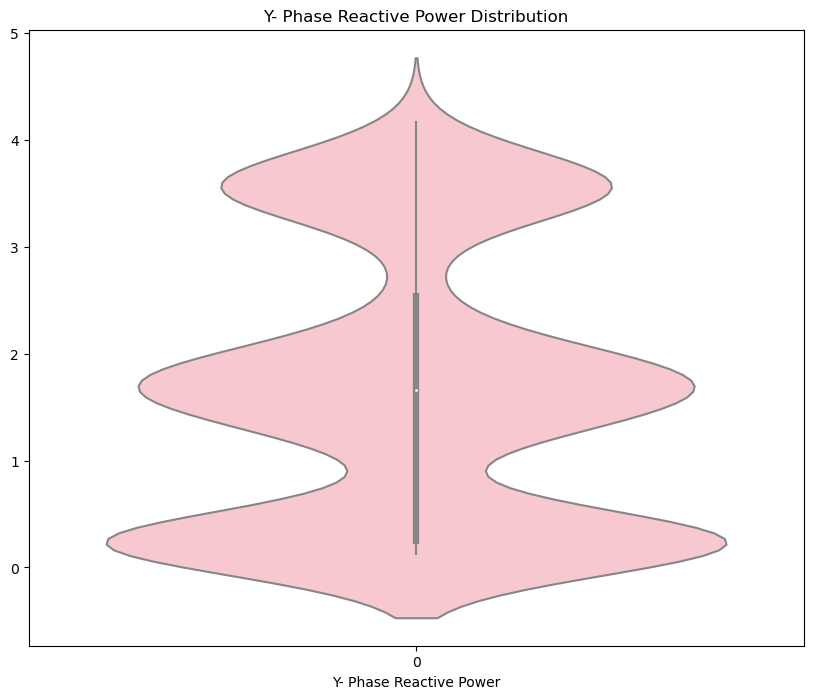

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


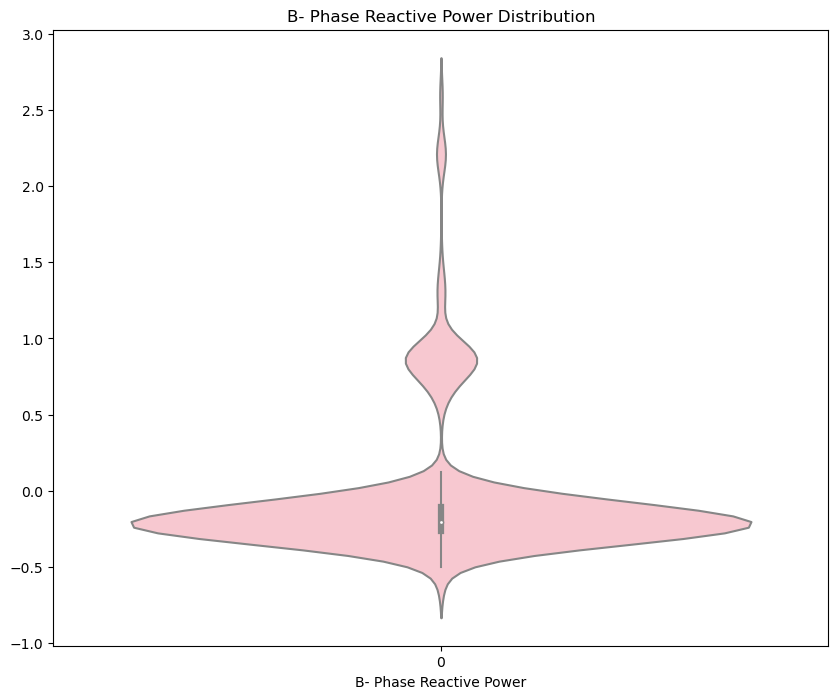

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


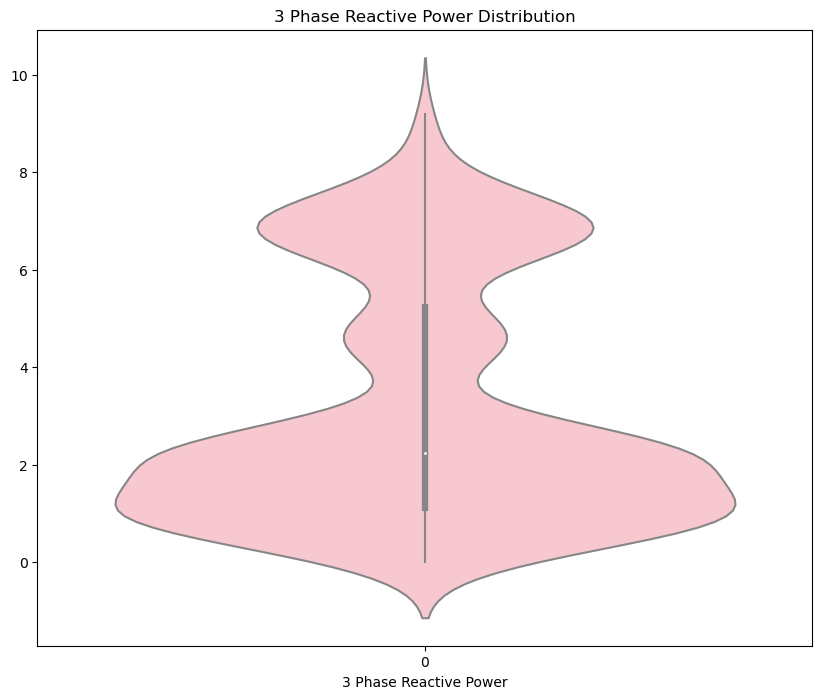

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


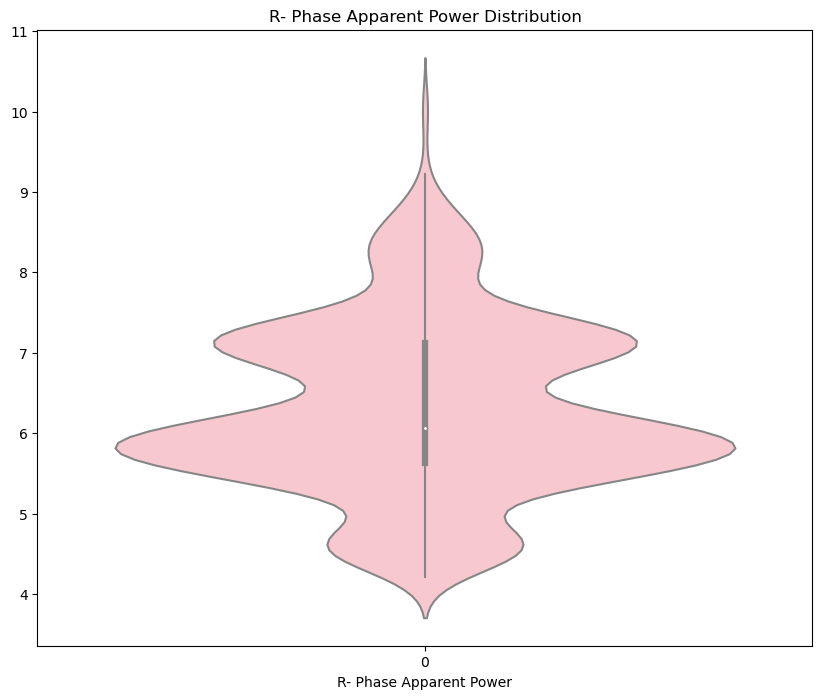

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


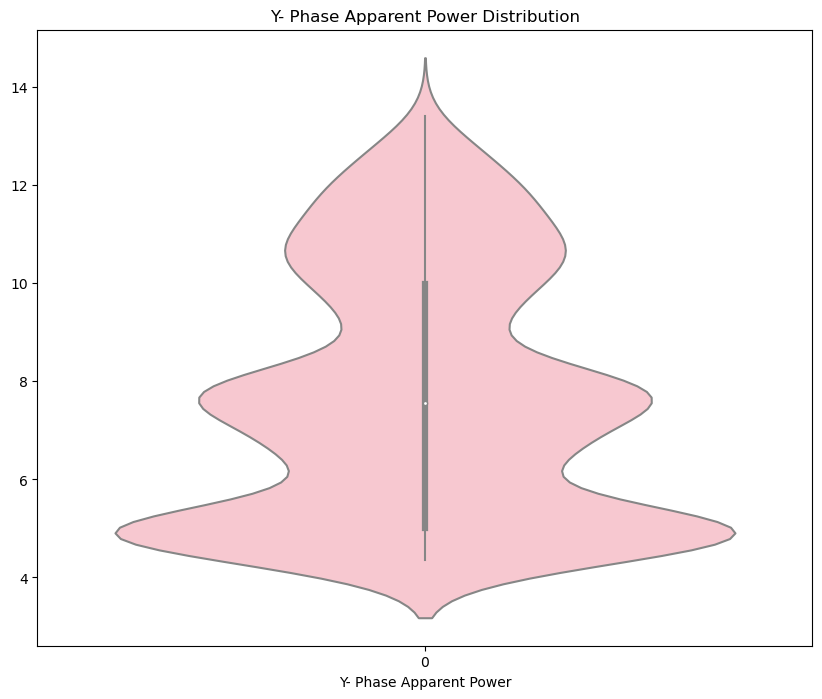

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


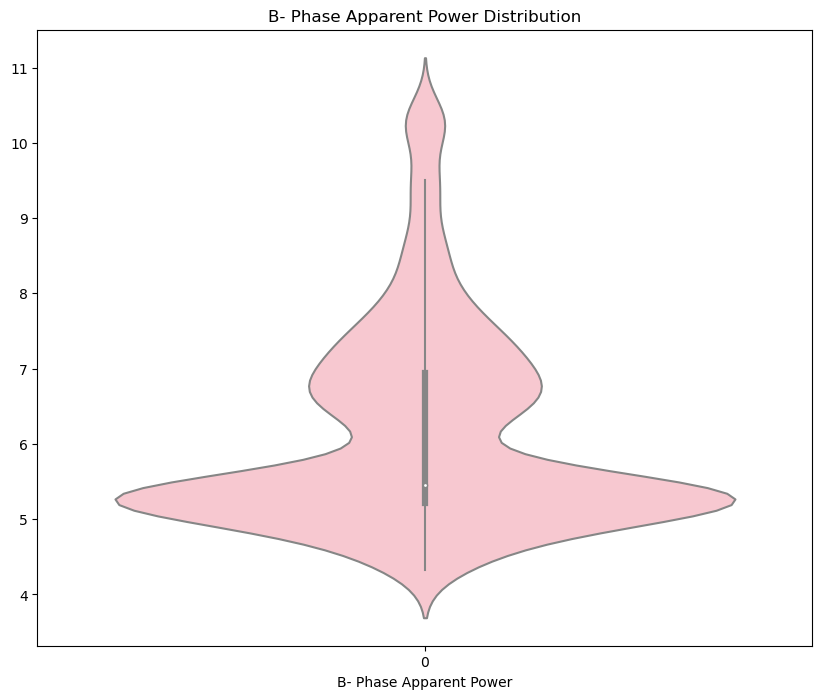

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


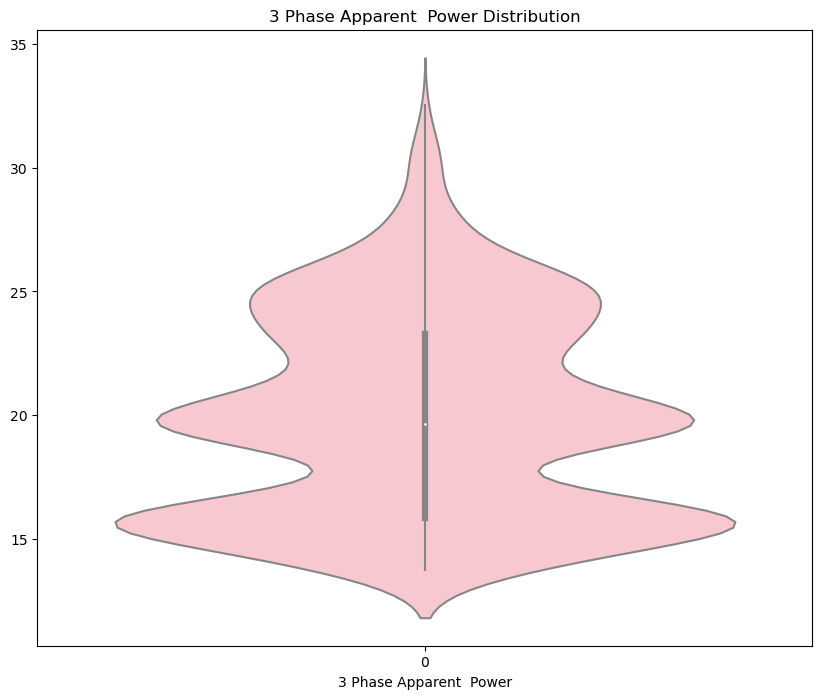

In [28]:
for col in data_minute_avg.columns:
    plt.figure(figsize=(10, 8))
    sns.violinplot(data=data_minute_avg[col], color='pink')
    tit = col + " Distribution"
    plt.title(tit)
    plt.xlabel(col)
    plt.show()

In [12]:
print("\033[1mMean\033[0m")
print()
data_minute_avg.mean()

Mean



R Ph Voltage                233.803370
Y Ph Voltage                232.069130
B Ph Voltage                233.211355
Average Phase Voltage       233.028390
RY Line Voltage             404.218610
YB Line Voltage             401.888191
BR Line Voltage             404.724051
R Phase Line current         26.974626
Y Phase Line current         33.126499
B Phase Line current         26.372053
Neutral Line current         10.956307
R Phase Active Current       25.755684
Y Phase Active Current       31.950946
B Phase Active Current       26.302705
R Phase Reactive Current      6.753064
Y Phase Reactive Current      7.156251
B Phase Reactive Current     -0.220495
R- Phase Active Power         5.946020
Y- Phase Active Power         7.332985
B- Phase Active Power         6.060556
3 Phase Active Power         19.338353
R- Phase Reactive Power       1.579657
Y- Phase Reactive Power       1.659164
B- Phase Reactive Power      -0.053623
3 Phase Reactive Power        3.185850
R- Phase Apparent Power  

In [13]:
print("\033[1mMedian\033[0m")
print()
data_minute_avg.median()

Median



R Ph Voltage                234.002500
Y Ph Voltage                232.836667
B Ph Voltage                233.604167
Average Phase Voltage       233.316667
RY Line Voltage             404.715000
YB Line Voltage             402.435833
BR Line Voltage             405.300000
R Phase Line current         26.135833
Y Phase Line current         32.336667
B Phase Line current         23.060833
Neutral Line current         10.972500
R Phase Active Current       25.870000
Y Phase Active Current       28.778333
B Phase Active Current       23.025833
R Phase Reactive Current      4.414167
Y Phase Reactive Current      7.386667
B Phase Reactive Current     -0.874167
R- Phase Active Power         5.955833
Y- Phase Active Power         6.695000
B- Phase Active Power         5.390000
3 Phase Active Power         18.297500
R- Phase Reactive Power       1.040000
Y- Phase Reactive Power       1.657500
B- Phase Reactive Power      -0.203333
3 Phase Reactive Power        2.239167
R- Phase Apparent Power  

In [14]:
print("\033[1mMode\033[0m")
print()
data_minute_avg.mode()

Mode



R Ph Voltage  Y Ph Voltage  B Ph Voltage  Average Phase Voltage  \
0     232.573333    228.783333    232.306667             225.630000   
1     233.233333    230.520000    232.331667             228.840000   
2     233.868333    232.836667    232.335000             233.225000   
3     235.586667    235.220000    232.626667             233.840000   
4     236.288333    235.585000    233.541667             236.863333   
5     236.300000           NaN    234.113333             237.076667   
6     236.380000           NaN    234.278333                    NaN   
7     236.420000           NaN    234.873333                    NaN   
8     236.770000           NaN    235.306667                    NaN   
9            NaN           NaN           NaN                    NaN   
10           NaN           NaN           NaN                    NaN   
11           NaN           NaN           NaN                    NaN   

    RY Line Voltage  YB Line Voltage  BR Line Voltage  R Phase Line current  \
0        404.096667       401.608333            405.3             22.816667   
1        410.515000       403.000000              NaN             23.303333   
2               NaN              NaN              NaN             23.556667   
3               NaN              NaN              NaN             24.126667   
4               NaN              NaN              NaN             24.260000   
5               NaN              NaN              NaN             24.910000   
6               NaN              NaN              NaN             26.080000   
7               NaN              NaN              NaN             26.573333   
8               NaN              NaN              NaN             31.533333   
9               NaN              NaN              NaN             31.580000   
10              NaN              NaN              NaN             31.590000   
11              NaN              NaN              NaN             31.613333   

    Y Phase Line current  B Phase Line current  ...  B- Phase Active Power  \
0              21.263333             22.603333  ...               5.203333   
1                    NaN                   NaN  ...                    NaN   
2                    NaN                   NaN  ...                    NaN   
3                    NaN                   NaN  ...                    NaN   
4                    NaN                   NaN  ...                    NaN   
5                    NaN                   NaN  ...                    NaN   
6                    NaN                   NaN  ...                    NaN   
7                    NaN                   NaN  ...                    NaN   
8                    NaN                   NaN  ...                    NaN   
9                    NaN                   NaN  ...                    NaN   
10                   NaN                   NaN  ...                    NaN   
11                   NaN                   NaN  ...                    NaN   

    3 Phase Active Power  R- Phase Reactive Power  Y- Phase Reactive Power  \
0              15.461667                     0.71                 0.213333   
1              15.505000                      NaN                      NaN   
2              15.536667                      NaN                      NaN   
3              15.560000                      NaN                      NaN   
4              18.221667                      NaN                      NaN   
5                    NaN                      NaN                      NaN   
6                    NaN                      NaN                      NaN   
7                    NaN                      NaN                      NaN   
8                    NaN                      NaN                      NaN   
9                    NaN                      NaN                      NaN   
10                   NaN                      NaN                      NaN   
11                   NaN                      NaN                      NaN   

    B- Phase Reactive 

In [15]:
print("\033[1mStandard Deviation\033[0m")
print()
for col in data_minute_avg.columns:
    print(col, ":", stats.stdev(data_minute_avg[col]))

Standard Deviation

R Ph Voltage : 3.171990104165955
Y Ph Voltage : 4.4303111461137785
B Ph Voltage : 3.9484335356483107
Average Phase Voltage : 3.7094198194260133
RY Line Voltage : 6.390126820709543
YB Line Voltage : 6.471920320128618
BR Line Voltage : 6.429869152424708
R Phase Line current : 4.723051310280334
Y Phase Line current : 11.42604559426256
B Phase Line current : 6.175437767807627
Neutral Line current : 5.62241095725543
R Phase Active Current : 3.926010492875708
Y Phase Active Current : 11.21629797062077
B Phase Active Current : 6.137722039637347
R Phase Reactive Current : 5.078568639157112
Y Phase Reactive Current : 5.474148615486598
B Phase Reactive Current : 1.9770432121067631
R- Phase Active Power : 0.8781876162327186
Y- Phase Active Power : 2.477352677295844
B- Phase Active Power : 1.3407915350235111
3 Phase Active Power : 4.0749022092344465
R- Phase Reactive Power : 1.189909335784449
Y- Phase Reactive Power : 1.2821559839800512
B- Phase Reactive Power : 0.4558529671341

In [16]:
print("\033[1mVariance\033[0m")
print()
for col in data_minute_avg.columns:
    print(col, ":", stats.variance(data_minute_avg[col]))

Variance

R Ph Voltage : 10.061521220926744
Y Ph Voltage : 19.62765685137998
B Ph Voltage : 15.590127385432218
Average Phase Voltage : 13.759795396750517
RY Line Voltage : 40.833720784751456
YB Line Voltage : 41.88575263009371
BR Line Voltage : 41.34321731730283
R Phase Line current : 22.30721367954078
Y Phase Line current : 130.55451792216684
B Phase Line current : 38.13603162406485
Neutral Line current : 31.611504972265923
R Phase Active Current : 15.413558390170161
Y Phase Active Current : 125.80534016575163
B Phase Active Current : 37.67163183585003
R Phase Reactive Current : 25.791859422630118
Y Phase Reactive Current : 29.966303064433838
B Phase Reactive Current : 3.9086998625374276
R- Phase Active Power : 0.7712134893045046
Y- Phase Active Power : 6.137276287704886
B- Phase Active Power : 1.7977219403907034
3 Phase Active Power : 16.60482801482377
R- Phase Reactive Power : 1.4158842273869885
Y- Phase Reactive Power : 1.6439239672558532
B- Phase Reactive Power : 0.207801927645012

In [17]:
# Calculate the correlation matrix
correlation_matrix = data_minute_avg.corr()
correlation_matrix.head(29)

R Ph Voltage  Y Ph Voltage  B Ph Voltage  \
R Ph Voltage                  1.000000      0.858136      0.891371   
Y Ph Voltage                  0.858136      1.000000      0.919343   
B Ph Voltage                  0.891371      0.919343      1.000000   
Average Phase Voltage         0.942816      0.968651      0.974554   
RY Line Voltage               0.943962      0.974096      0.962987   
YB Line Voltage               0.934201      0.966600      0.980661   
BR Line Voltage               0.946953      0.961587      0.975656   
R Phase Line current         -0.320222     -0.138245     -0.056489   
Y Phase Line current         -0.402387     -0.687163     -0.400104   
B Phase Line current         -0.545634     -0.737715     -0.732542   
Neutral Line current         -0.145787     -0.275262     -0.002277   
R Phase Active Current       -0.416939     -0.322069     -0.239846   
Y Phase Active Current       -0.403498     -0.726187     -0.451364   
B Phase Active Current       -0.545539     -0.739994     -0.733060   
R Phase Reactive Current      0.064864      0.401702      0.417914   
Y Phase Reactive Current     -0.218575     -0.091678      0.117656   
B Phase Reactive Current     -0.226652     -0.177402     -0.266550   
R- Phase Active Power        -0.339005     -0.254966     -0.165244   
Y- Phase Active Power        -0.372082     -0.698183     -0.416026   
B- Phase Active Power        -0.507007     -0.713740     -0.698537   
3 Phase Active Power         -0.465383     -0.713762     -0.517809   
R- Phase Reactive Power       0.080393      0.413796      0.431228   
Y- Phase Reactive Power      -0.196123     -0.064248      0.143029   
B- Phase Reactive Power      -0.227437     -0.178937     -0.268776   
3 Phase Reactive Power       -0.105323      0.133236      0.232671   
R- Phase Apparent Power      -0.245333     -0.070397      0.017143   
Y- Phase Apparent Power      -0.368681     -0.653643     -0.359397   
B- Phase Apparent Power      -0.508696     -0.710940     -0.698284   
3 Phase Apparent  Power      -0.460145     -0.667879     -0.466605   

                          Average Phase Voltage  RY Line Voltage  \
R Ph Voltage                           0.942816         0.943962   
Y Ph Voltage                           0.968651         0.974096   
B Ph Voltage                           0.974554         0.962987   
Average Phase Voltage                  1.000000         0.998420   
RY Line Voltage                        0.998420         1.000000   
YB Line Voltage                        0.998872         0.996008   
BR Line Voltage                        0.998772         0.995802   
R Phase Line current                  -0.166530        -0.181127   
Y Phase Line current                  -0.530176        -0.557666   
B Phase Line current                  -0.708683        -0.704483   
Neutral Line current                  -0.152161        -0.189914   
R Phase Active Current                -0.332181        -0.341901   
Y Phase Active Current                -0.564147        -0.588409   
B Phase Active Current                -0.709744        -0.706072   
R Phase Reactive Current               0.326219         0.309805   
Y Phase Reactive Current              -0.057452        -0.090502   
B Phase Reactive Current              -0.229655        -0.211957   
R- Phase Active Power                 -0.256764        -0.266994   
Y- Phase Active Power                 -0.531515        -0.556561   
B- Phase Active Power                 -0.676030        -0.672949   
3 Phase Active Power                  -0.600306        -0.616733   
R- Phase Reactive Power                0.340197         0.323700   
Y- Phase Reactive Power               -0.031133        -0.064150   
B- Phase Reactive Power               -0.231266        -0.213531   
3 Phase Reactive Power                 0.105177         0.083337   
R- Phase Apparent Power               -0.092021        -0.107216   
Y- Phase Apparent Power               -0.492791        -0.521209   
B- Phase Apparent Pow

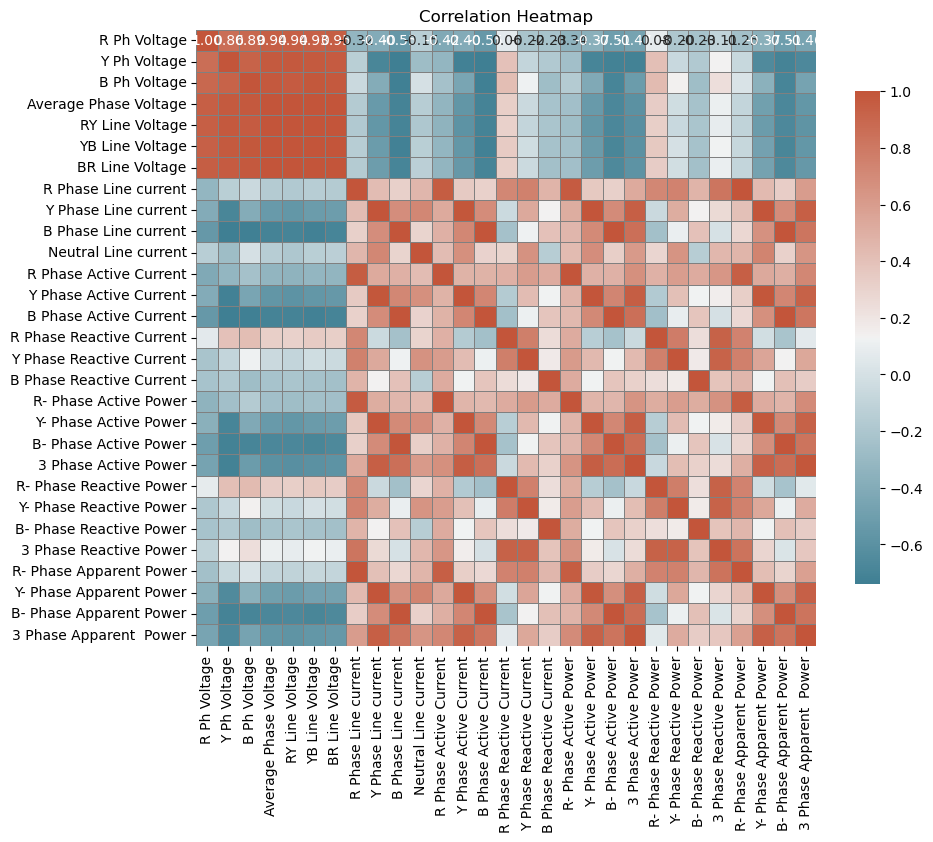

In [22]:
plt.figure(figsize = (10, 8))
custom_palette = sns.diverging_palette(220, 20, as_cmap = True)
sns.heatmap(correlation_matrix, annot = True, cmap = custom_palette, fmt = ".2f", 
            linewidths = 0.5, linecolor = 'gray', cbar_kws = {"shrink": 0.8})
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


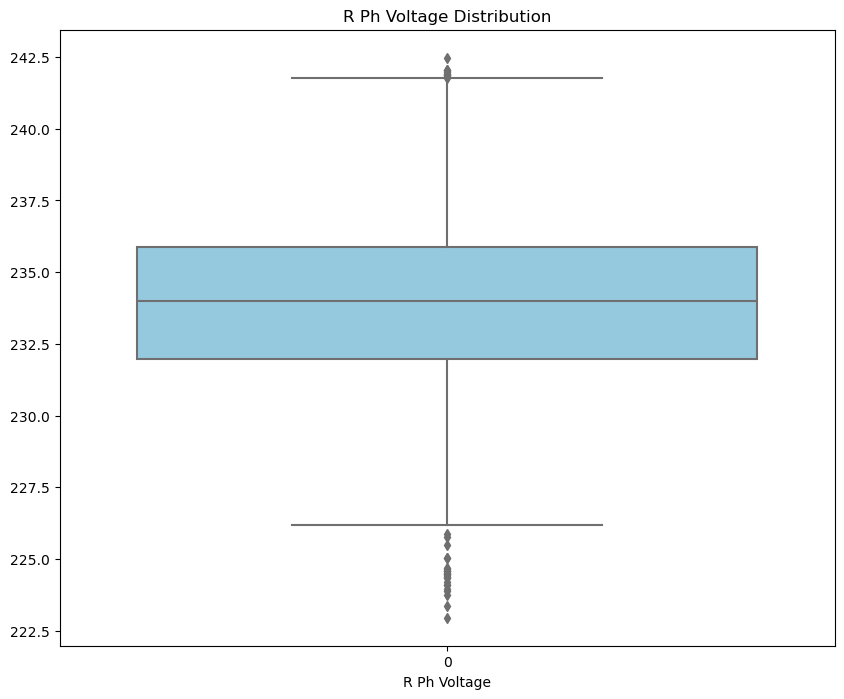

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


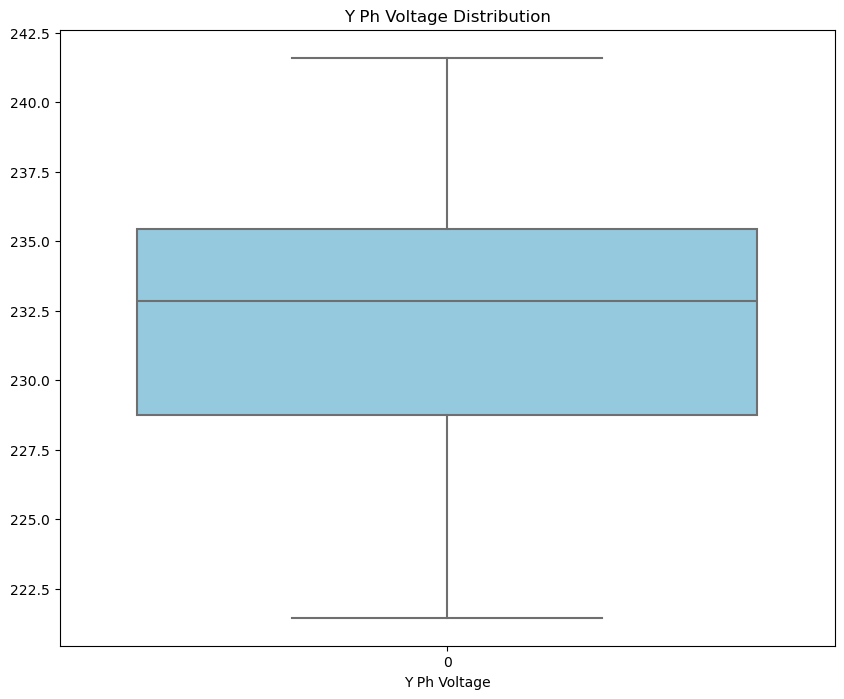

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


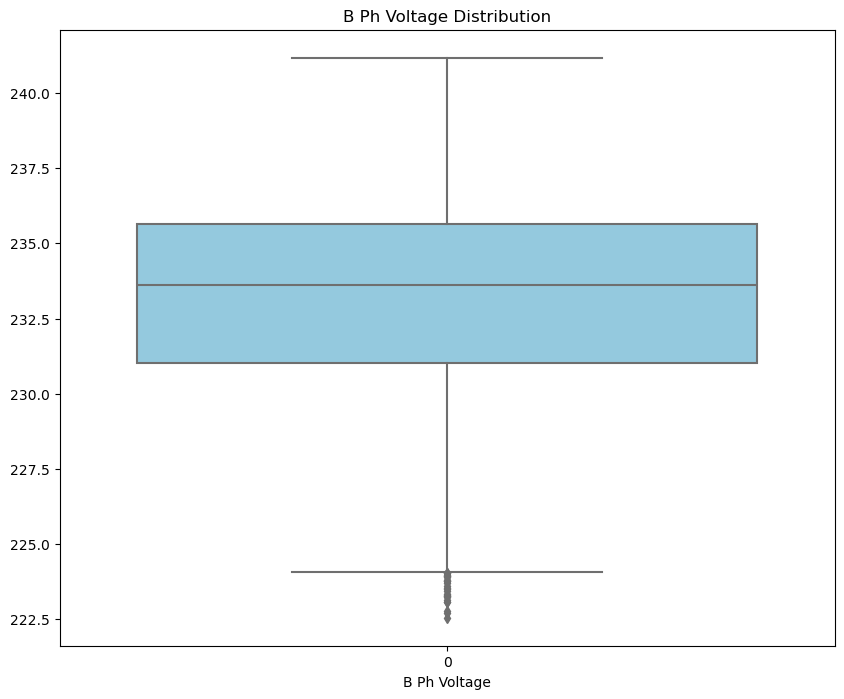

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


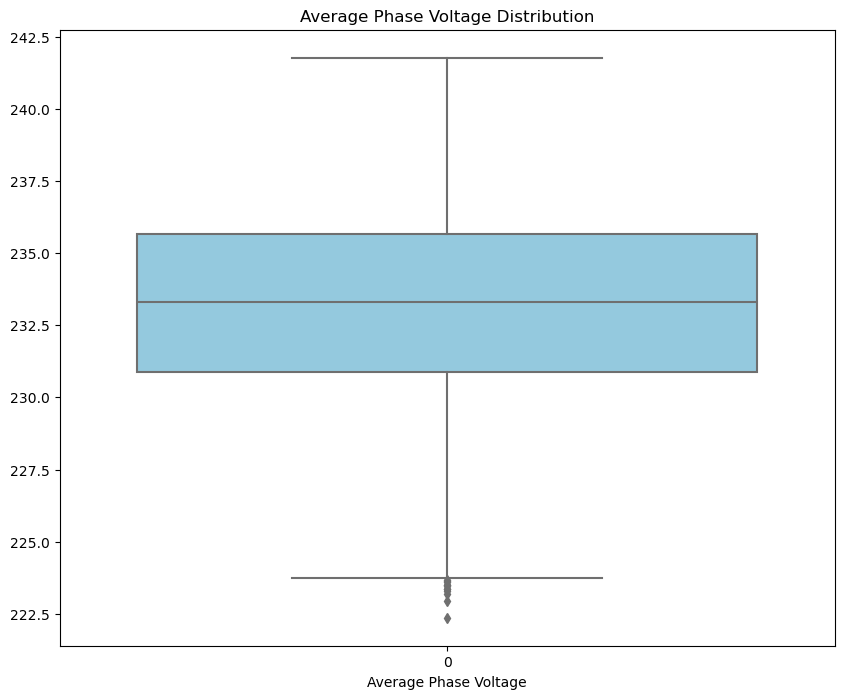

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


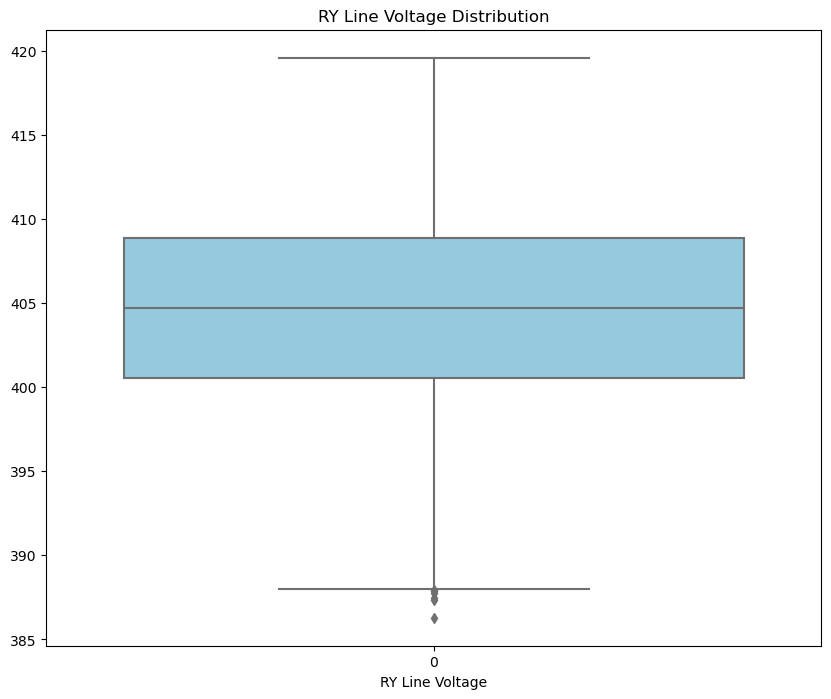

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


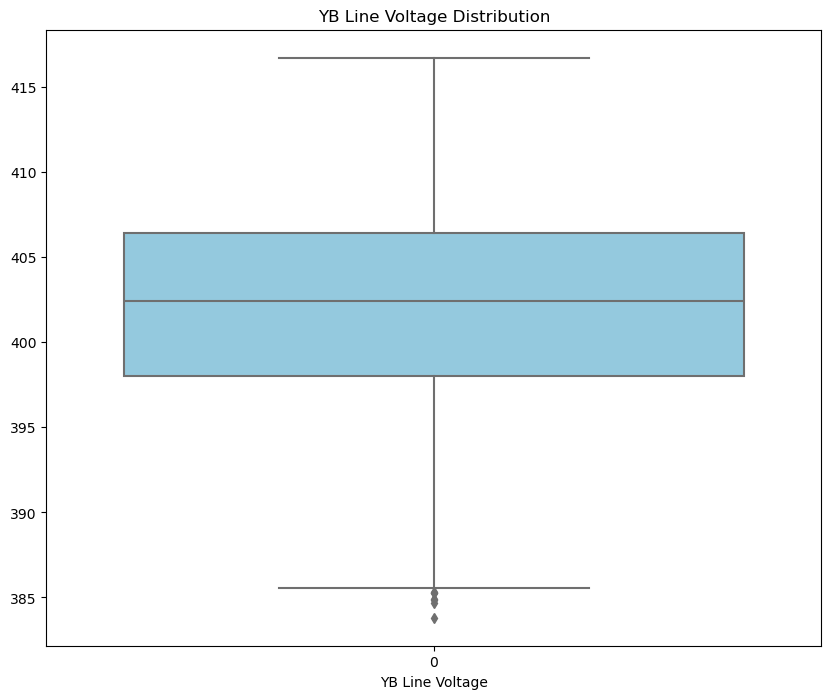

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


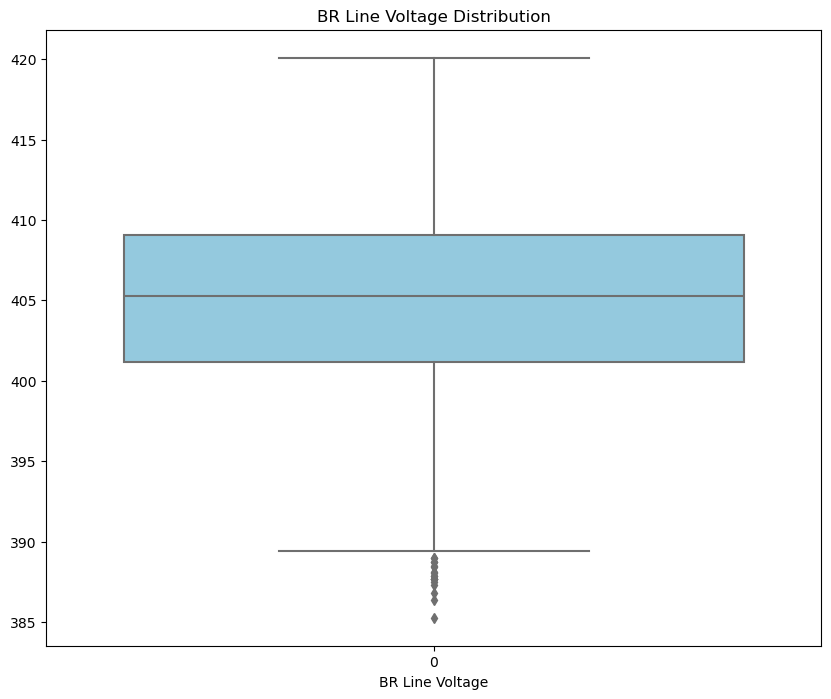

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


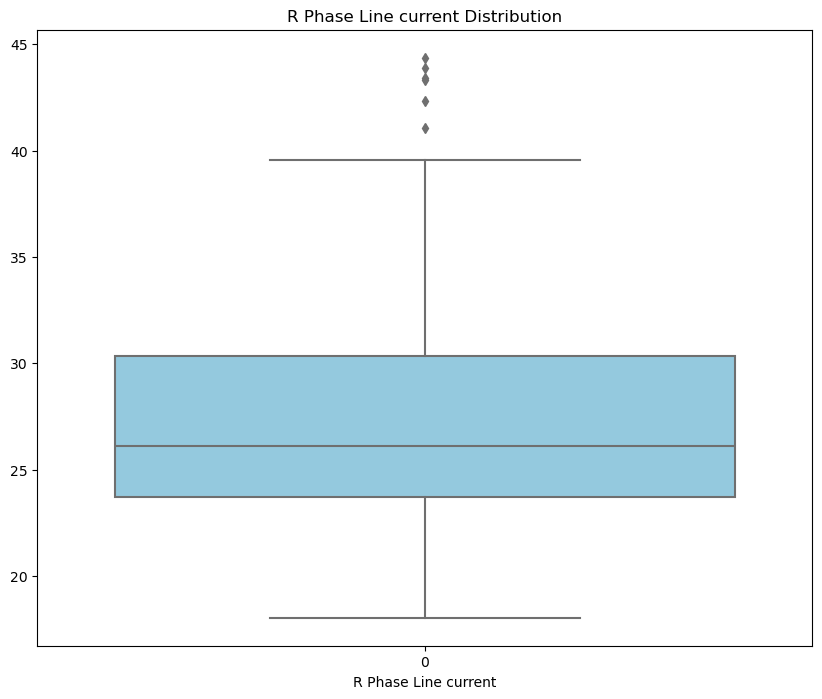

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


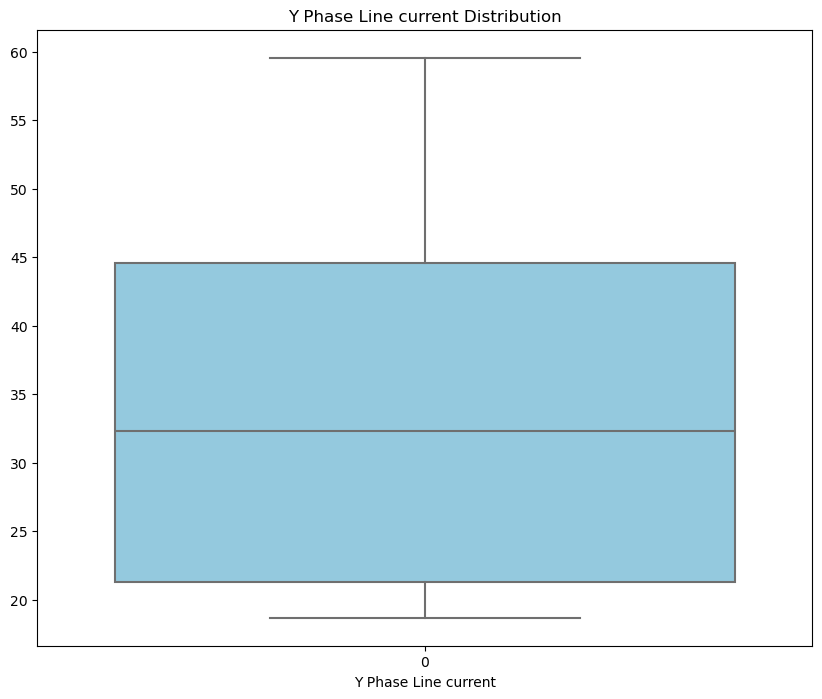

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


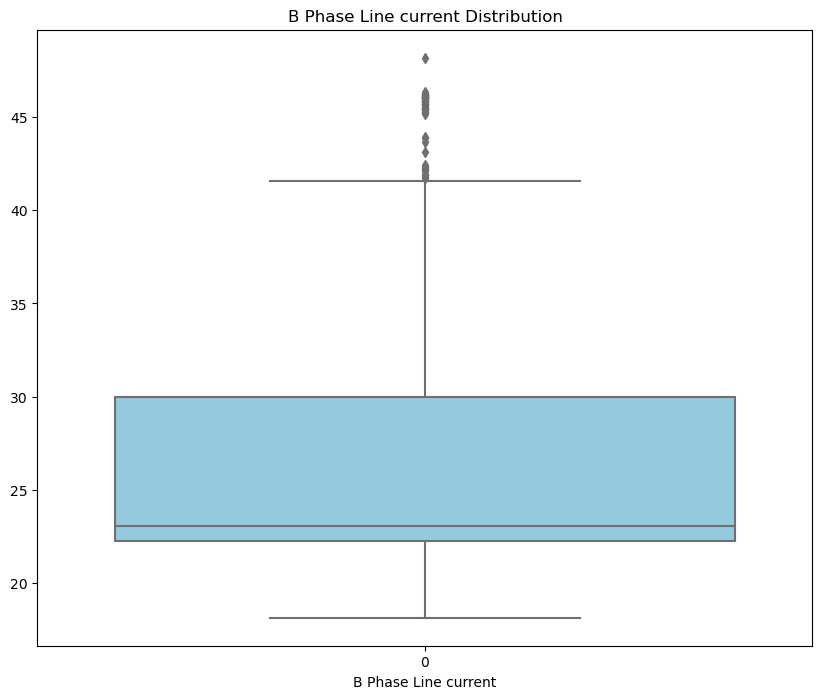

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


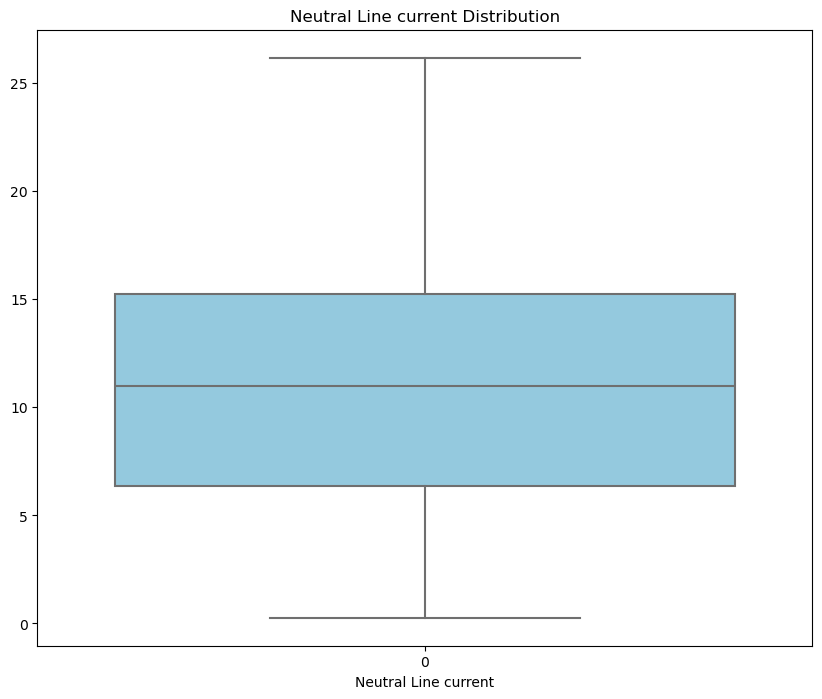

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


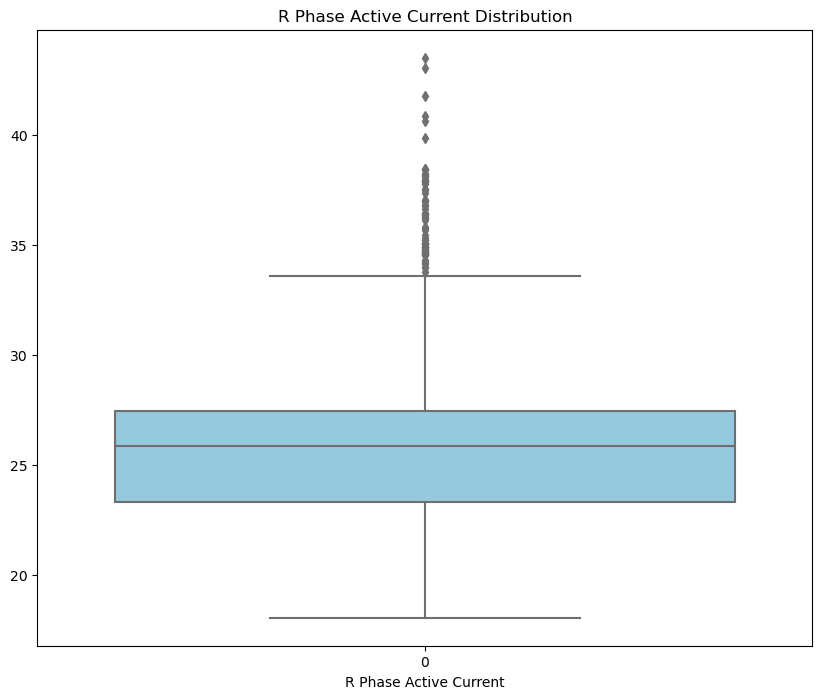

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


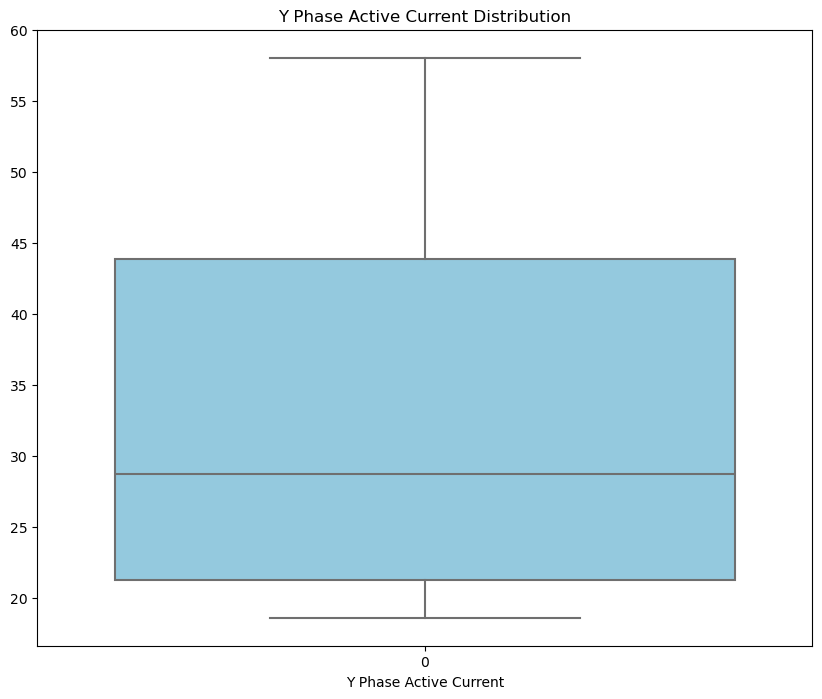

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


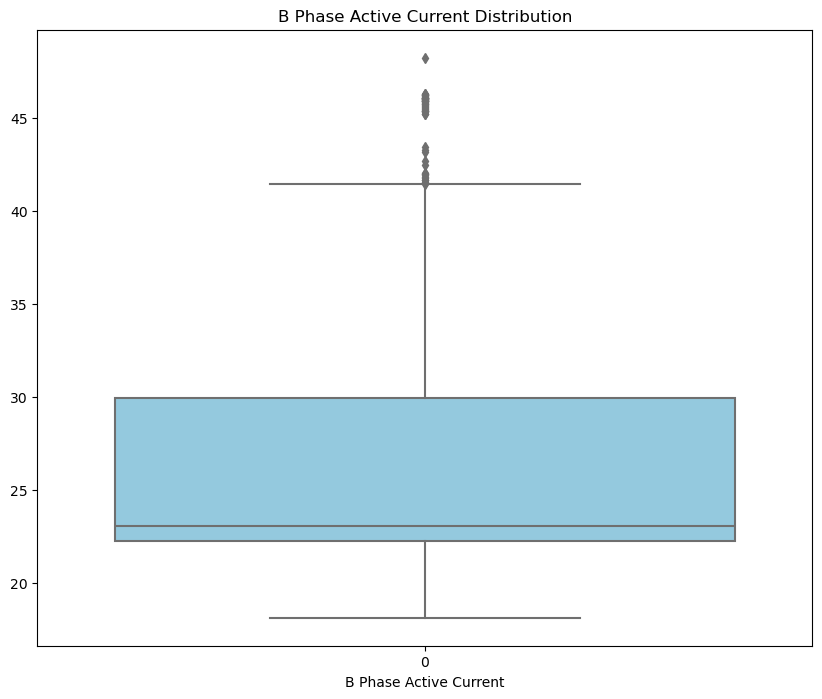

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


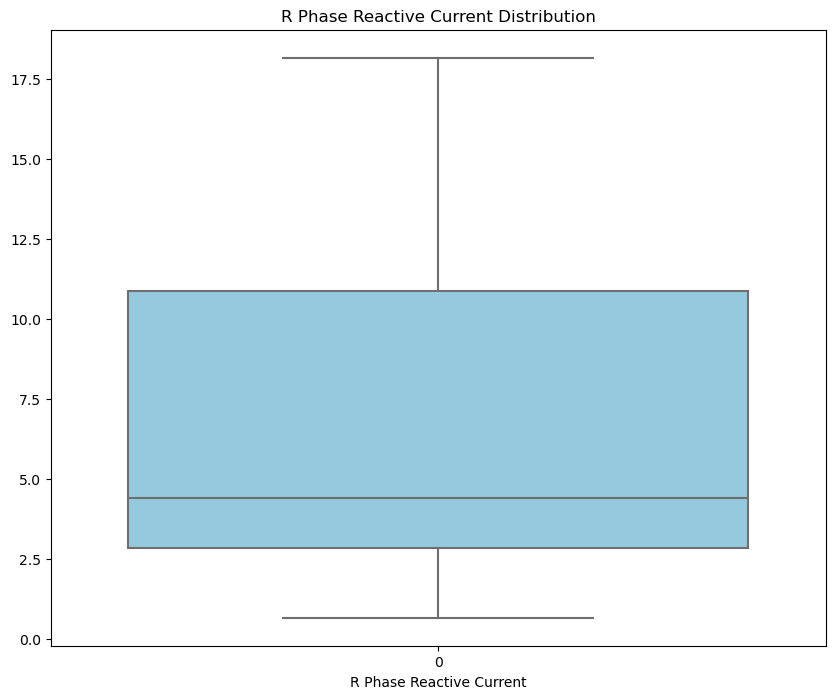

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


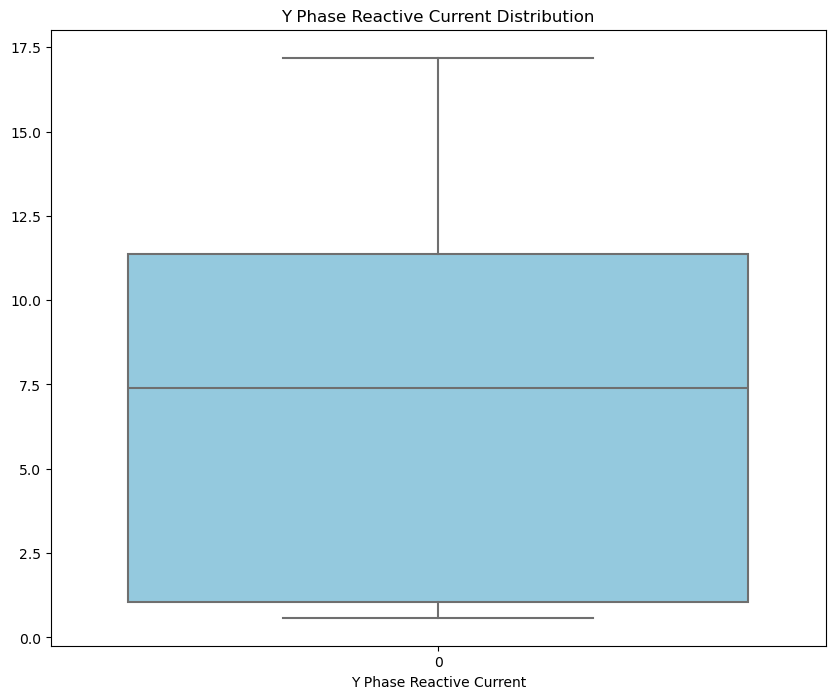

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


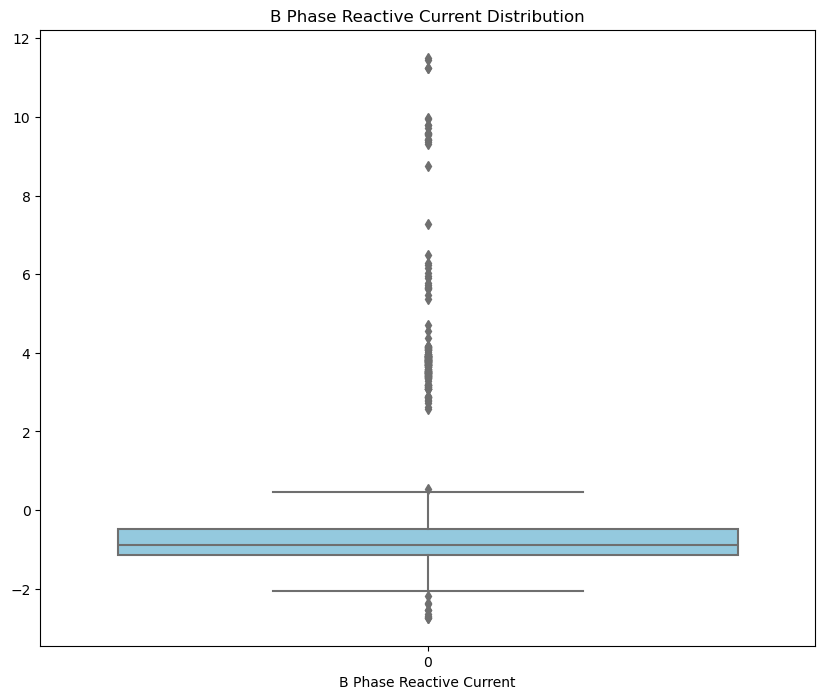

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


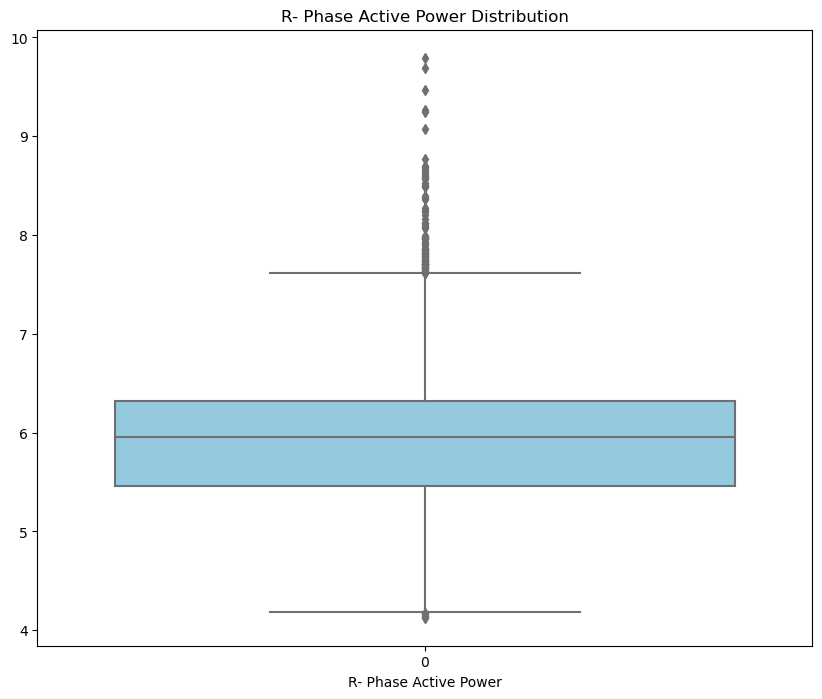

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


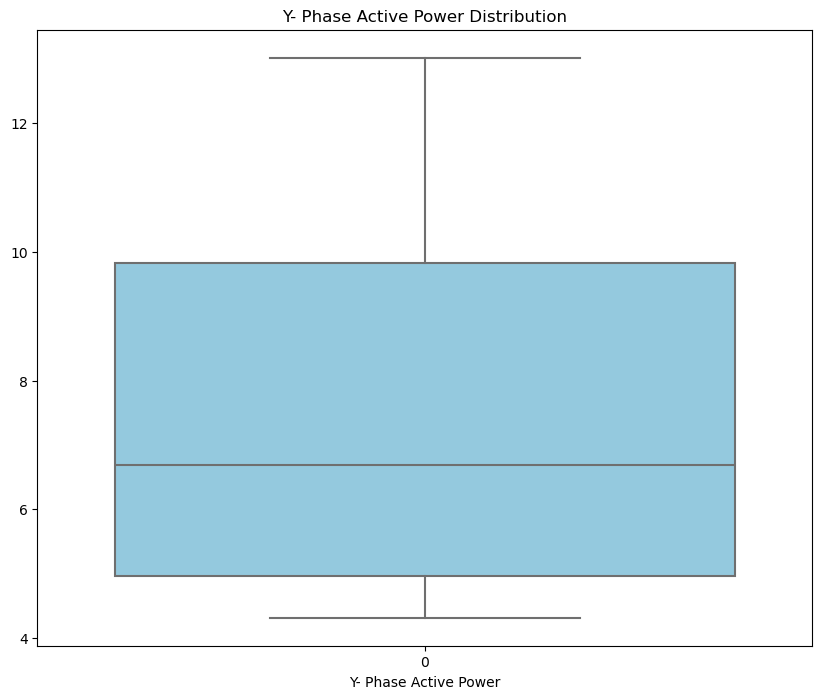

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


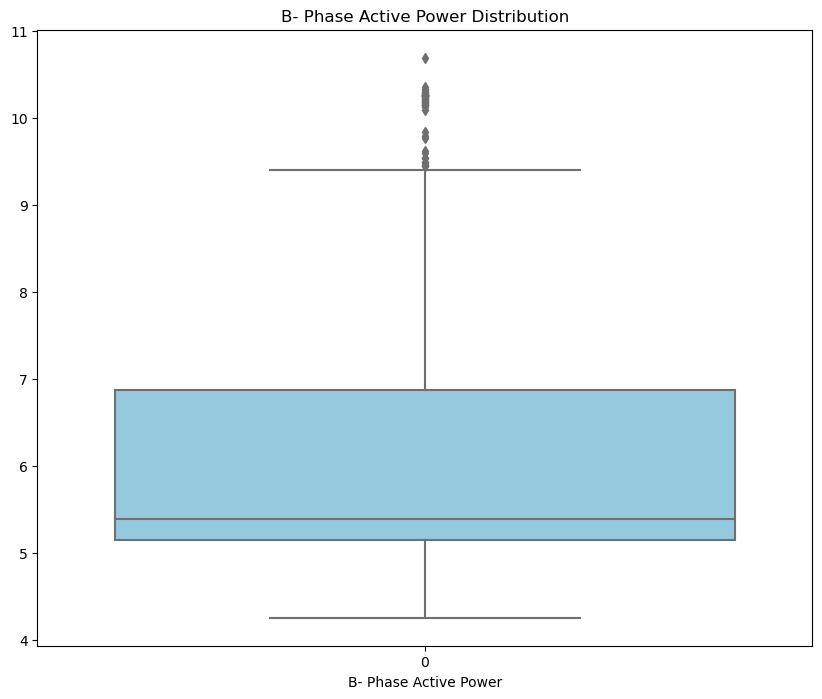

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


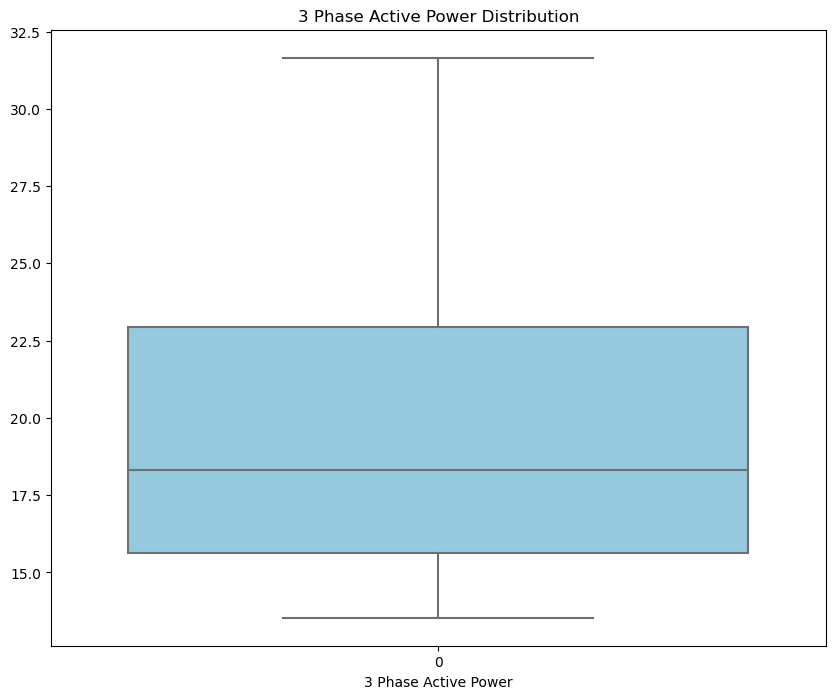

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


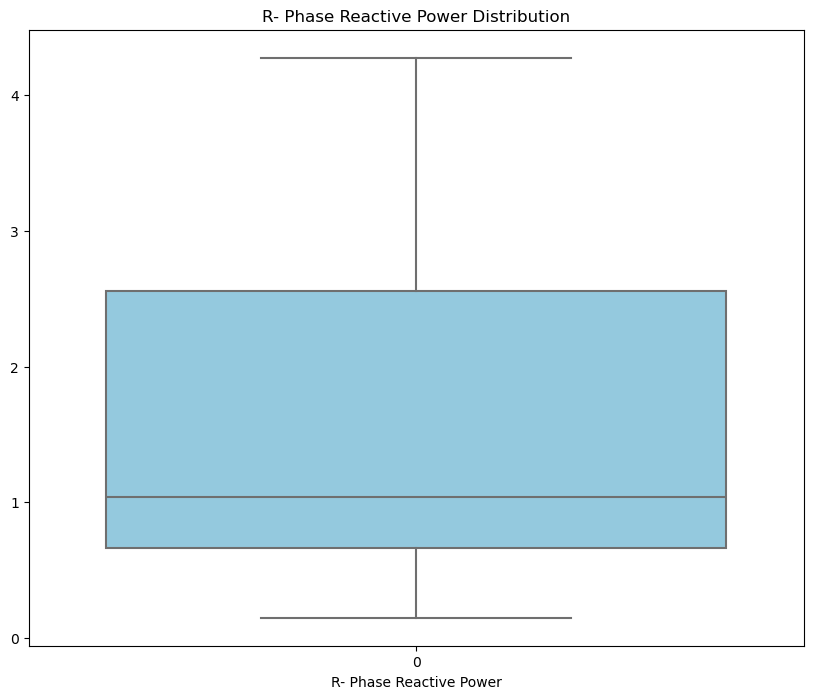

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


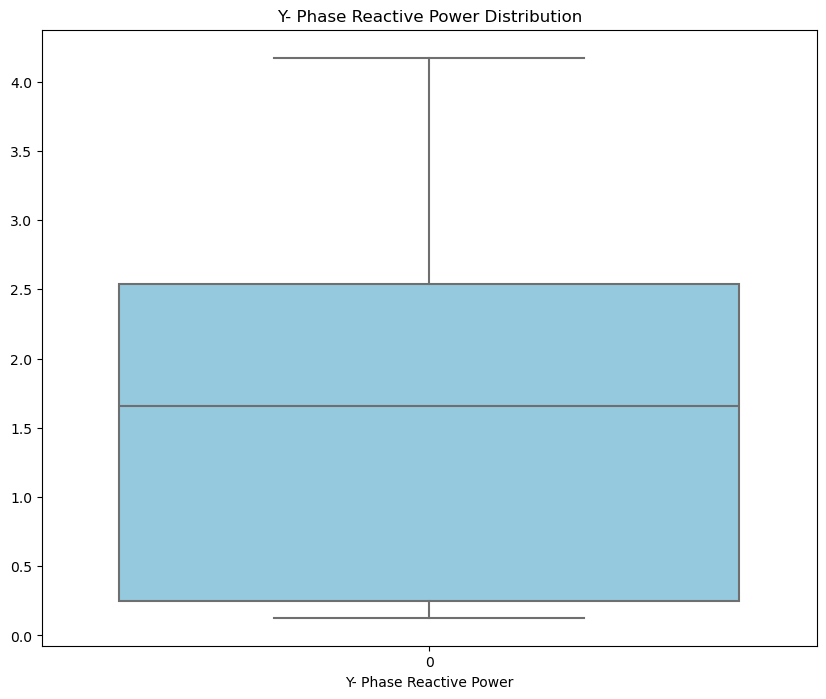

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


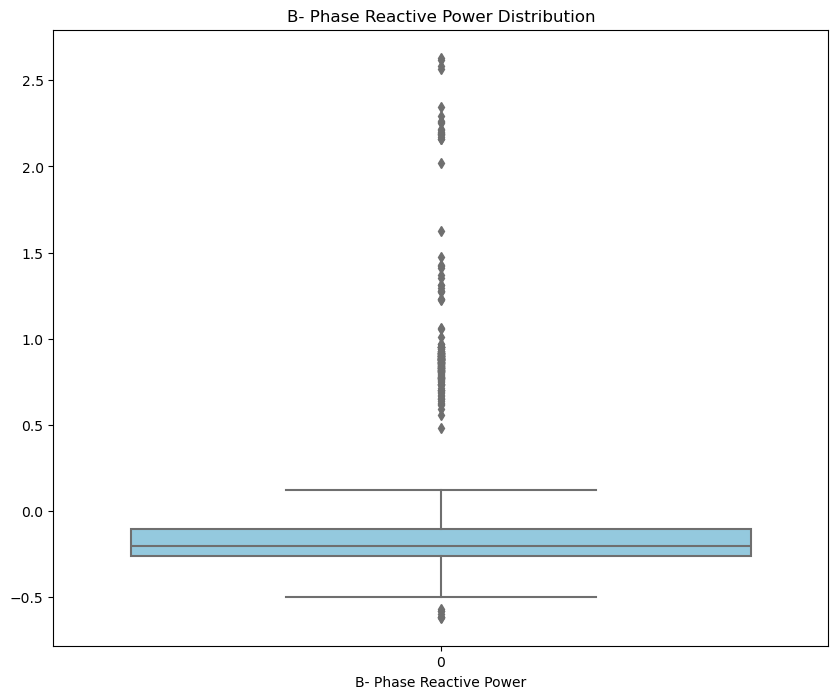

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


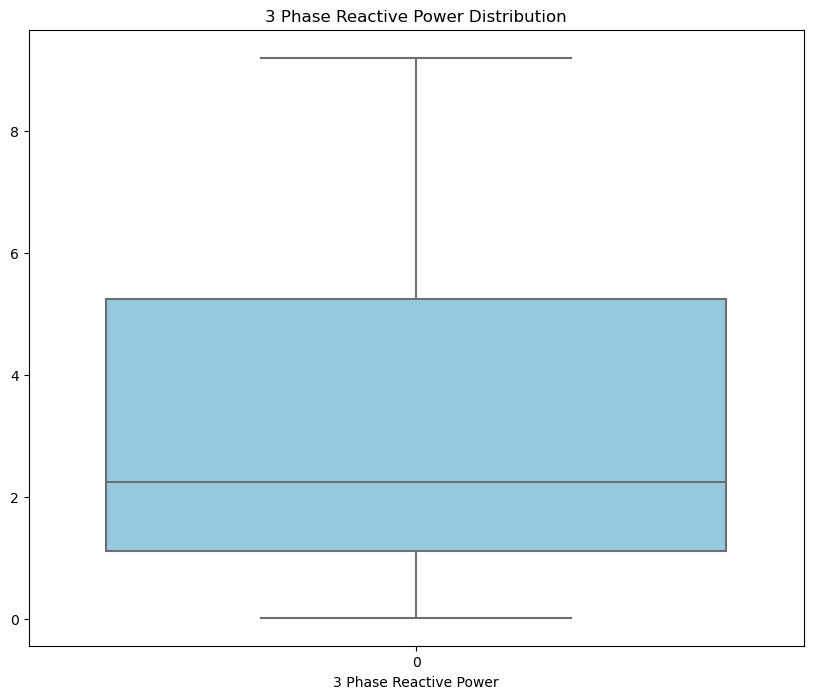

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


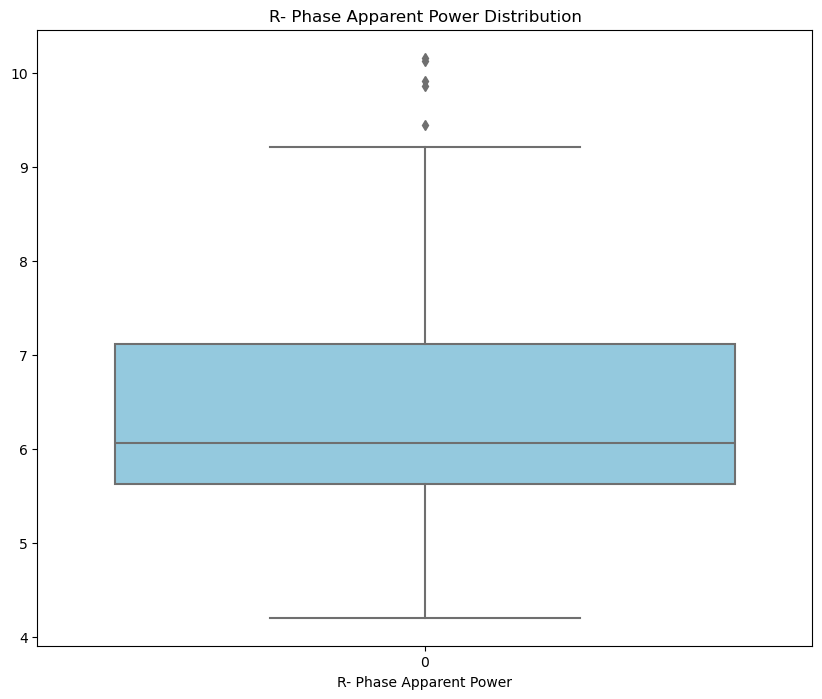

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


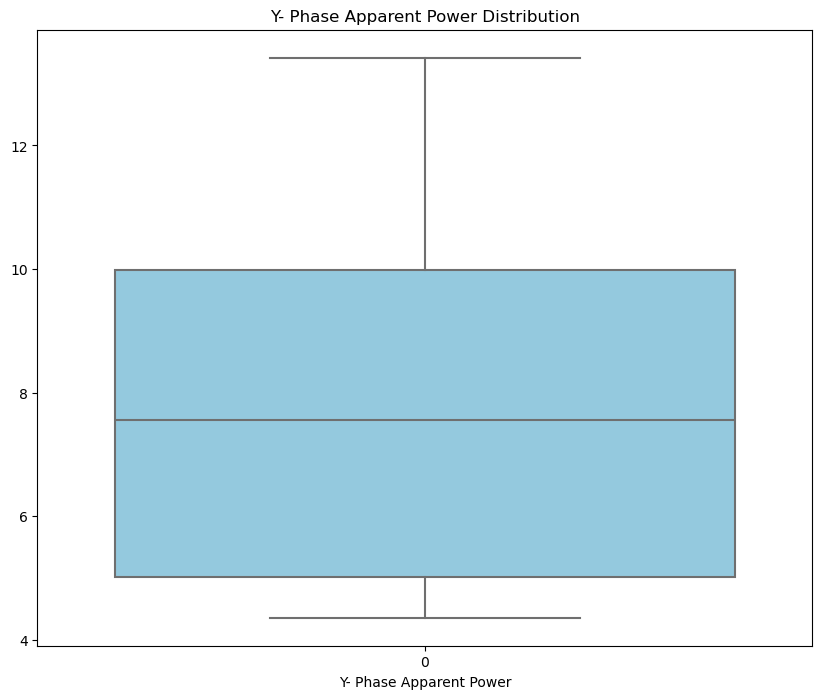

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


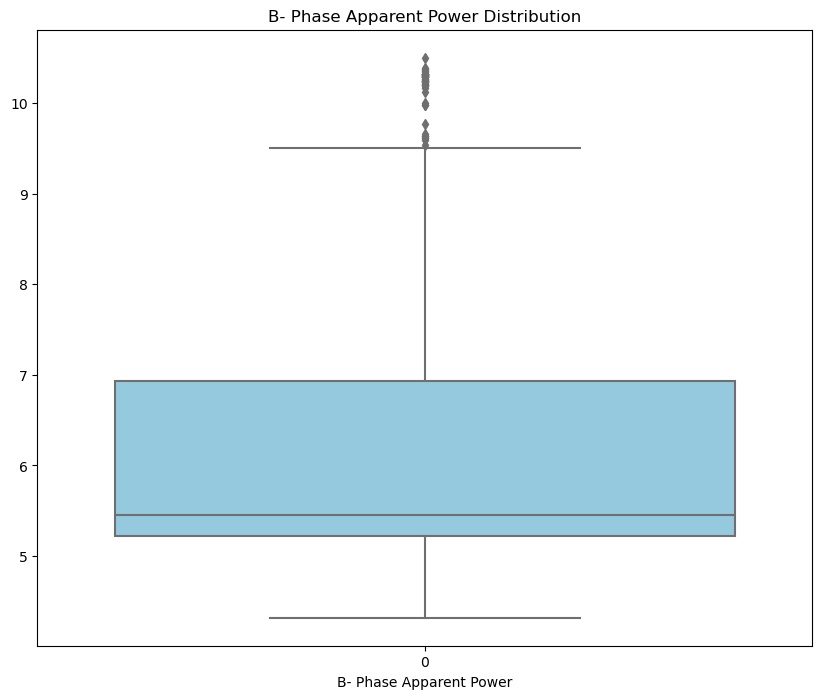

C:\Users\Tabish Ali Ansari\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


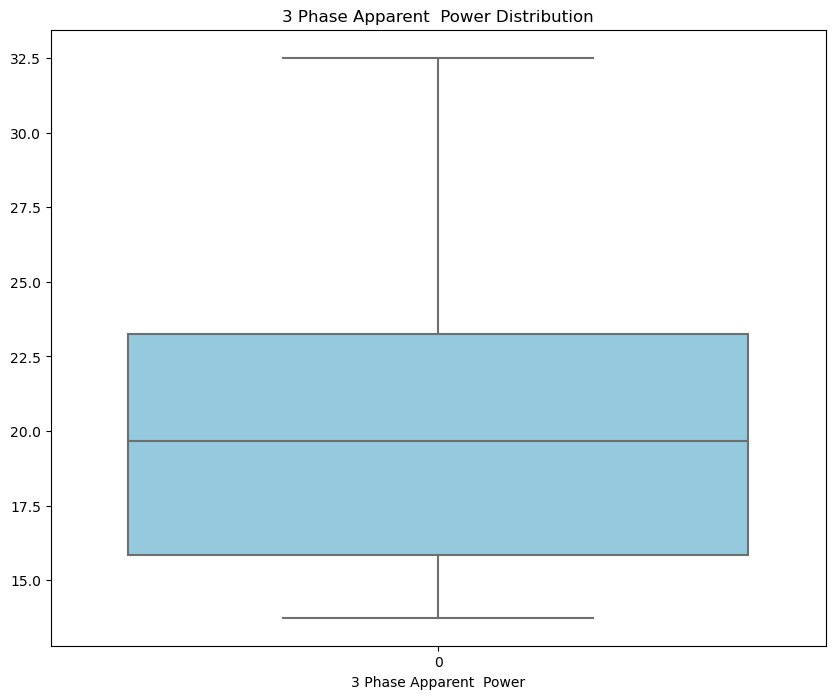

In [19]:
for col in data_minute_avg.columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data_minute_avg[col], color='skyblue')
    tit = col + " Distribution"
    plt.title(tit)
    plt.xlabel(col)
    plt.show()


ANALYSIS TERMINATED